# Estadística descriptica de las variables

En este apartado se analizan individualmente las variables, su distribución, su comportamiento con respecto al tiempo y si son aptas para continuar en el proceso predictivo o si visualmente deben descartarse. Para efectos del análisis descriptivo, vamos a utilizar el set de datos sin huecos usados en el preprocesamiento.

In [131]:
# Leemos los datos
import pandas as pd

datos = pd.read_excel('00.Generación sin nulos.xlsx')
datos.head()

dtHora  fltValGeneracion  iNumDia  iNumAnio  iNumSemana  \
0 2022-09-01 00:00:00               0.0        1      2022          36   
1 2022-09-01 01:00:00               0.0        1      2022          36   
2 2022-09-01 02:00:00               0.0        1      2022          36   
3 2022-09-01 03:00:00               0.0        1      2022          36   
4 2022-09-01 04:00:00               0.0        1      2022          36   

   iNumDiaSemana  iNumMes  iCodDia  iCodHora  iNumHora  ...  \
0              5        9     6452    154847        24  ...   
1              5        9     6453    154848         1  ...   
2              5        9     6453    154849         2  ...   
3              5        9     6453    154850         3  ...   
4              5        9     6453    154851         4  ...   

   fltProbabilidadLluvia  fltHumedadRelativa  fltVelocidadViento  \
0                      7                  77                  15   
1                      7                  82                  13   
2                      9                  85                  11   
3                     11                  87                  11   
4                     11                  88                  11   

   fltCoberturaNubes  fltIndiceUV  iCodCondCielo  iCodDirViento  \
0                 98          0.0              4              4   
1                 82          0.0              4              4   
2                 73          0.0              3              4   
3                 63          0.0              3              4   
4                 70          0.0              3              4   

   fltVelocidadRafaga  fltPrecipitacion  fltDPT  
0                  32               0.0      15  
1                  32               0.0      16  
2                  28               0.0      16  
3                  26               0.0      16  
4                  24               0.0      16  

[5 rows x 21 columns]

## Análisis general

In [132]:
from ydata_profiling import ProfileReport

In [133]:
profile = ProfileReport(datos, tsmode=True, sortby="dtHora")
profile.to_file('profile_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Preparamos las funciones para el análisis de cada variable

In [134]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [135]:
def EDA(inicio, fin, variable, descripcion, bCeros, largo = 20, ancho = 5):
    inicio = 13246
    fin = inicio + 700

    plt.figure(figsize=(largo, ancho))

    # Graficar la serie temporal
    plt.plot(
        datos["dtHora"],  # Eje X: Hora o Fecha
        datos[variable],  # Eje Y: Generación de energía
        label=descripcion, linewidth=2
    )

    # Agregar etiquetas y título
    plt.xlabel('Fecha', fontsize=12)
    plt.ylabel(descripcion, fontsize=12)
    plt.legend()
    plt.grid()

    # Mostrar el gráfico
    plt.show()

    # Configurar el gráfico
    plt.figure(figsize=(largo, ancho))

    # Graficar la serie temporal
    plt.plot(
        datos.loc[inicio:fin, "dtHora"],  # Eje X: Hora o Fecha
        datos.loc[inicio:fin, variable],  # Eje Y: Generación de energía
        label=descripcion, linewidth=2
    )

    # Agregar etiquetas y título
    plt.xlabel('Fecha', fontsize=12)
    plt.ylabel(descripcion, fontsize=12)
    plt.grid()

    # Mostrar el gráfico
    plt.show()

    
# Asegúrate de que tu DataFrame tenga estas columnas:
# 'iNumHora' (Hora del día), 'fltValGeneracion' (Valores de generación), 'iNumMes' (Mes del año)

# Crear un diccionario para convertir números de mes a nombres
    meses = {
        1: "Enero", 2: "Febrero", 3: "Marzo", 4: "Abril",
        5: "Mayo", 6: "Junio", 7: "Julio", 8: "Agosto",
        9: "Septiembre", 10: "Octubre", 11: "Noviembre", 12: "Diciembre"
    }

    # Agrupar y preparar los datos
    df_grouped = datos.groupby(['iNumHora', 'iNumMes'])[variable].mean().reset_index()
    df_grouped['Mes'] = df_grouped['iNumMes'].map(meses)  # Añadir nombres de los meses

    # Configurar el gráfico
    plt.figure(figsize=(largo, ancho))

    # Usar la paleta de colores accesible para daltonismo
    palette = sns.color_palette("colorblind", 12)

    # Lista de marcadores
    markers = ['o', 's', 'D', '*', 'X', 'P', 'v', '^', '<', '>', 'h', 'p']

    # Dibujar cada línea con un marcador único
    for i, mes in enumerate(meses.values()):
        # Filtrar datos por mes
        datos_mes = df_grouped[df_grouped['Mes'] == mes]
        plt.plot(
            datos_mes['iNumHora'], 
            datos_mes[variable], 
            label=mes, 
            color=palette[i], 
            marker=markers[i],  # Usar un marcador diferente para cada mes
            linewidth=1.5, 
            markersize=6  # Tamaño del marcador
        )

    # Agregar etiquetas y leyenda
    plt.xlabel('Hora del Día', fontsize=12)
    plt.ylabel(descripcion, fontsize=12)
    plt.legend(title='Meses', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.grid()
    plt.xticks(np.arange(0, 26, 1))
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

    if(not(bCeros)):
        df_filtered = datos[datos[variable] > 0]
    else:
        df_filtered = datos.copy()

# Crear una nueva columna que combine año y mes para el eje X
    df_filtered['Year_Month'] = df_filtered['iNumAnio'].astype(str) + "_" + df_filtered['iNumMes'].astype(str)

    # Ordenar los datos por año y mes
    df_filtered = df_filtered.sort_values(by=['iNumAnio', 'iNumMes'])

    # Configurar estilo de la gráfica
    sns.set(style="whitegrid")

    # Crear el boxplot
    plt.figure(figsize=(largo, ancho))
    sns.boxplot(data=df_filtered, x='Year_Month', y=variable, palette="Set2")

    # Personalizar etiquetas y título
    plt.xlabel("Año Mes", fontsize=12)
    plt.ylabel(descripcion, fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

    df_filtered = datos.copy()

    # Ordenar los datos por hora del día
    df_filtered = df_filtered.sort_values(by=['iNumHora'])

    # Configurar estilo de la gráfica
    sns.set(style="whitegrid")

    # Crear el boxplot por hora del día
    plt.figure(figsize=(largo, ancho))
    sns.boxplot(data=df_filtered, x='iNumHora', y=variable, palette="Set2")

    # Personalizar etiquetas y título
    plt.xlabel("Hora", fontsize=12)
    plt.ylabel(descripcion, fontsize=12)
    plt.xticks(rotation=0)

    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(largo, ancho))
    

    if(not(bCeros)):
        df_filtered = datos[datos[variable] > 0]
    else:
        df_filtered = datos.copy()
    sns.histplot(data=df_filtered, x=variable, bins=30, kde=True)

    # Personalizar
    plt.xlabel(descripcion, fontsize=12)
    plt.ylabel("Frecuencia", fontsize=12)
    plt.show()


## Generación de energía

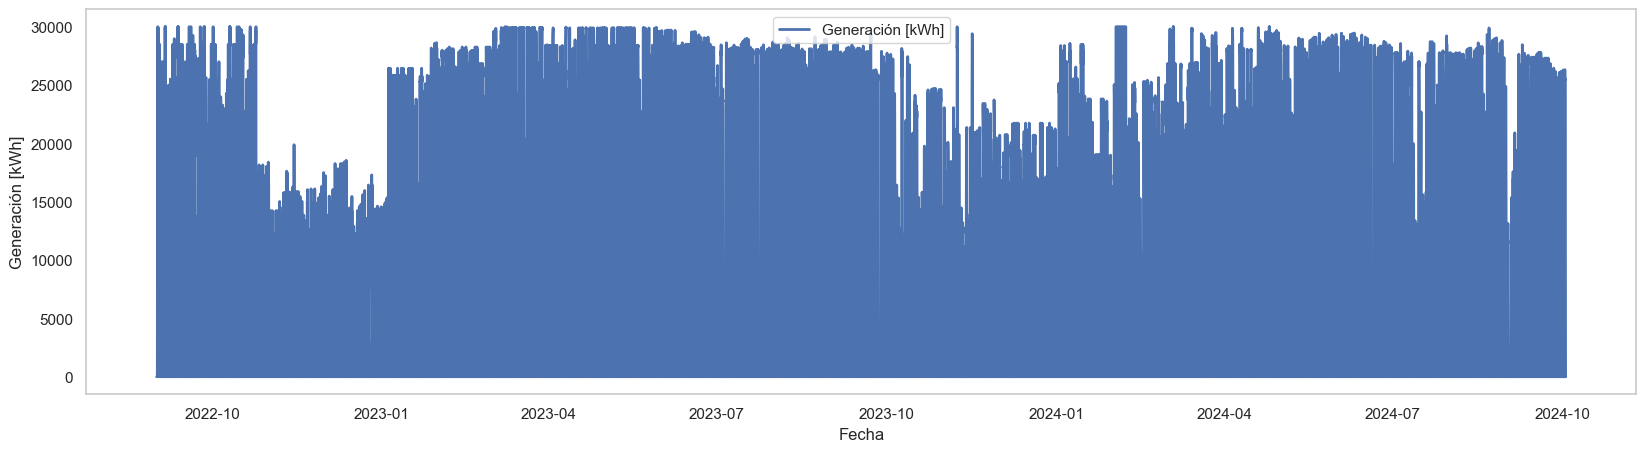

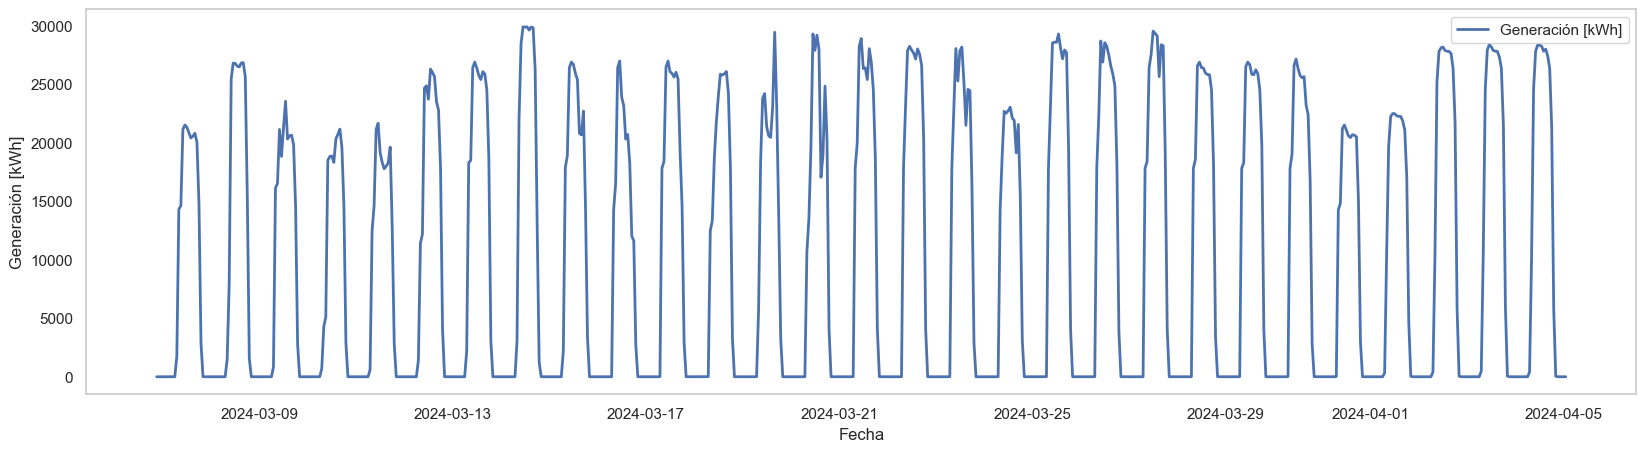

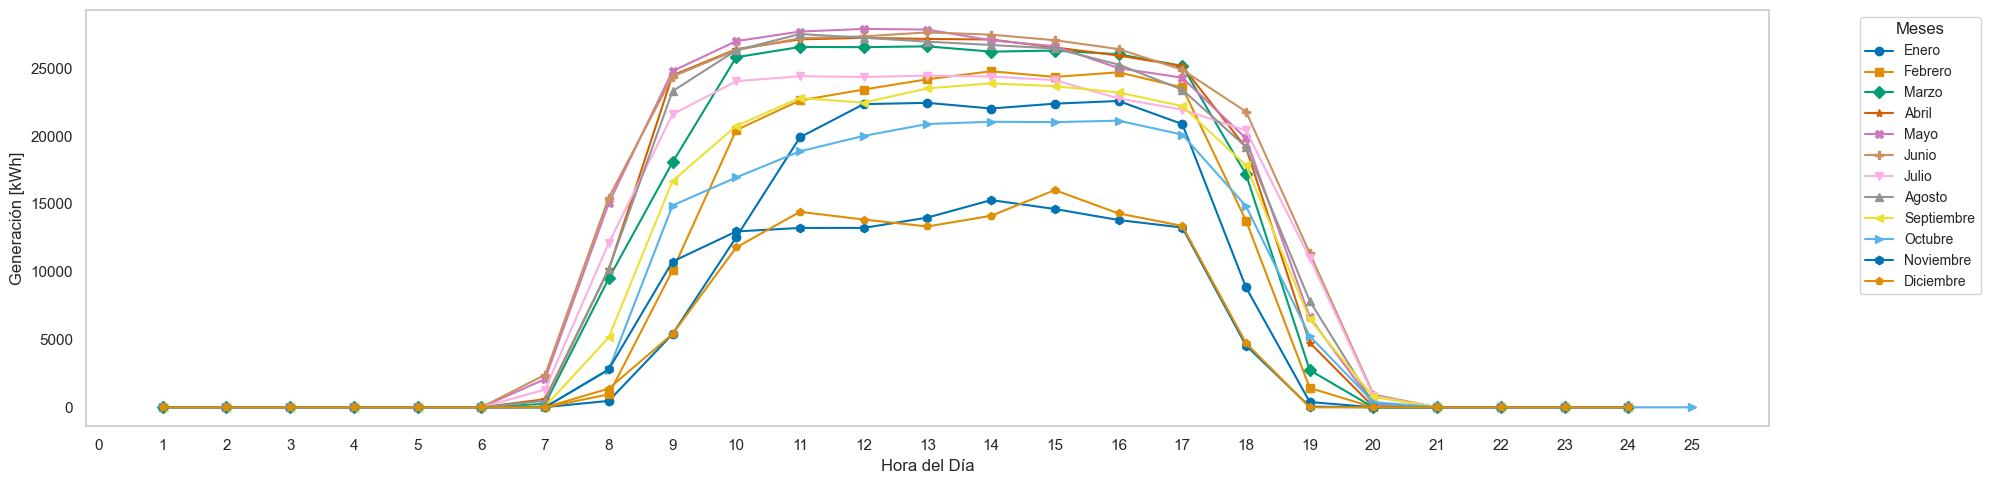

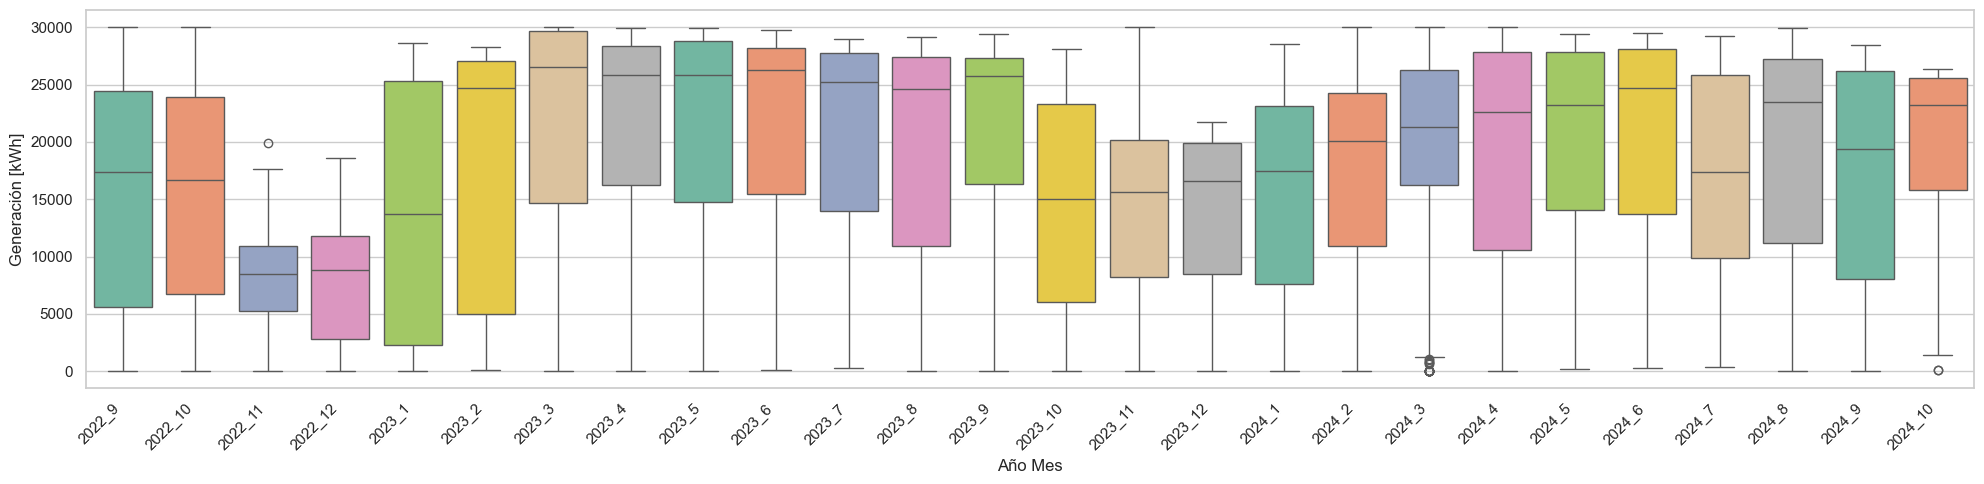

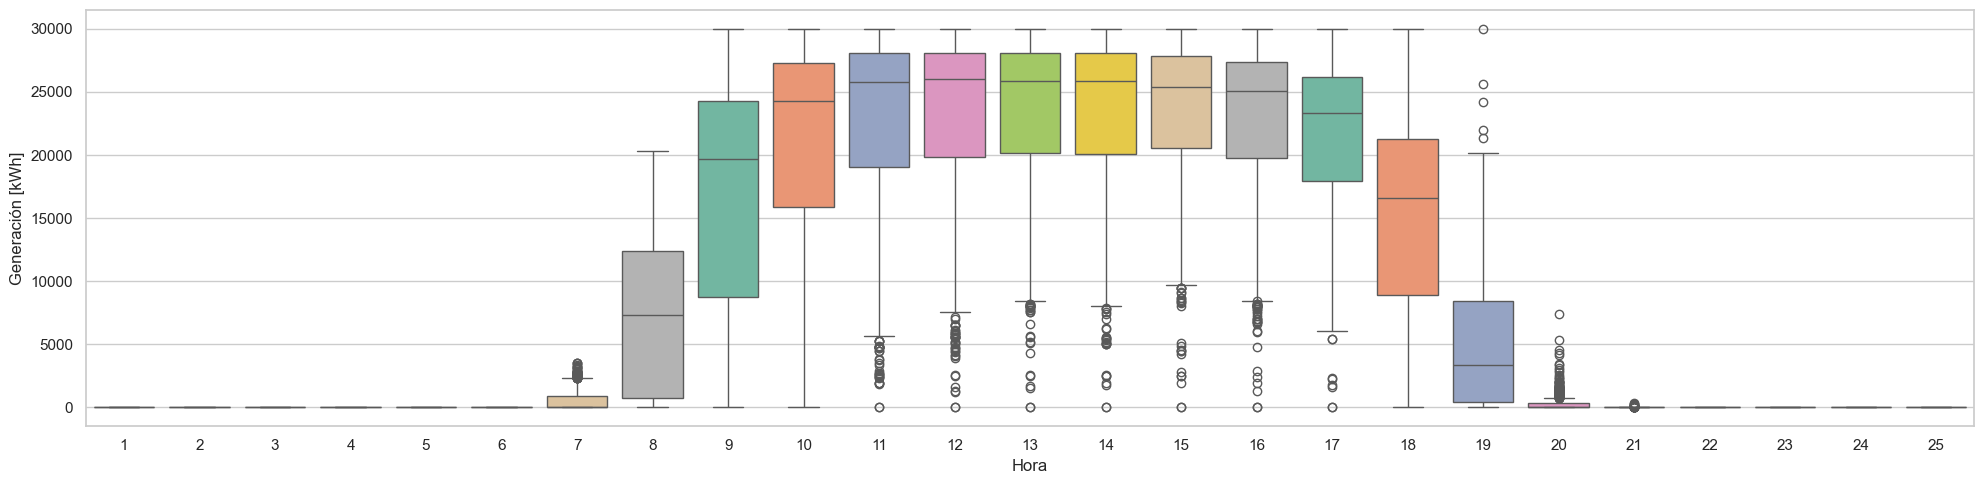

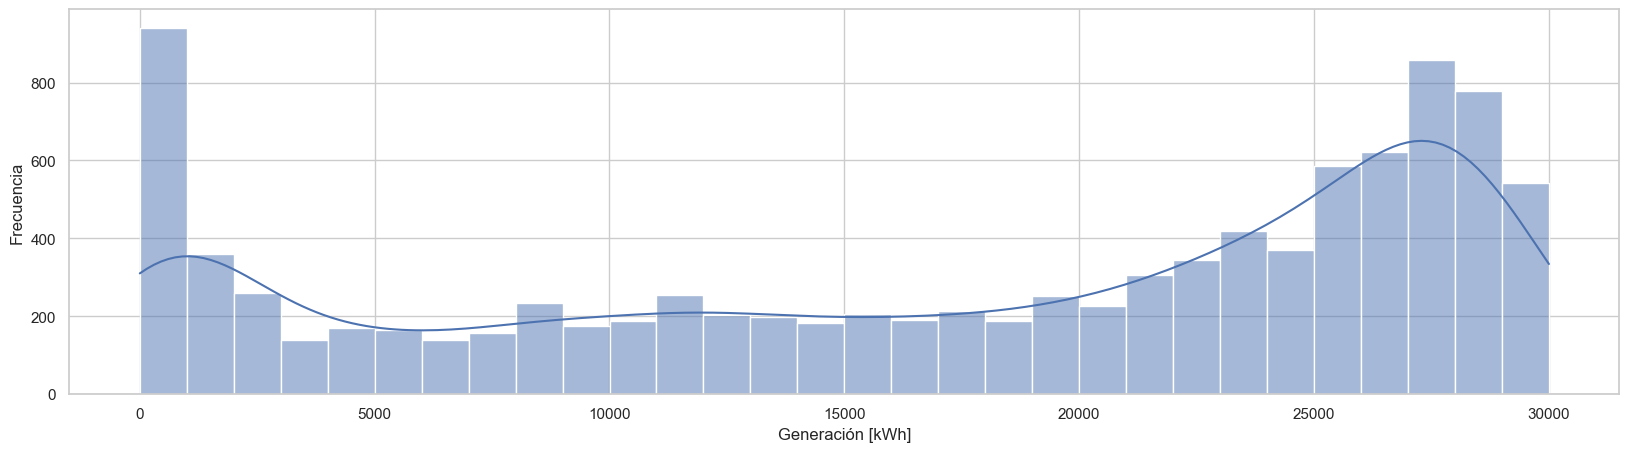

In [160]:
EDA(13246, 13946, 'fltValGeneracion', 'Generación [kWh]', False)

In [137]:
datos.dtypes

dtHora                   datetime64[ns]
fltValGeneracion                float64
iNumDia                           int64
iNumAnio                          int64
iNumSemana                        int64
iNumDiaSemana                     int64
iNumMes                           int64
iCodDia                           int64
iCodHora                          int64
iNumHora                          int64
fltTemp                           int64
fltProbabilidadLluvia             int64
fltHumedadRelativa                int64
fltVelocidadViento                int64
fltCoberturaNubes                 int64
fltIndiceUV                     float64
iCodCondCielo                     int64
iCodDirViento                     int64
fltVelocidadRafaga                int64
fltPrecipitacion                float64
fltDPT                            int64
dtype: object

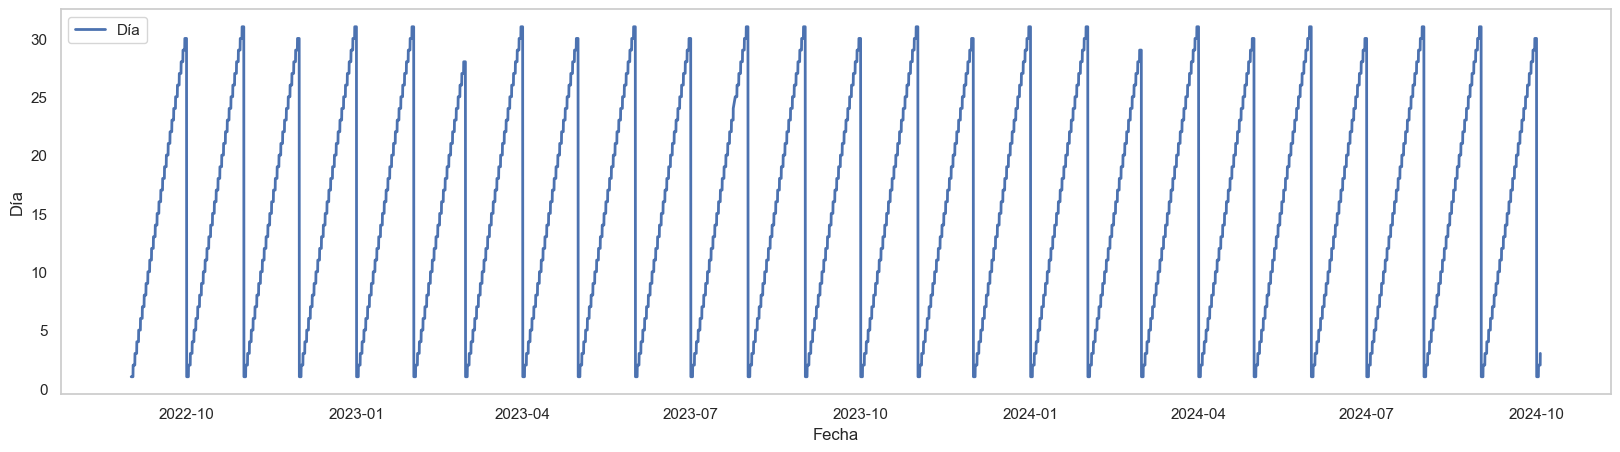

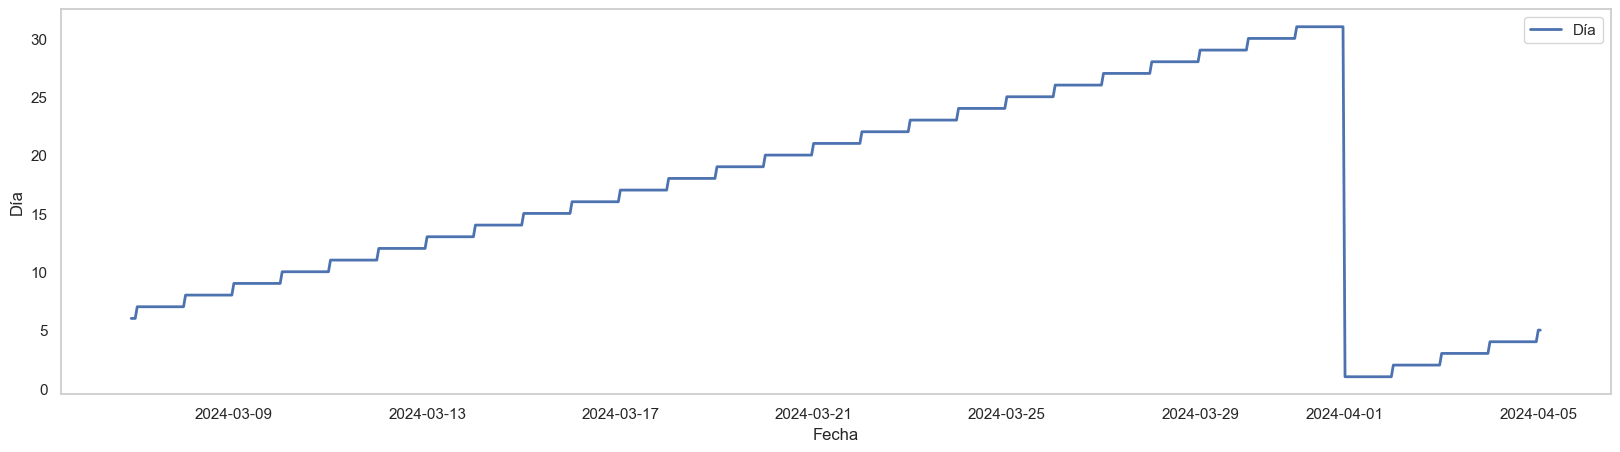

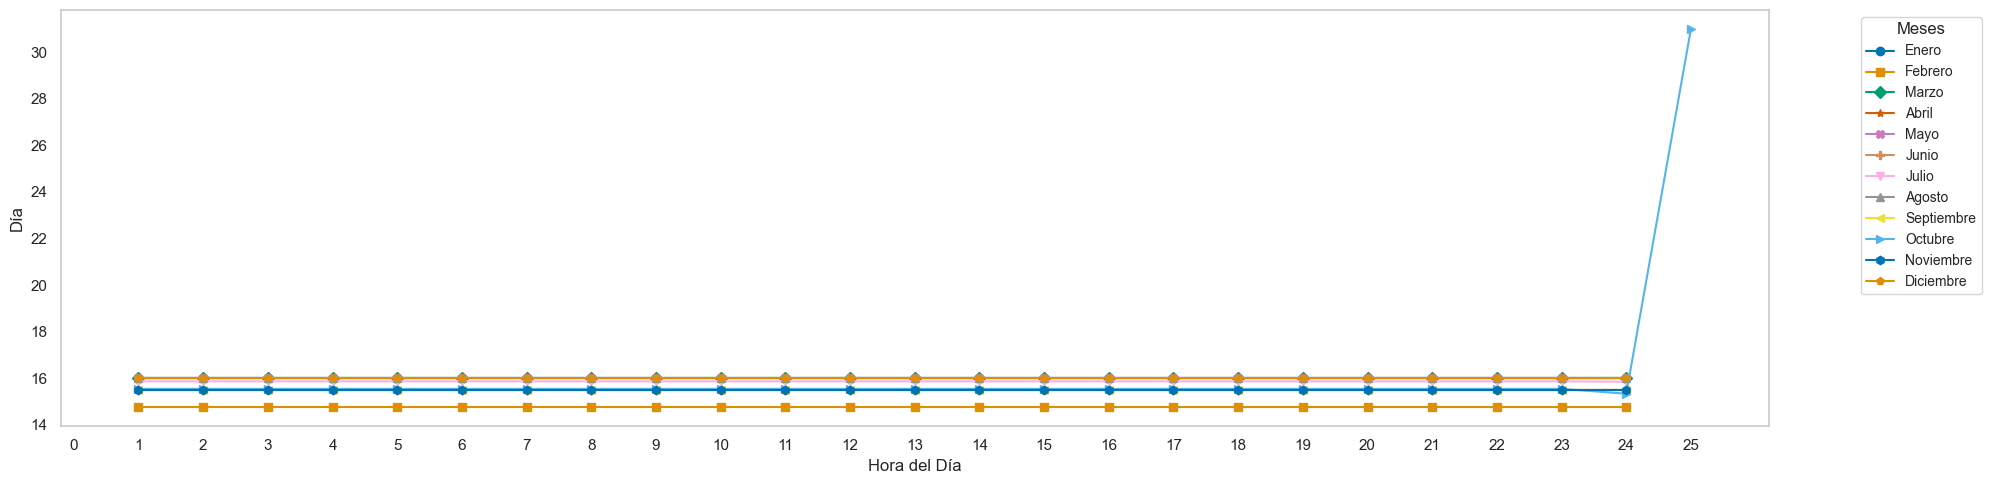

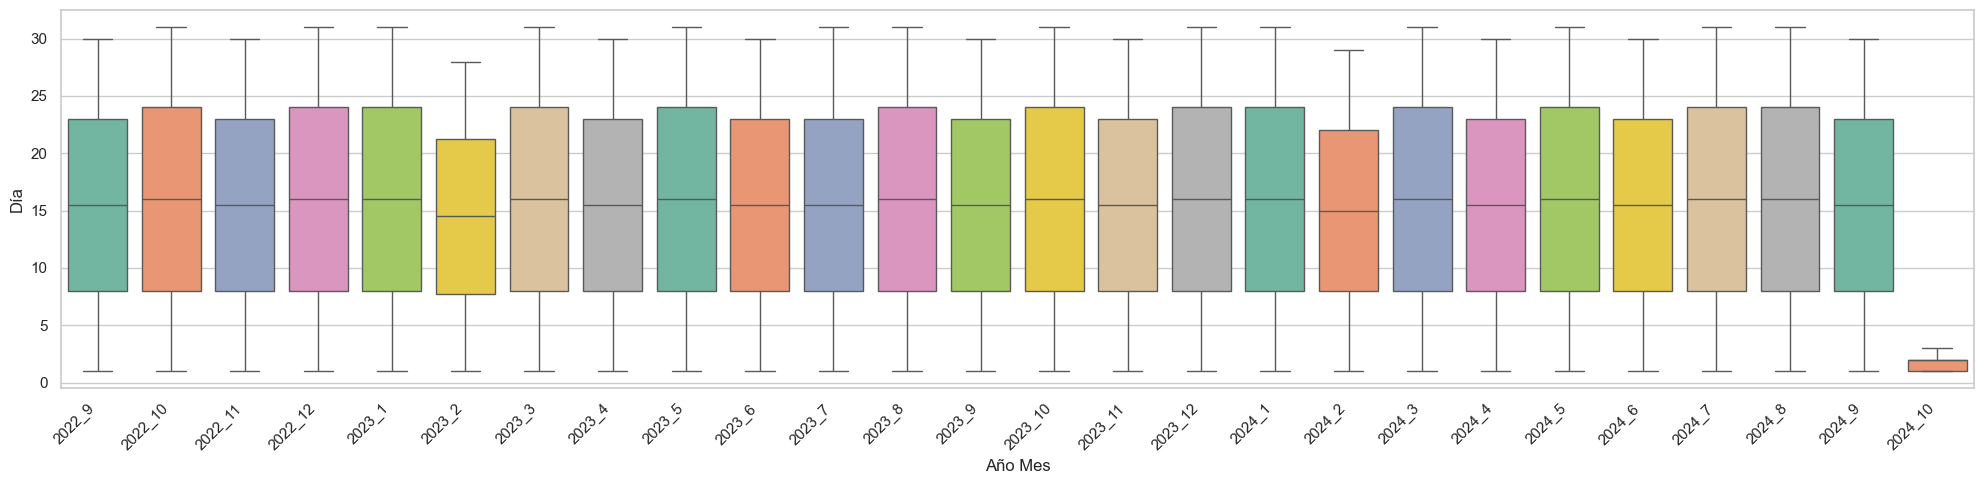

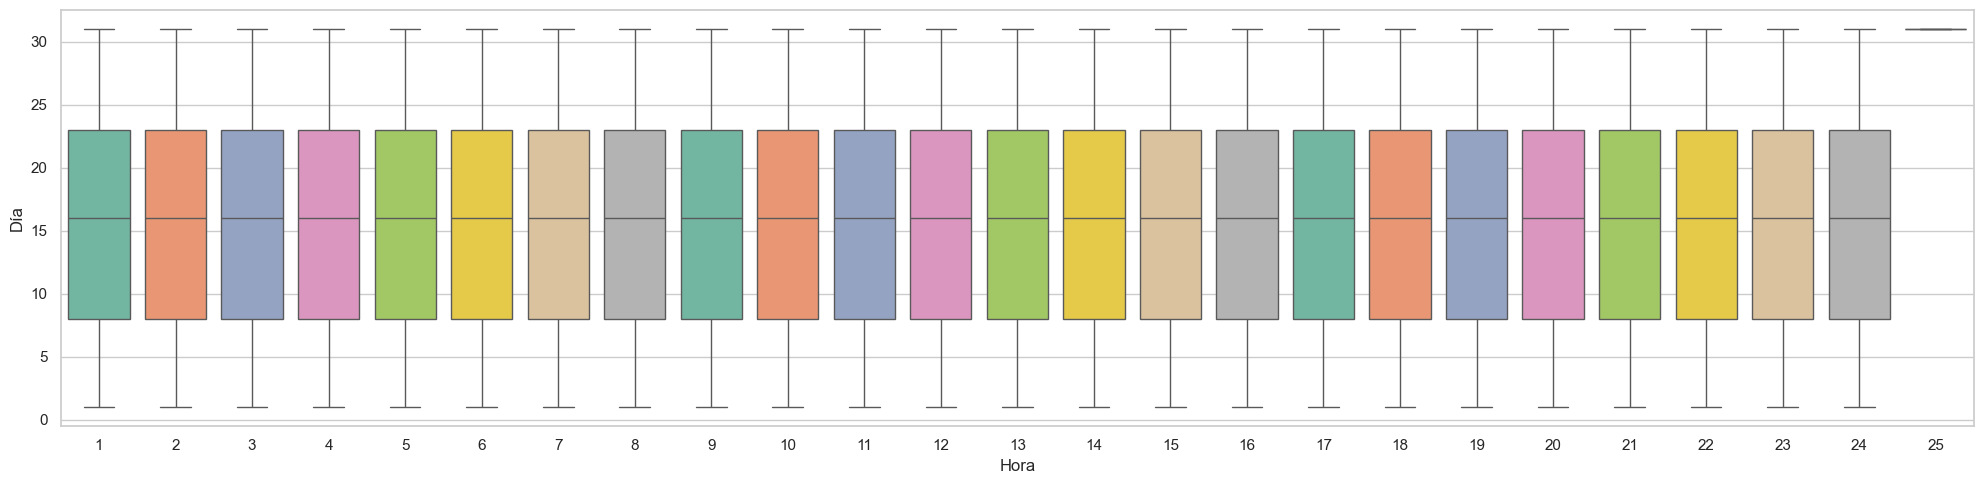

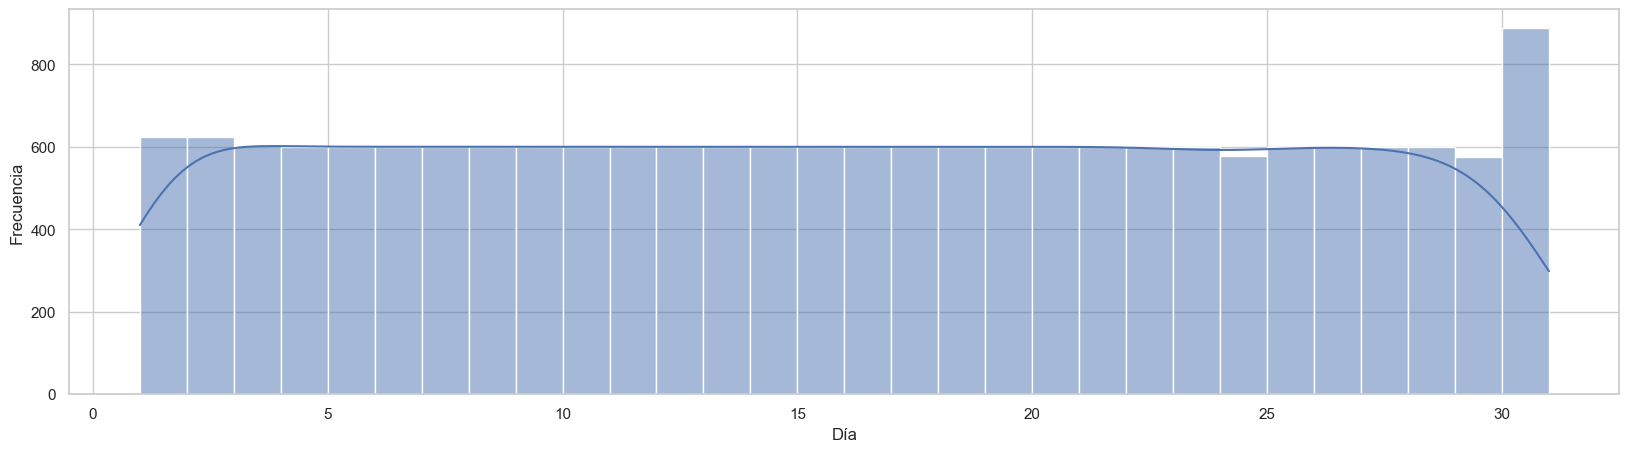

In [138]:
EDA(13246, 13946, 'iNumDia', 'Día', False)

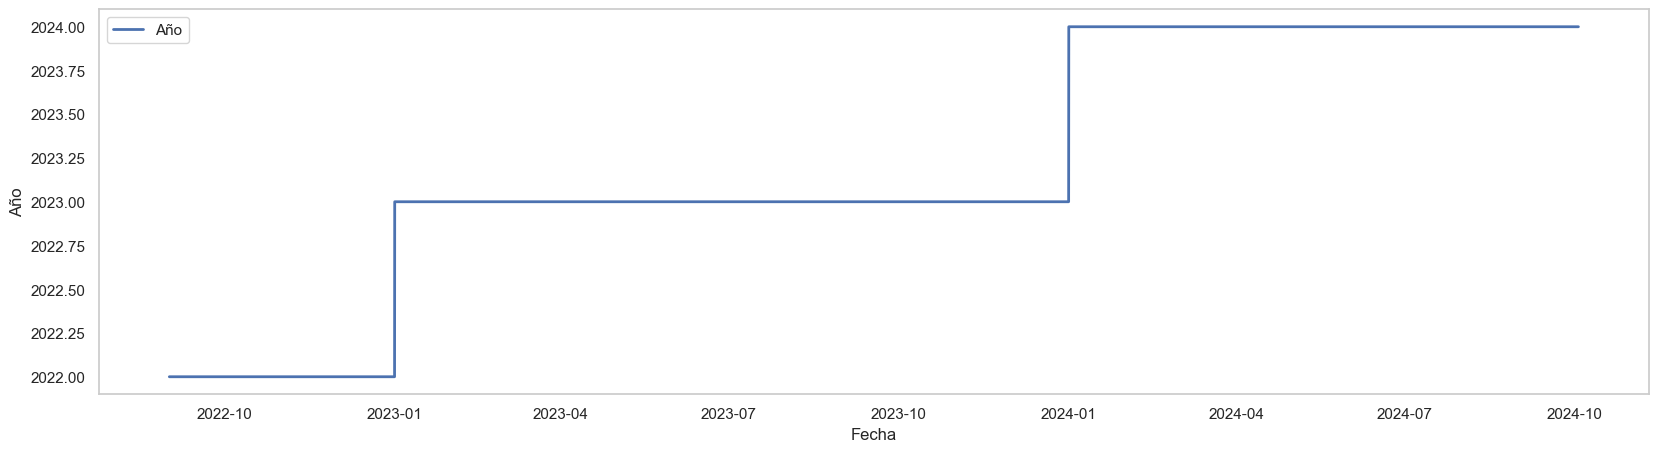

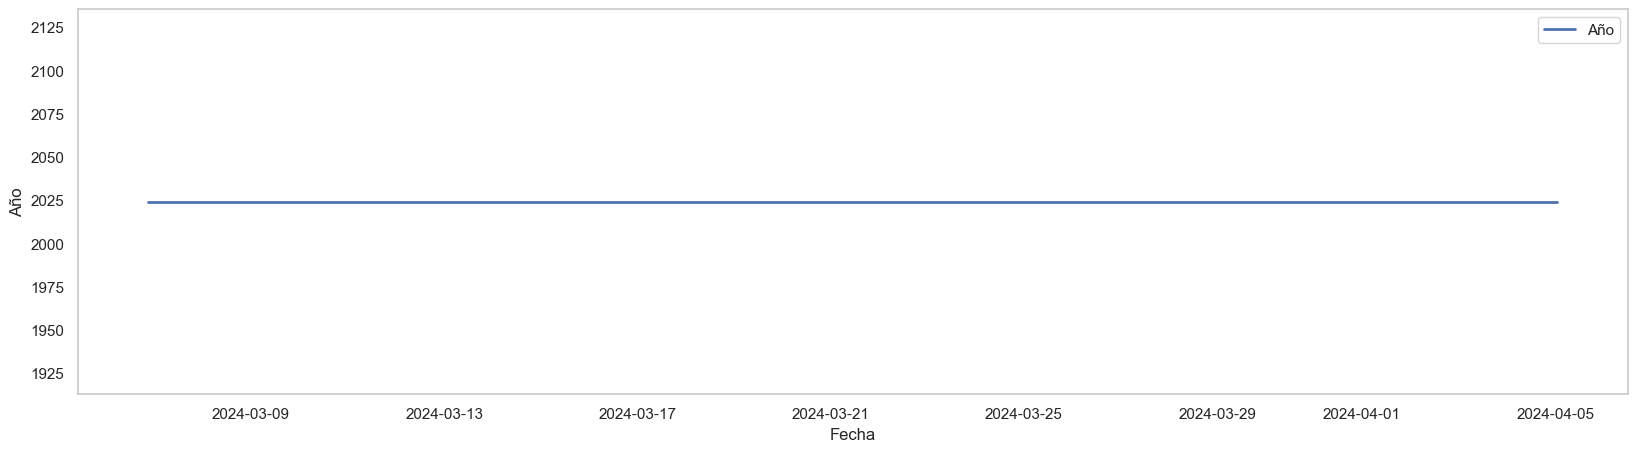

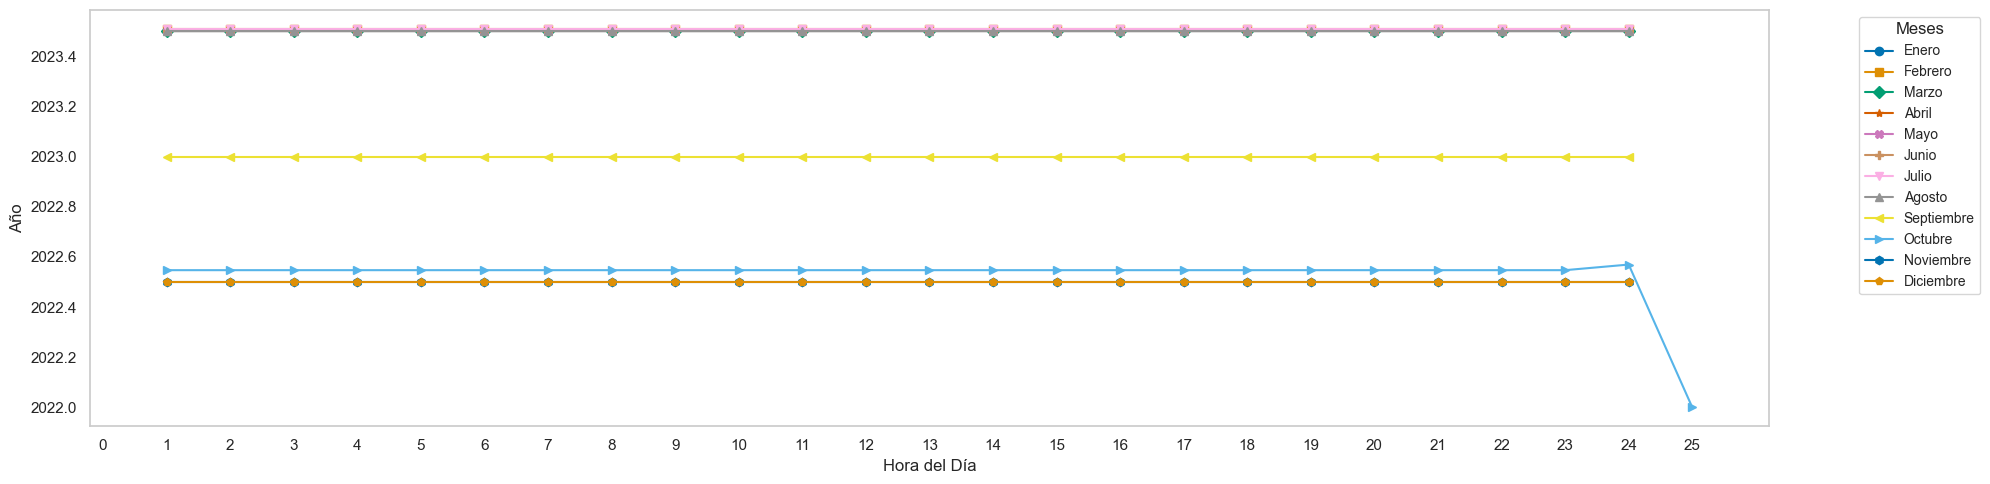

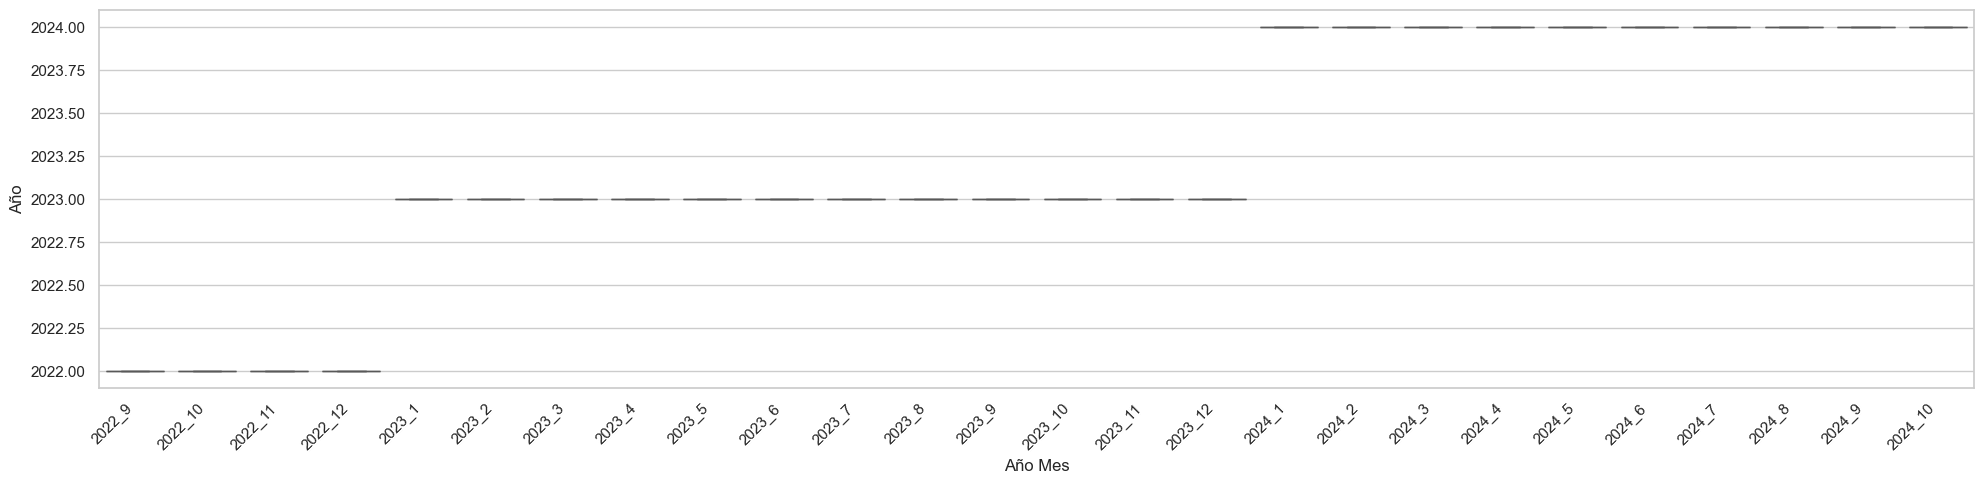

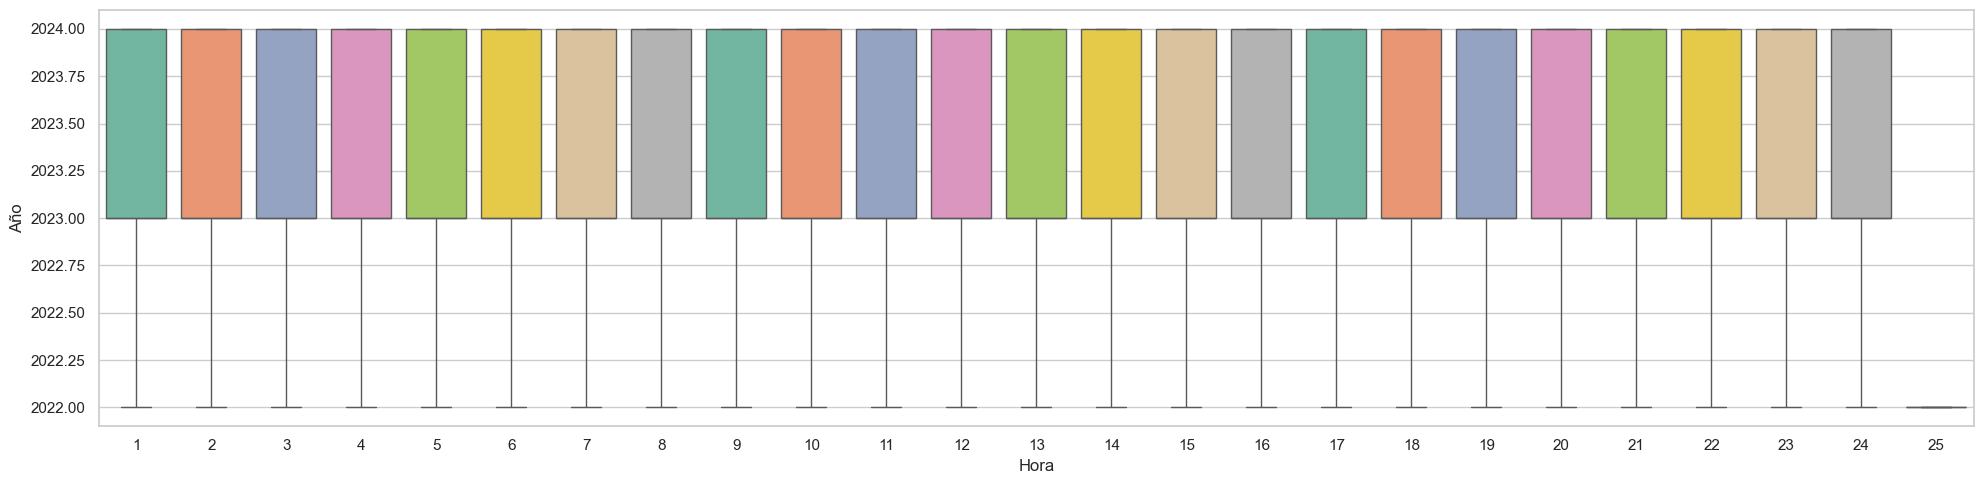

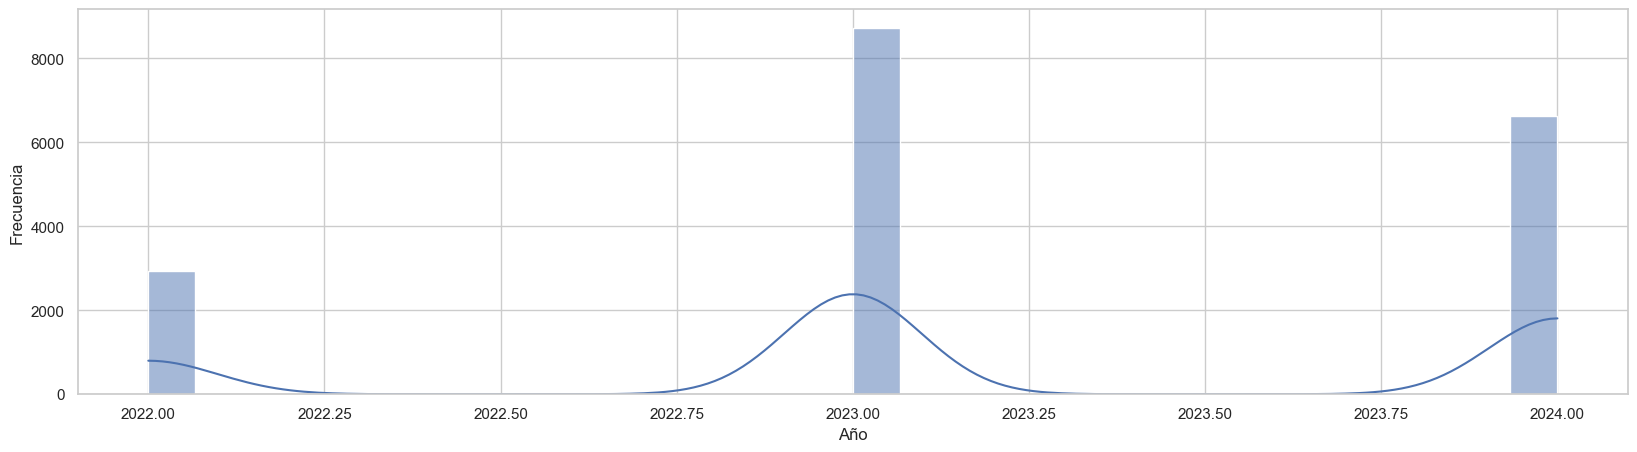

In [139]:
EDA(13246, 13946, 'iNumAnio', 'Año', False)

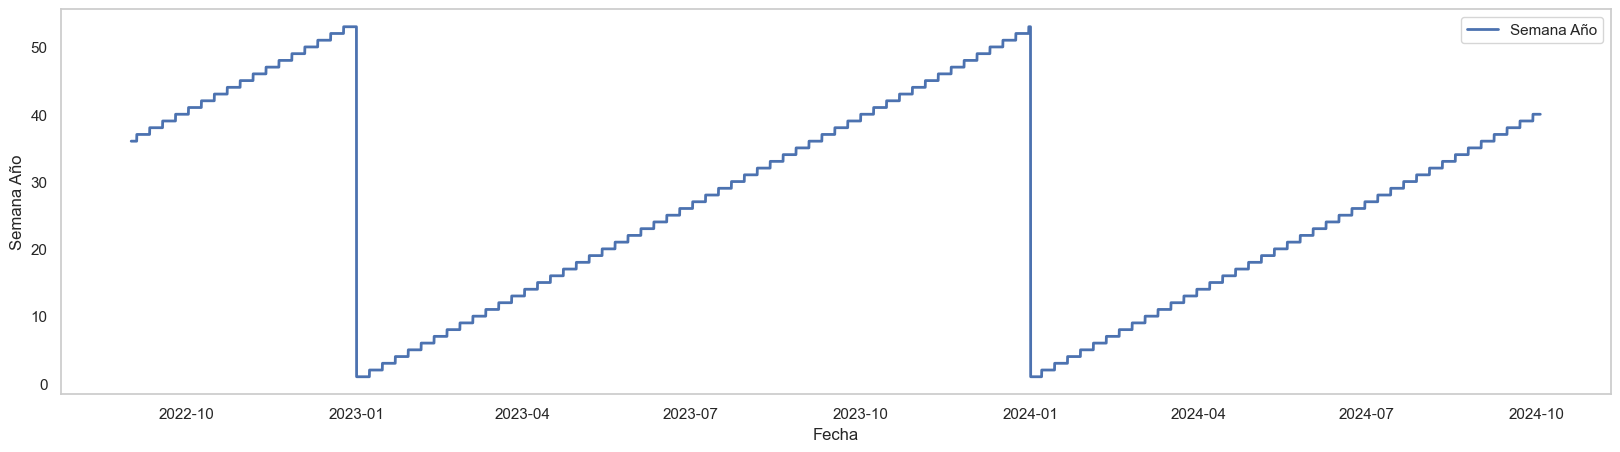

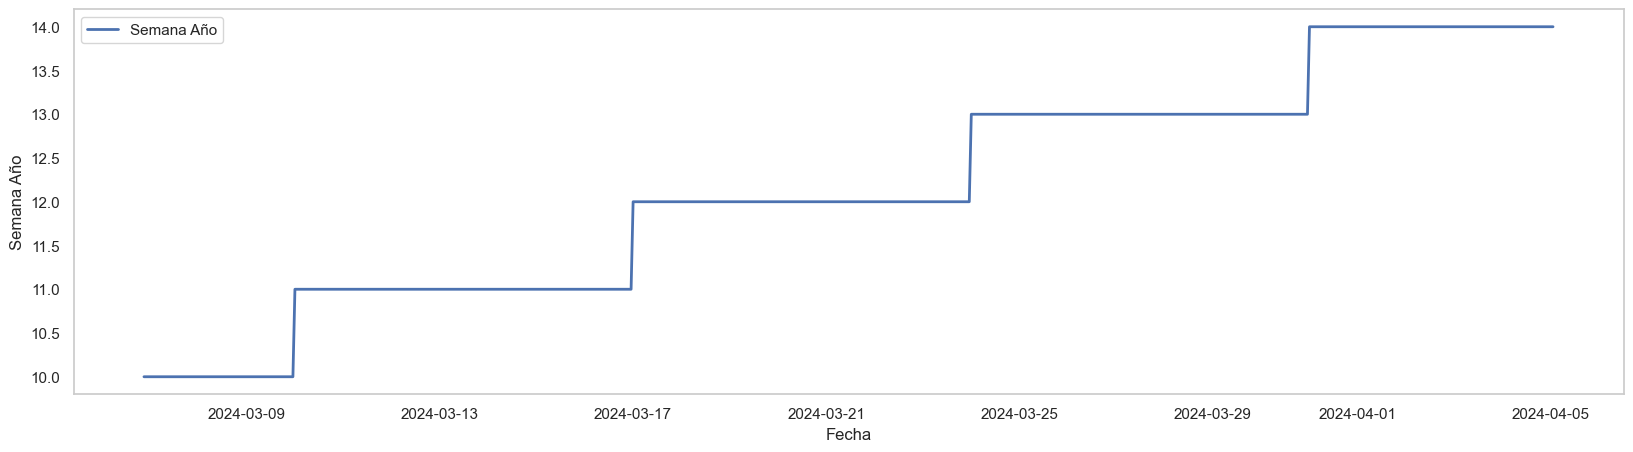

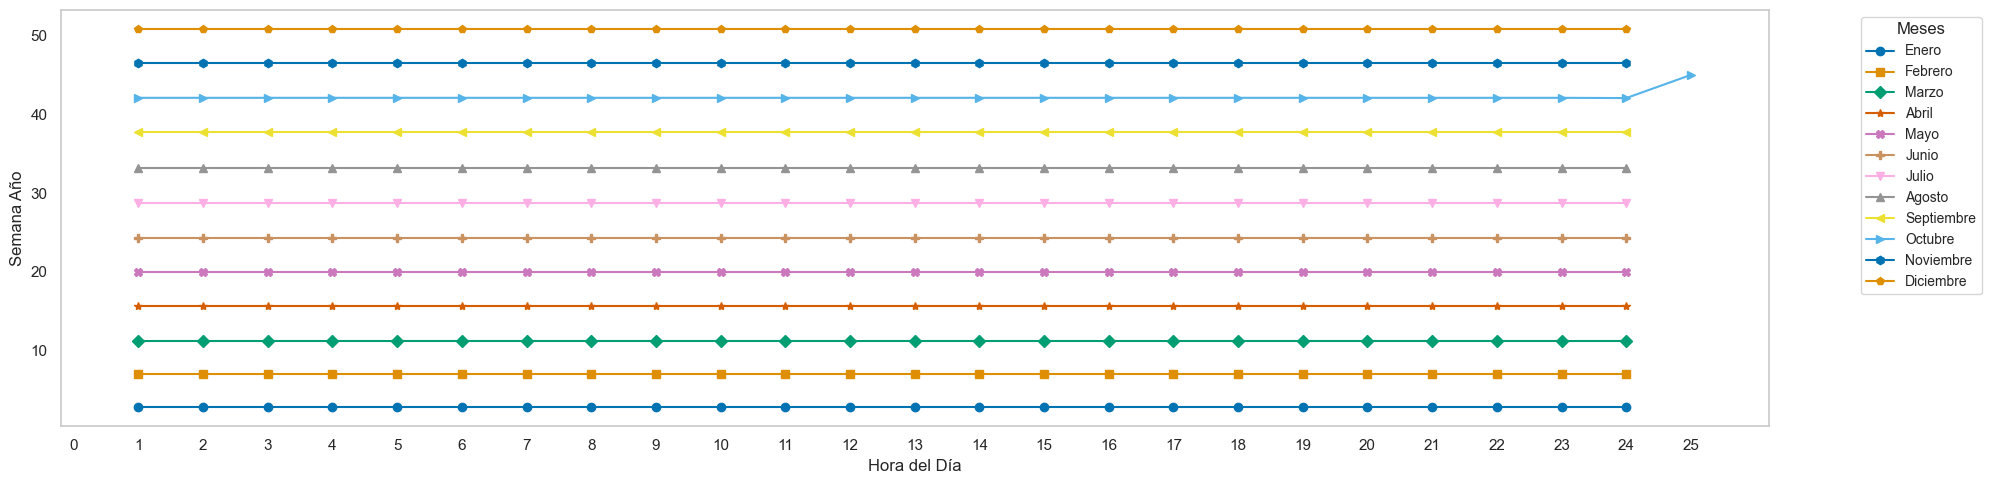

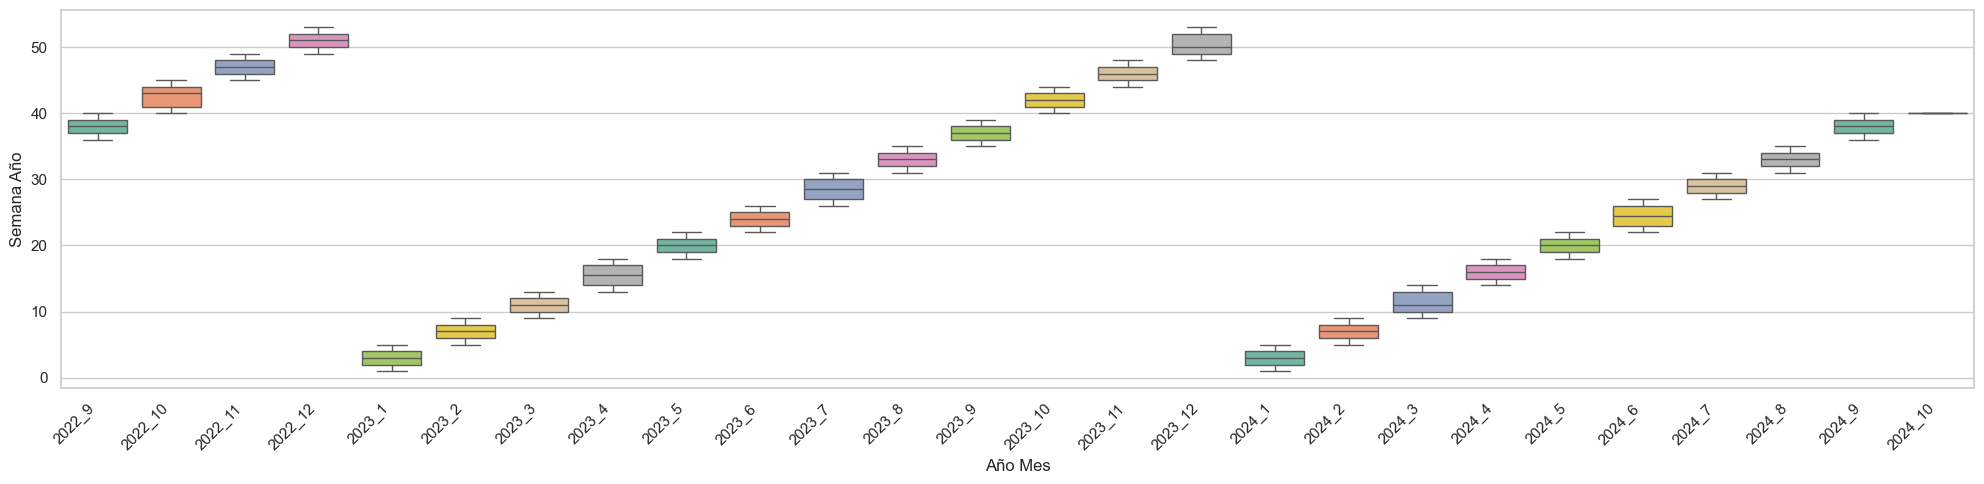

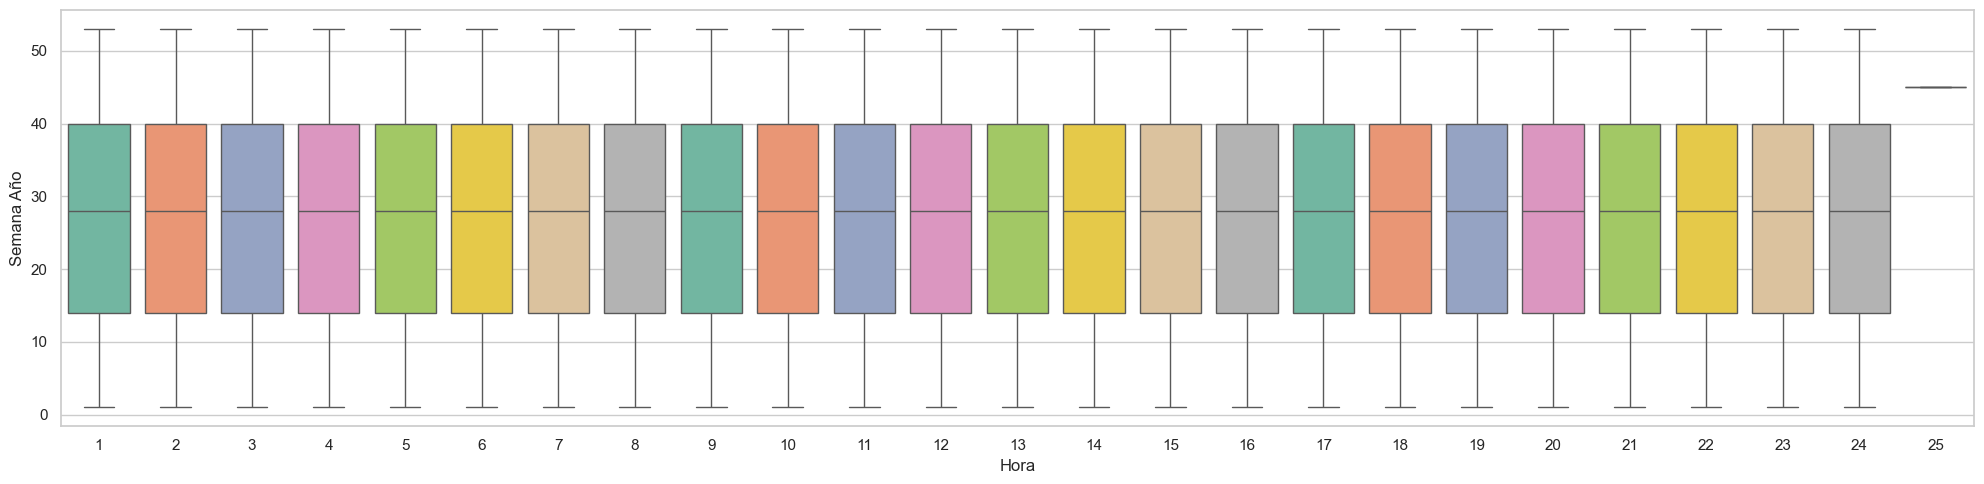

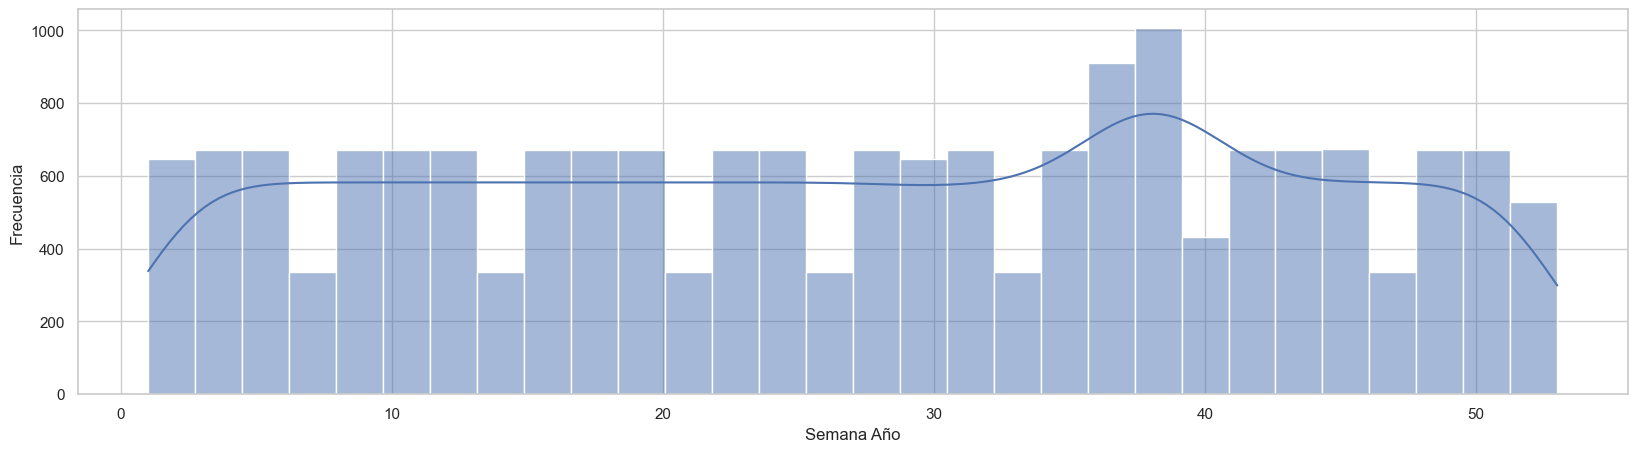

In [140]:
EDA(13246, 13946, 'iNumSemana', 'Semana Año', False)

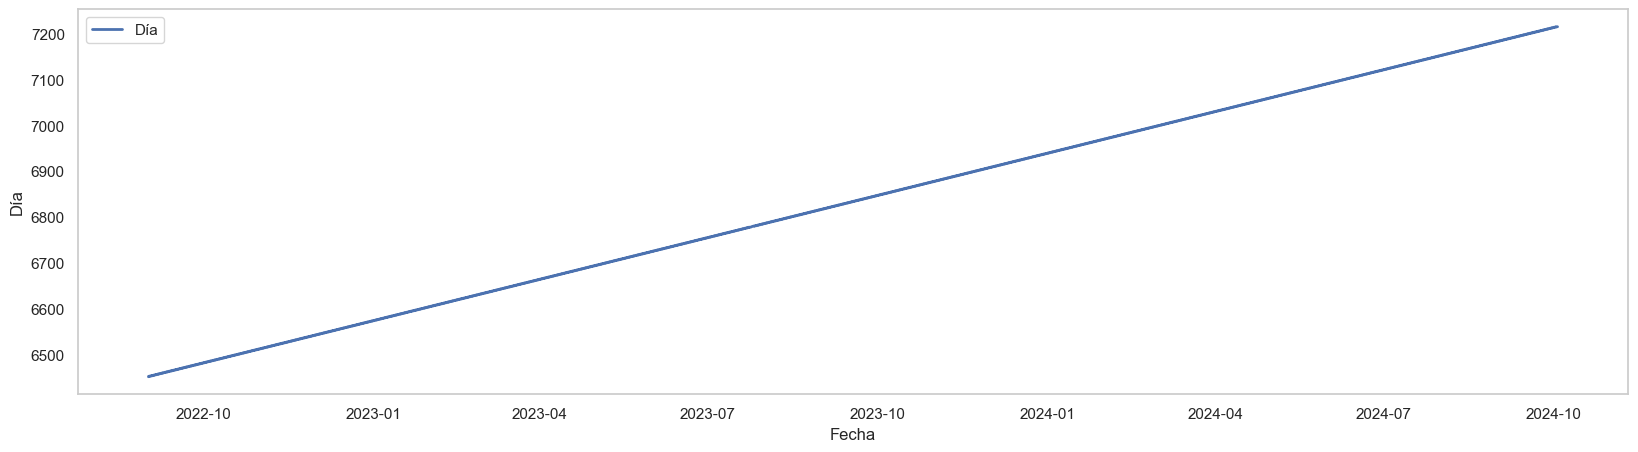

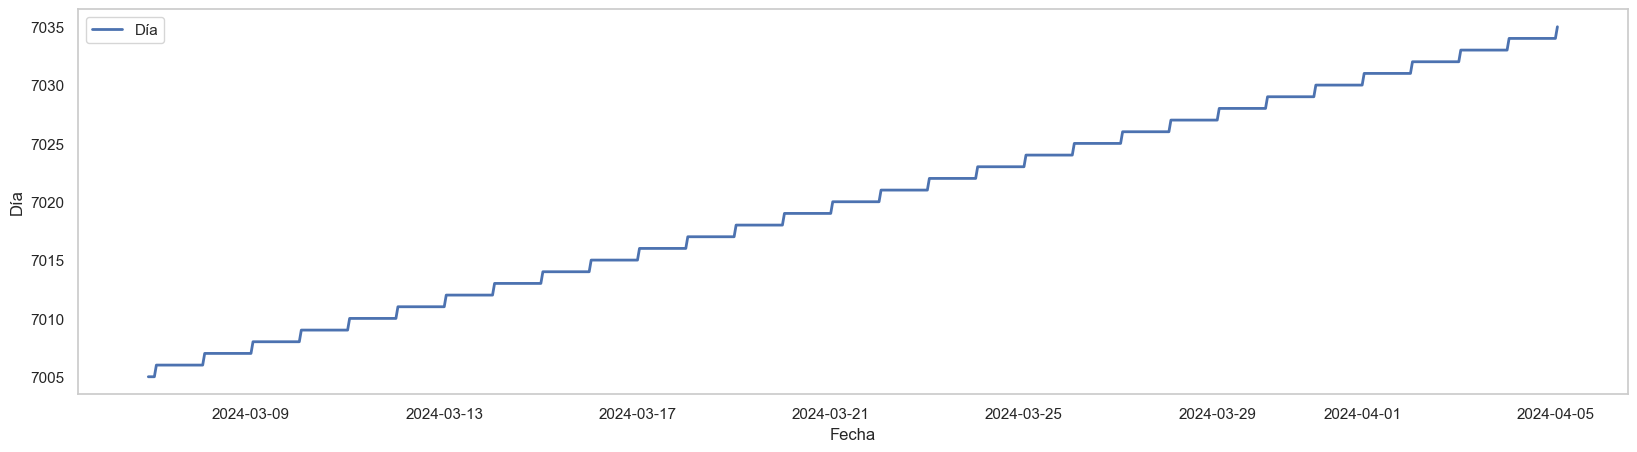

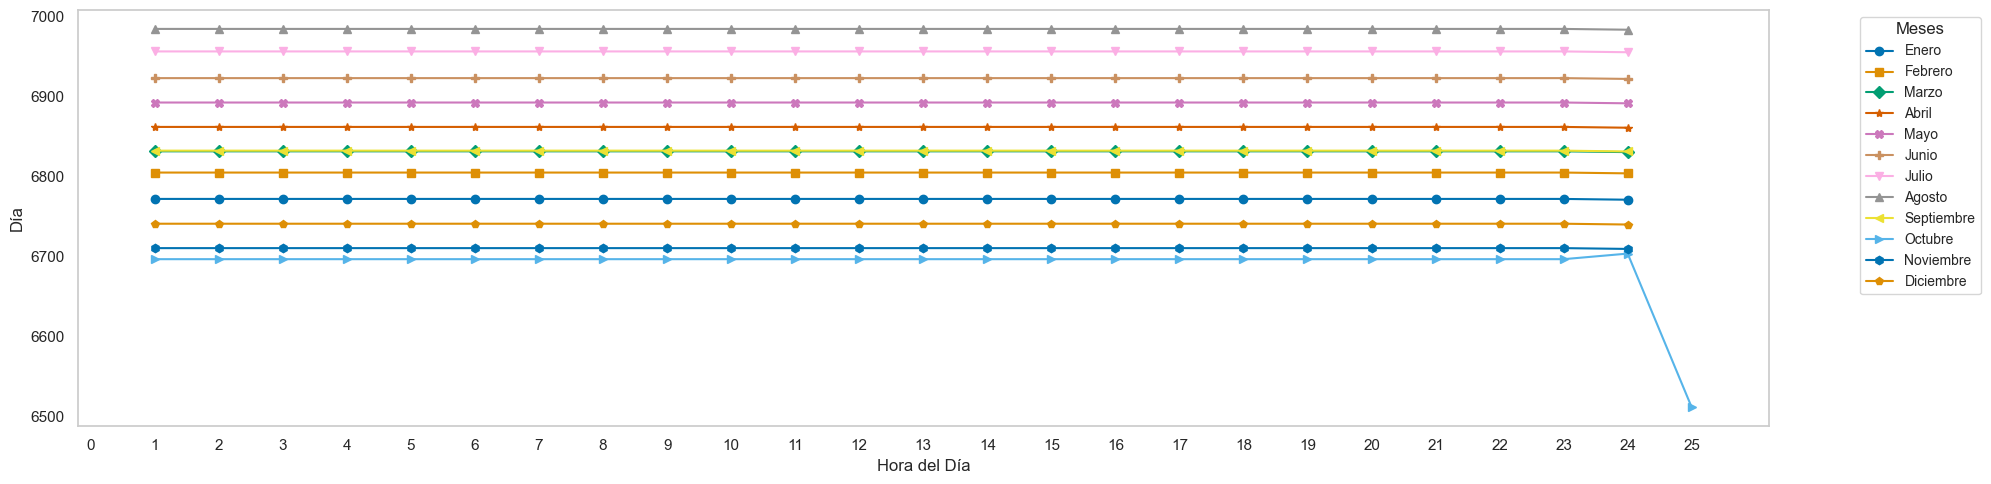

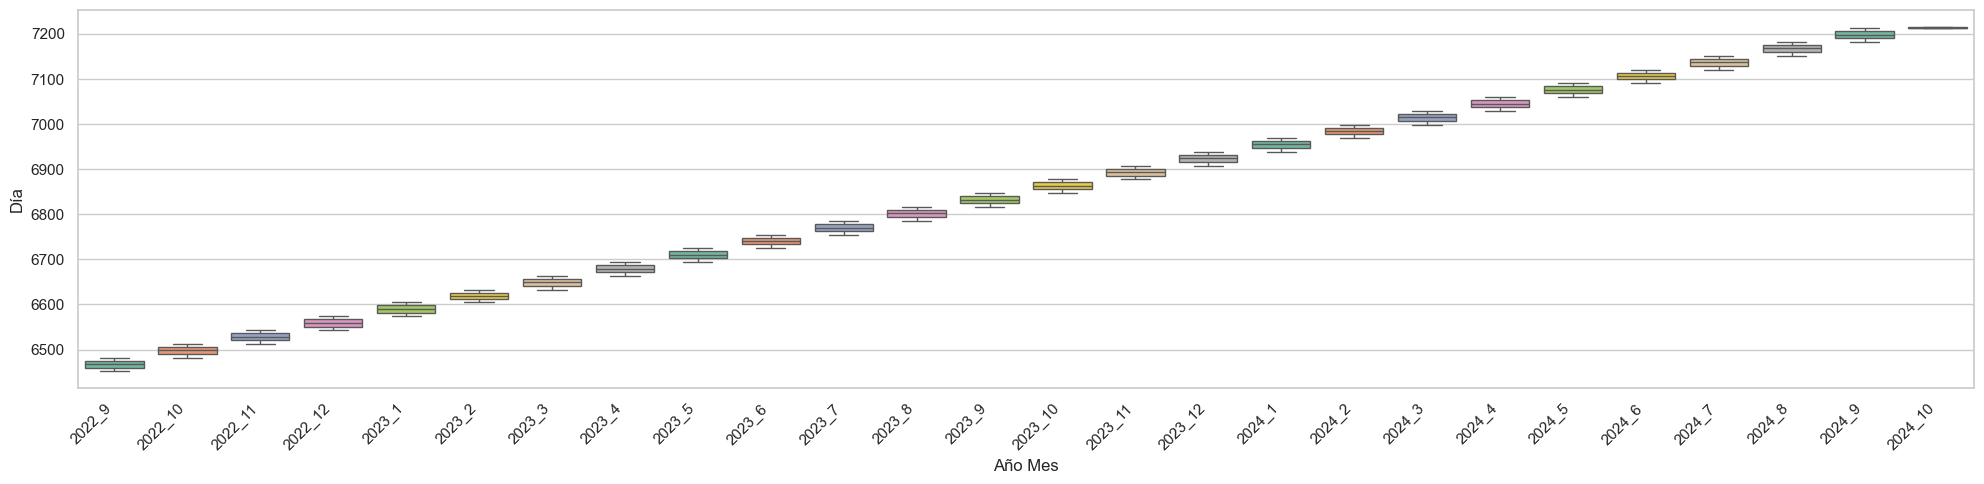

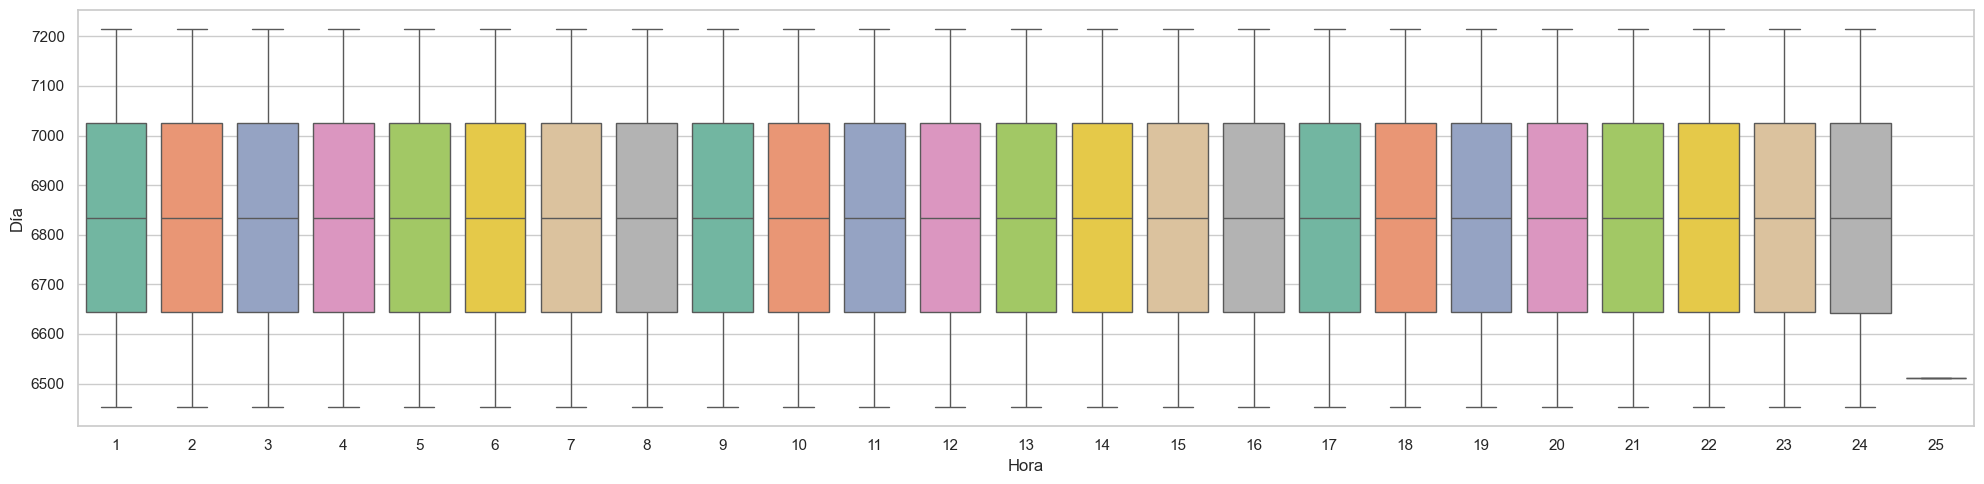

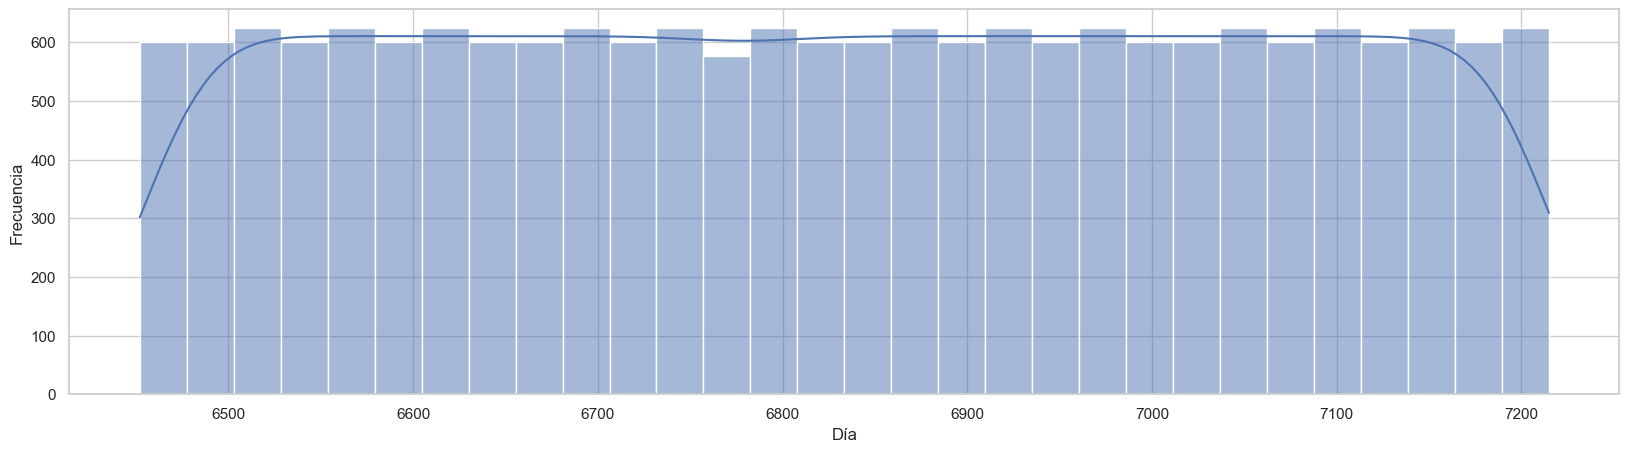

In [141]:
EDA(13246, 13946, 'iCodDia', 'Día', False)

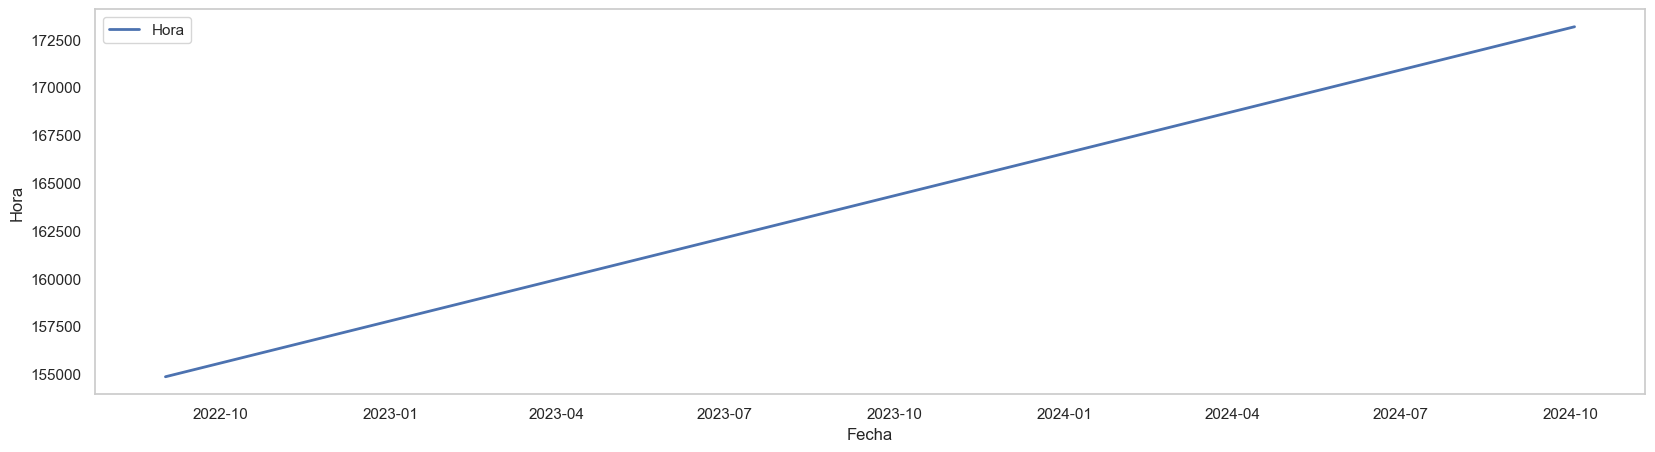

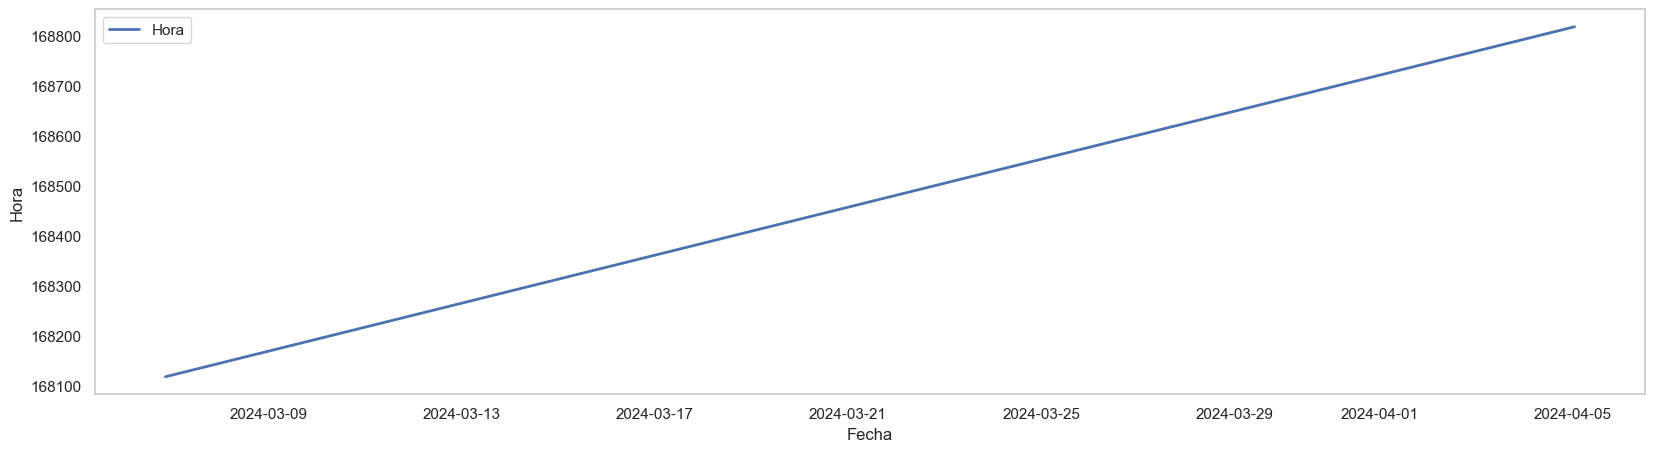

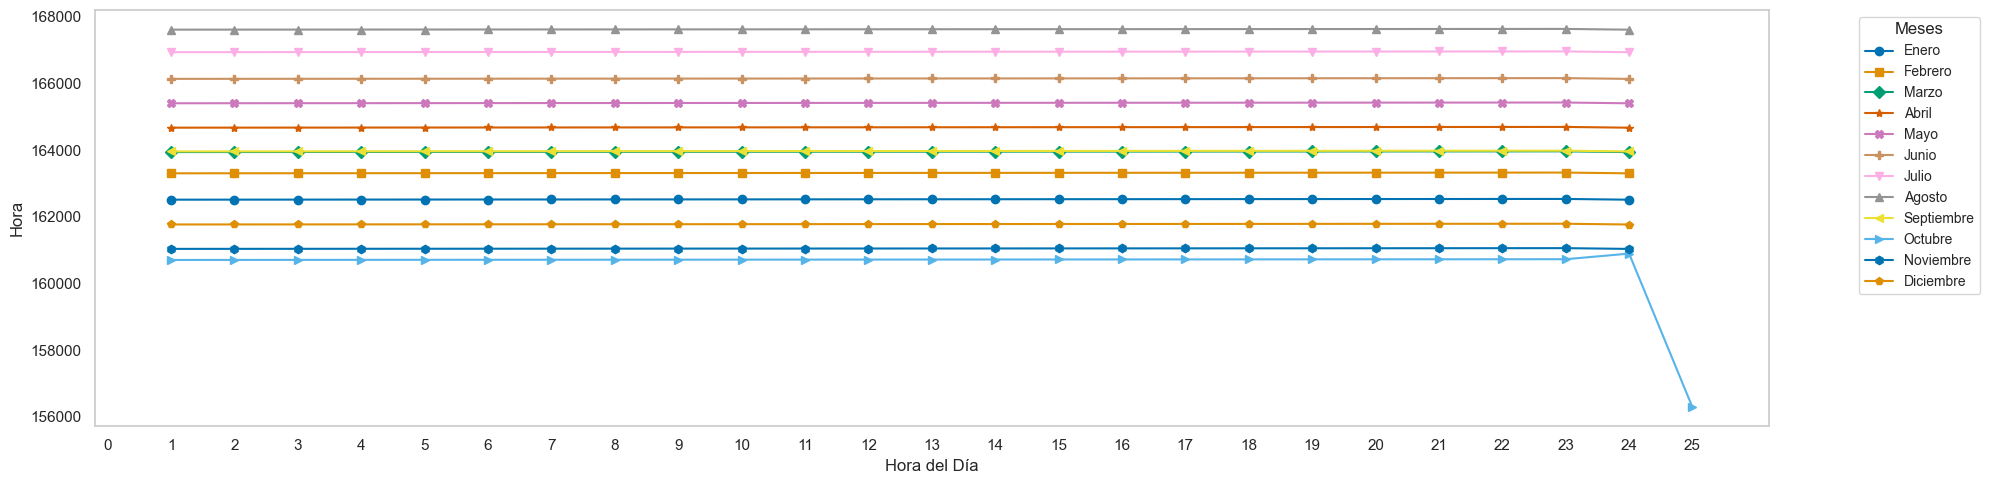

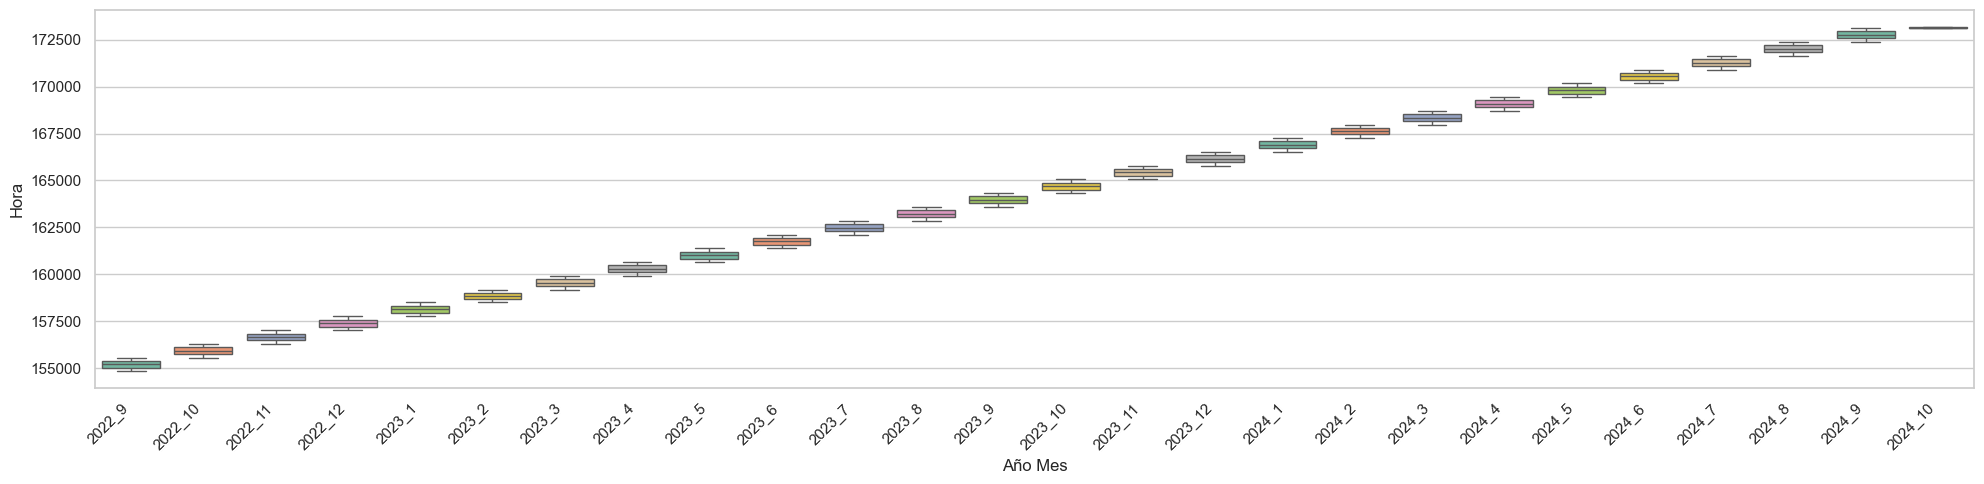

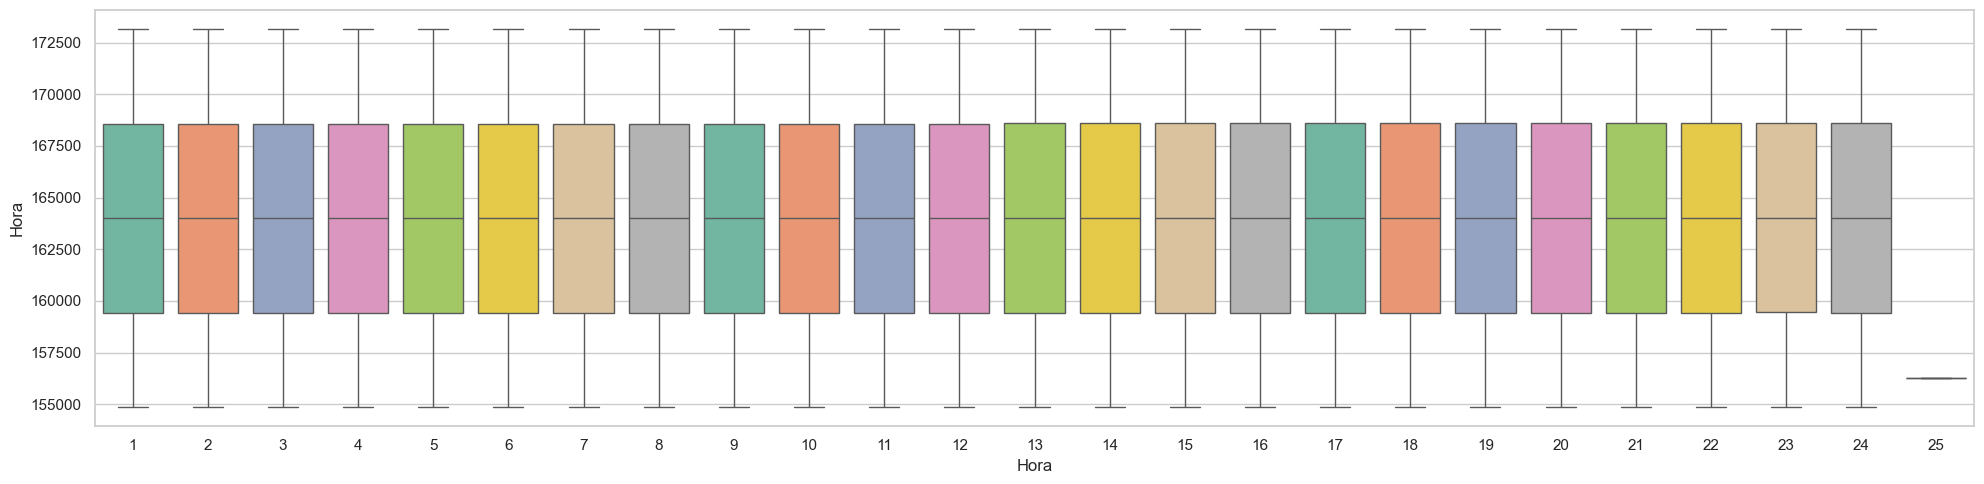

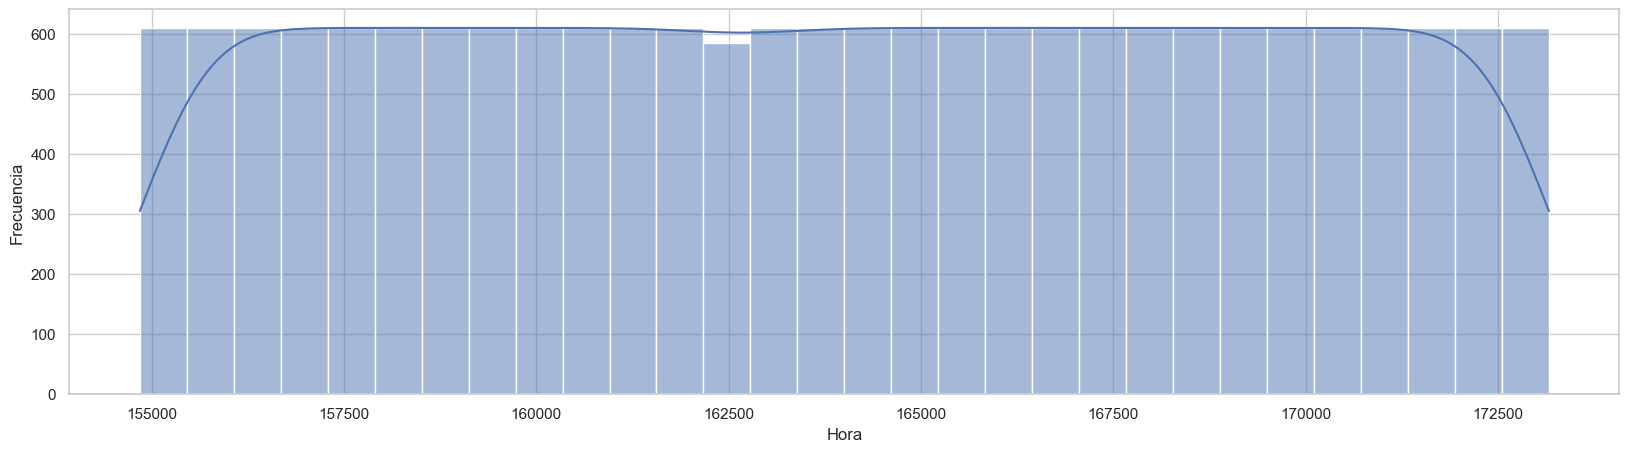

In [142]:
EDA(13246, 13946, 'iCodHora', 'Hora', False)

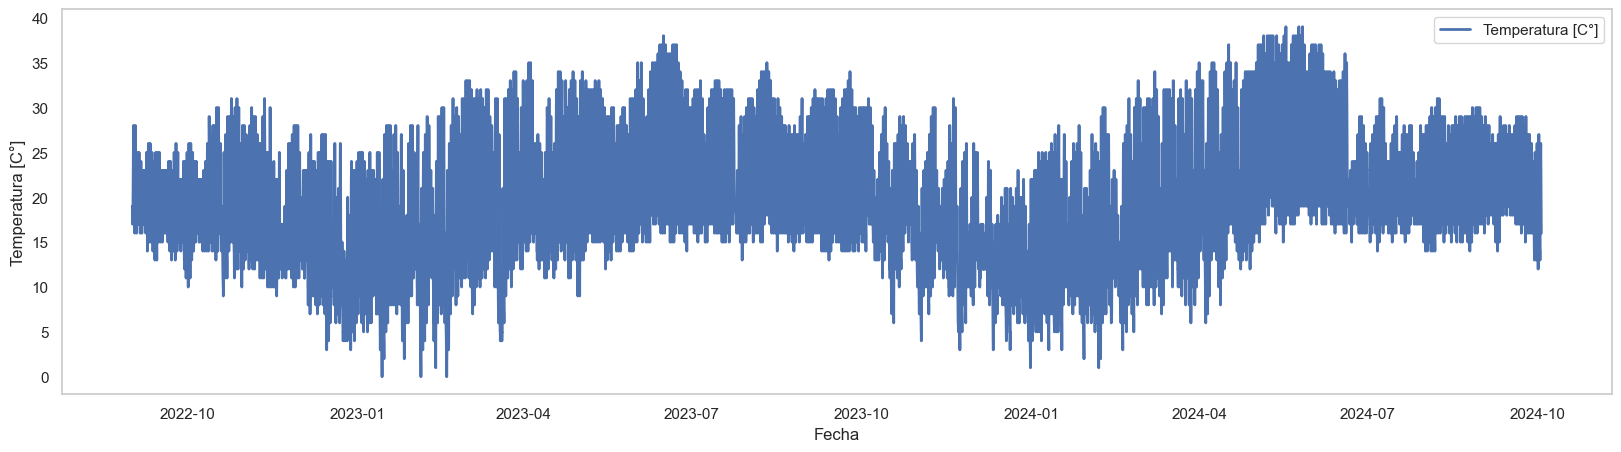

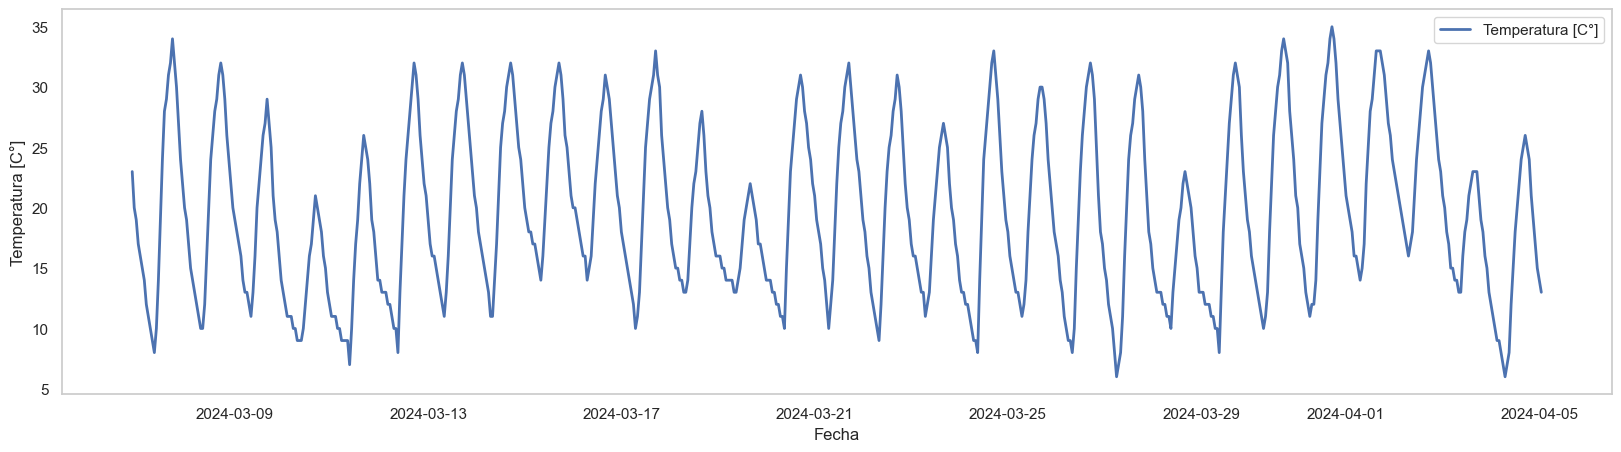

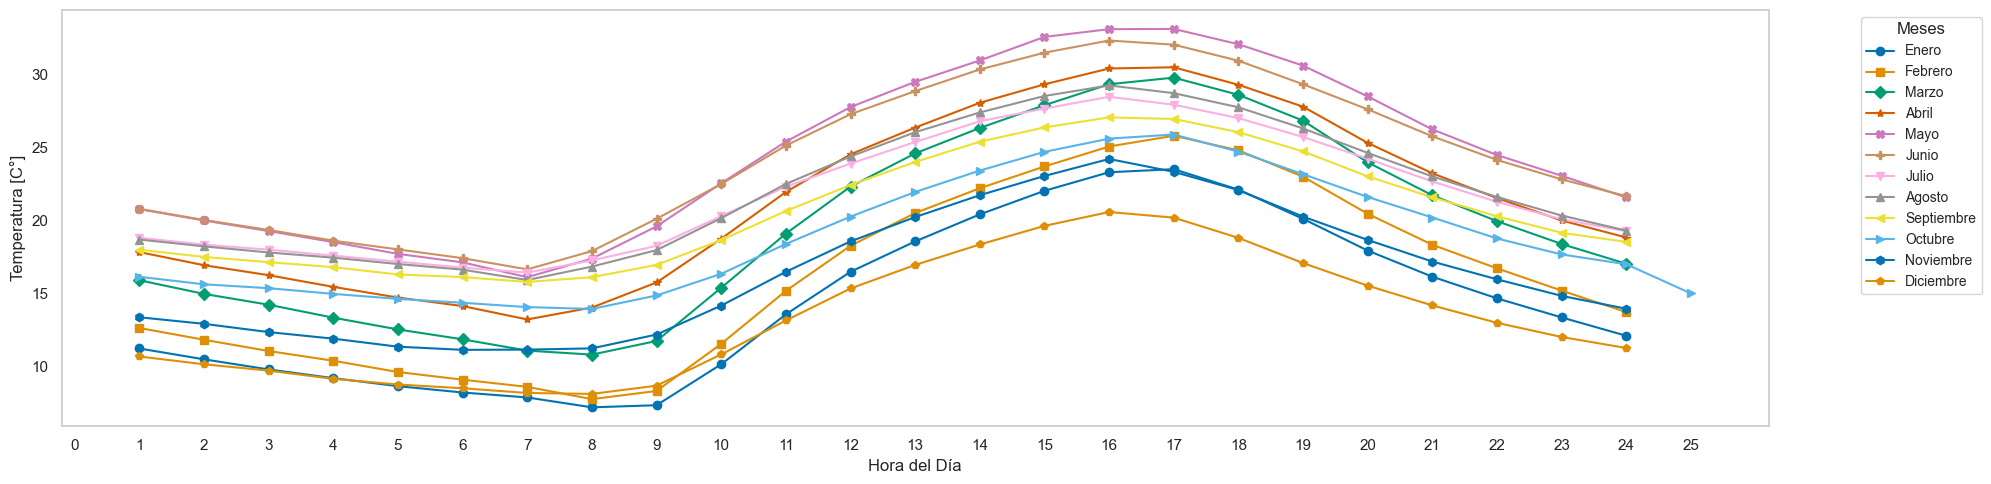

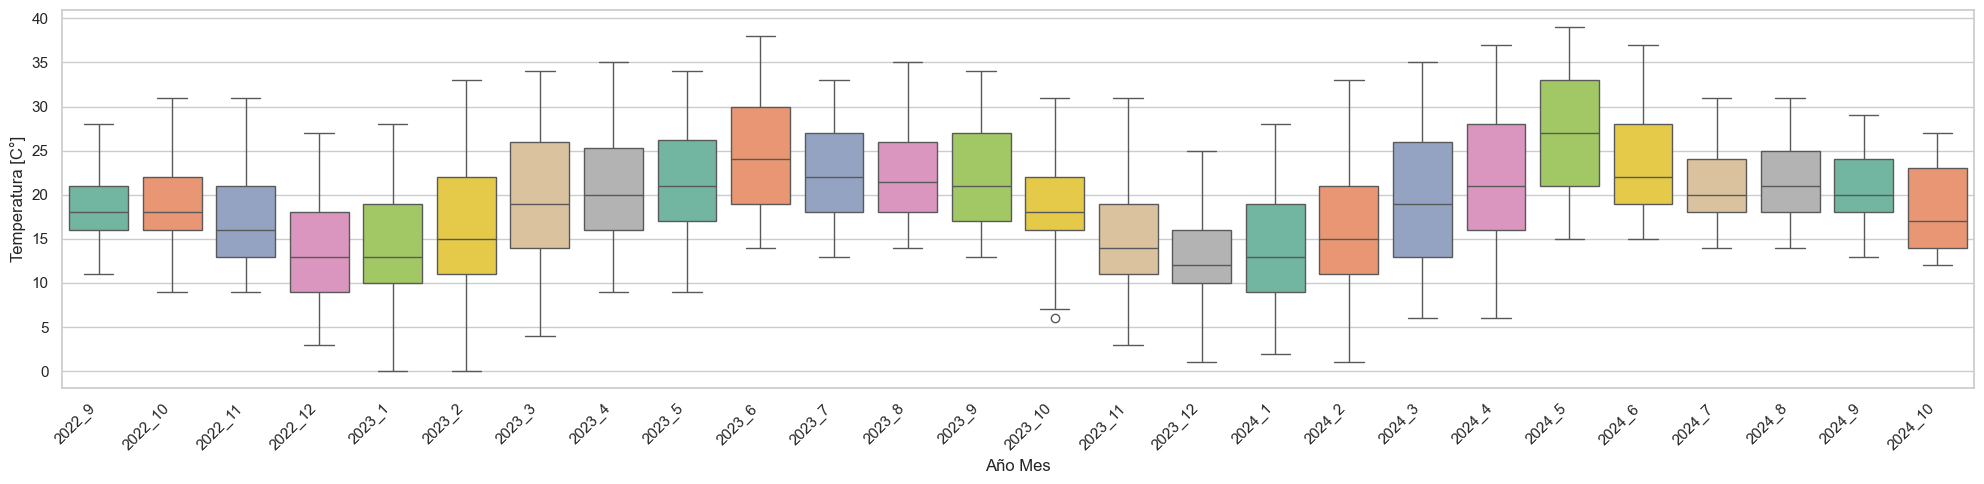

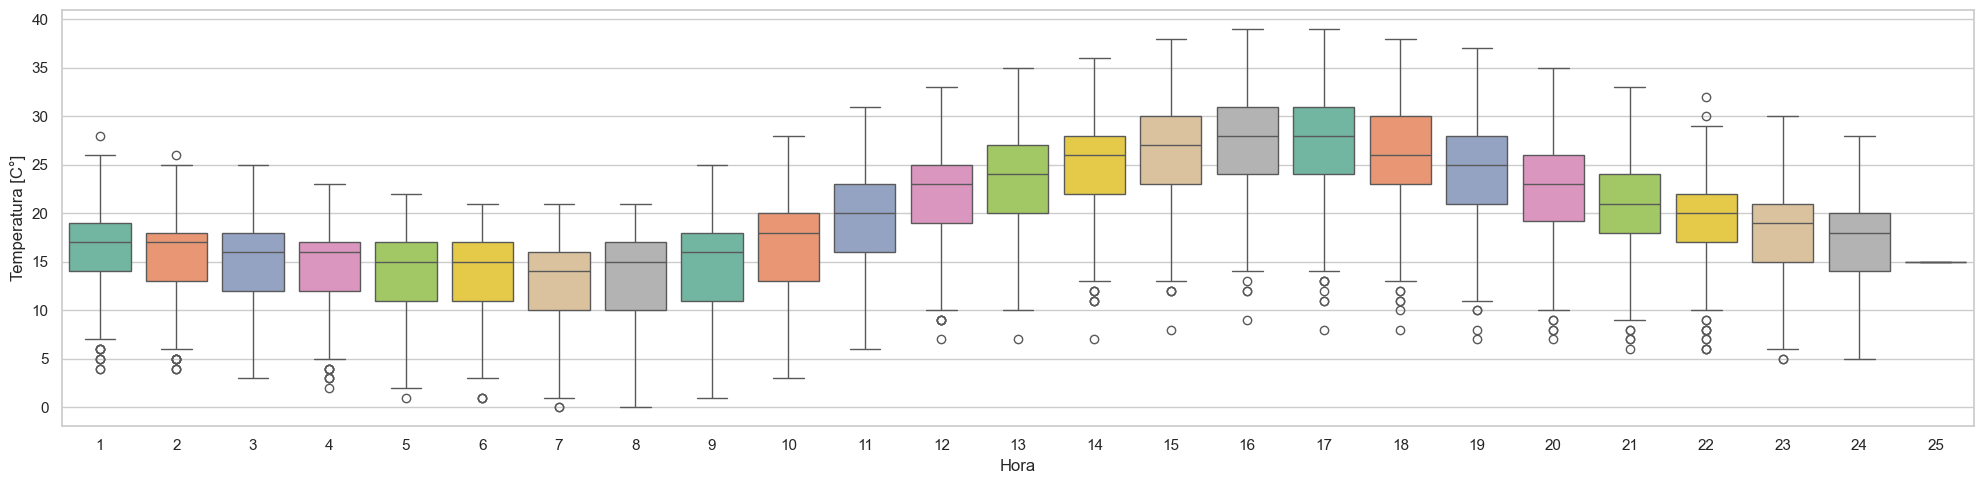

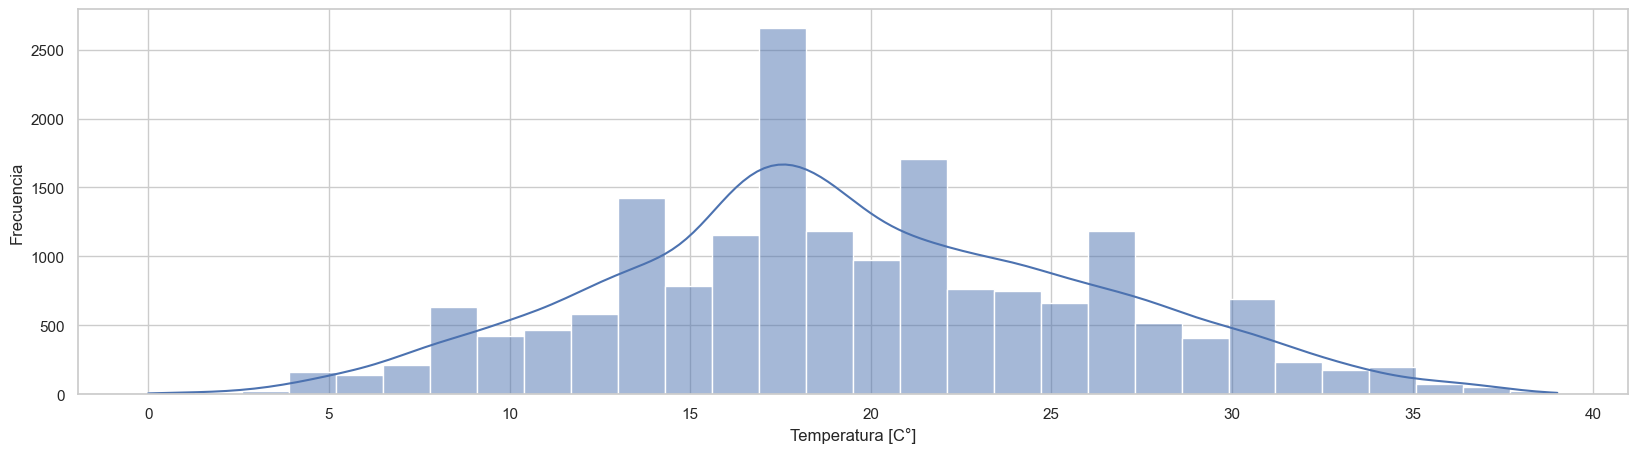

In [143]:
EDA(13246, 13946, 'fltTemp', 'Temperatura [C°]', True)

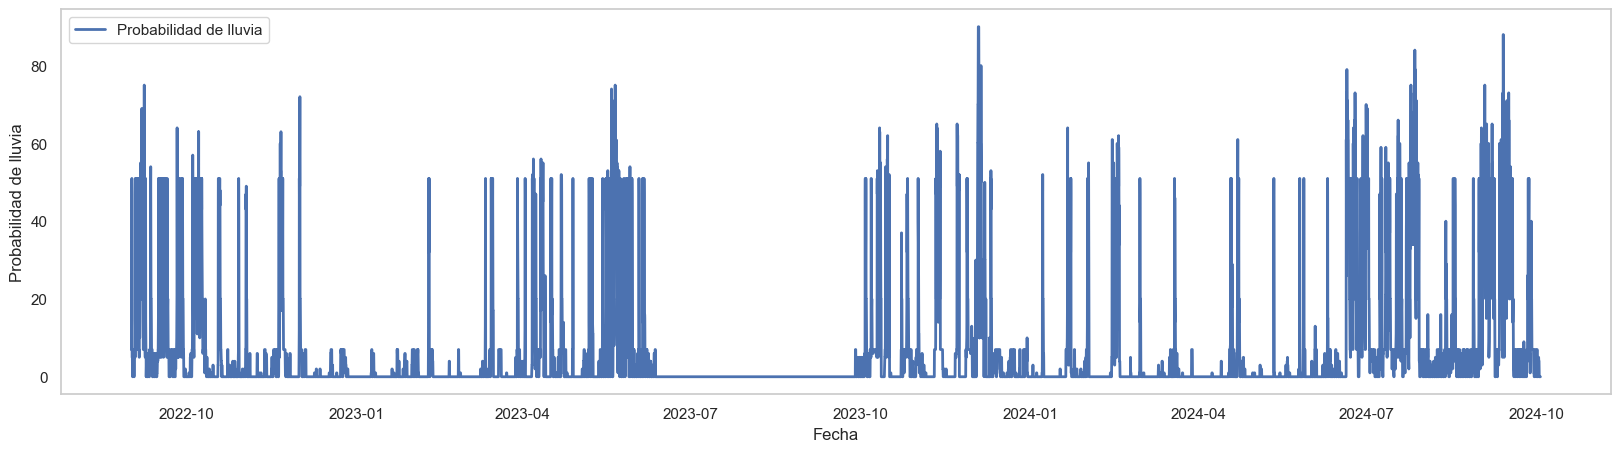

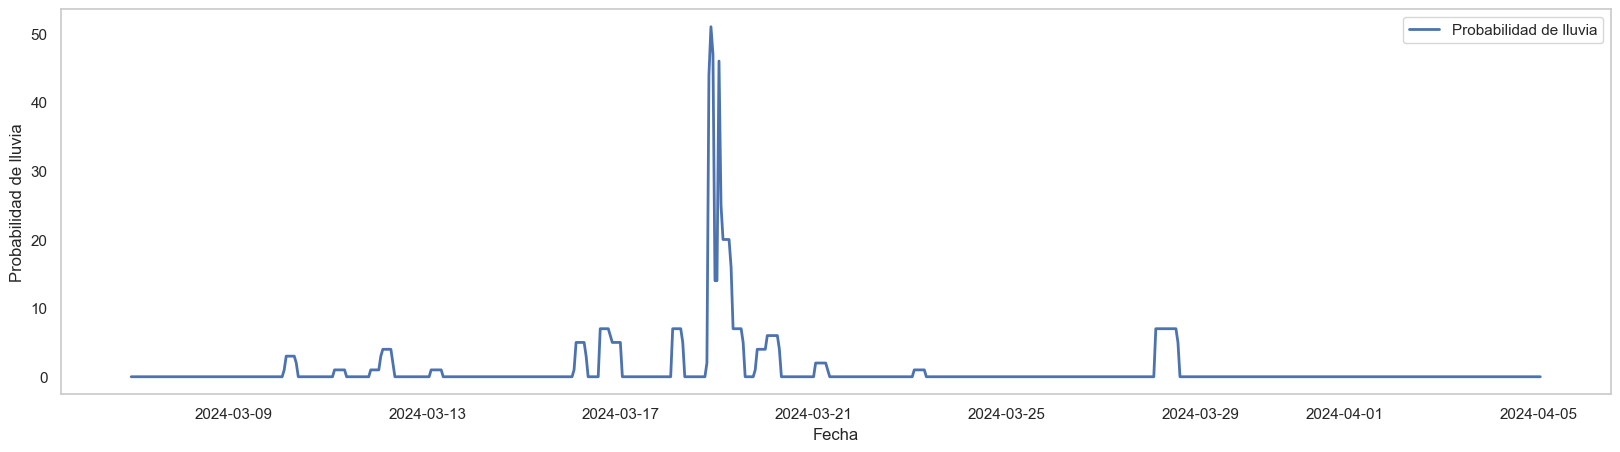

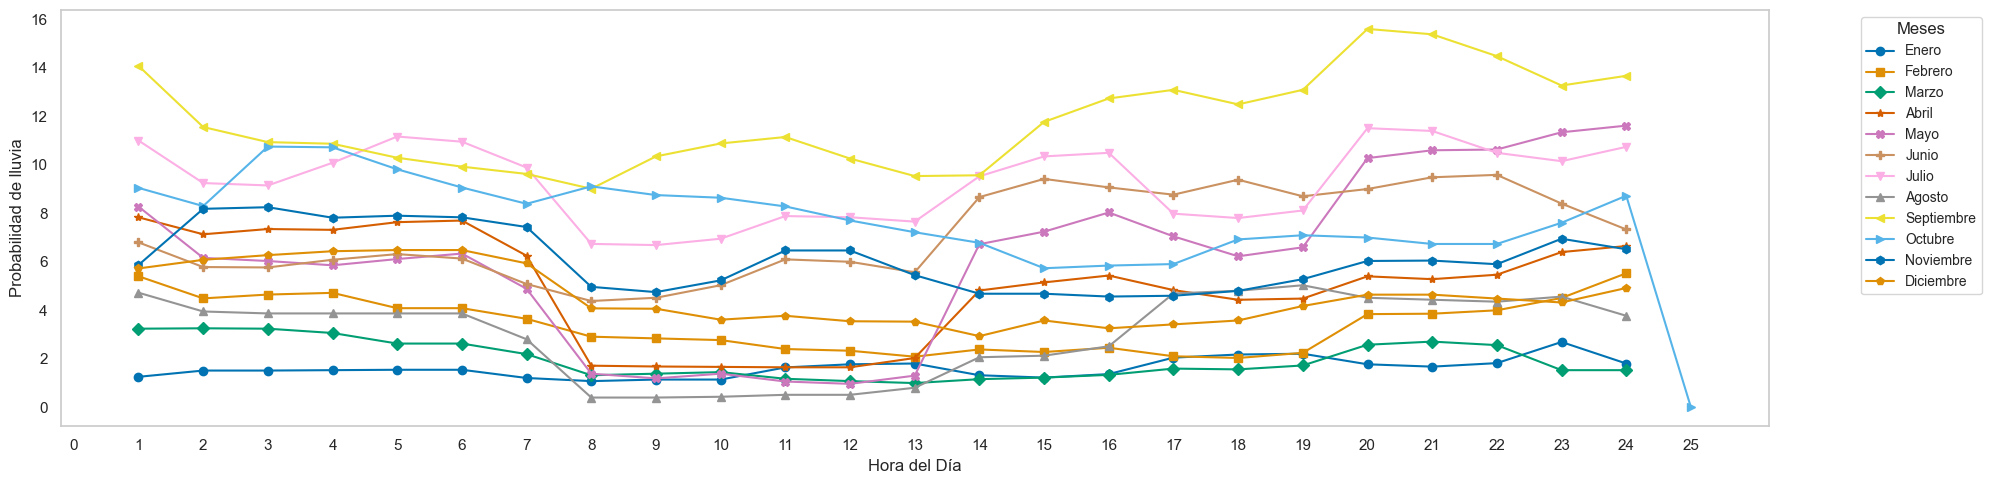

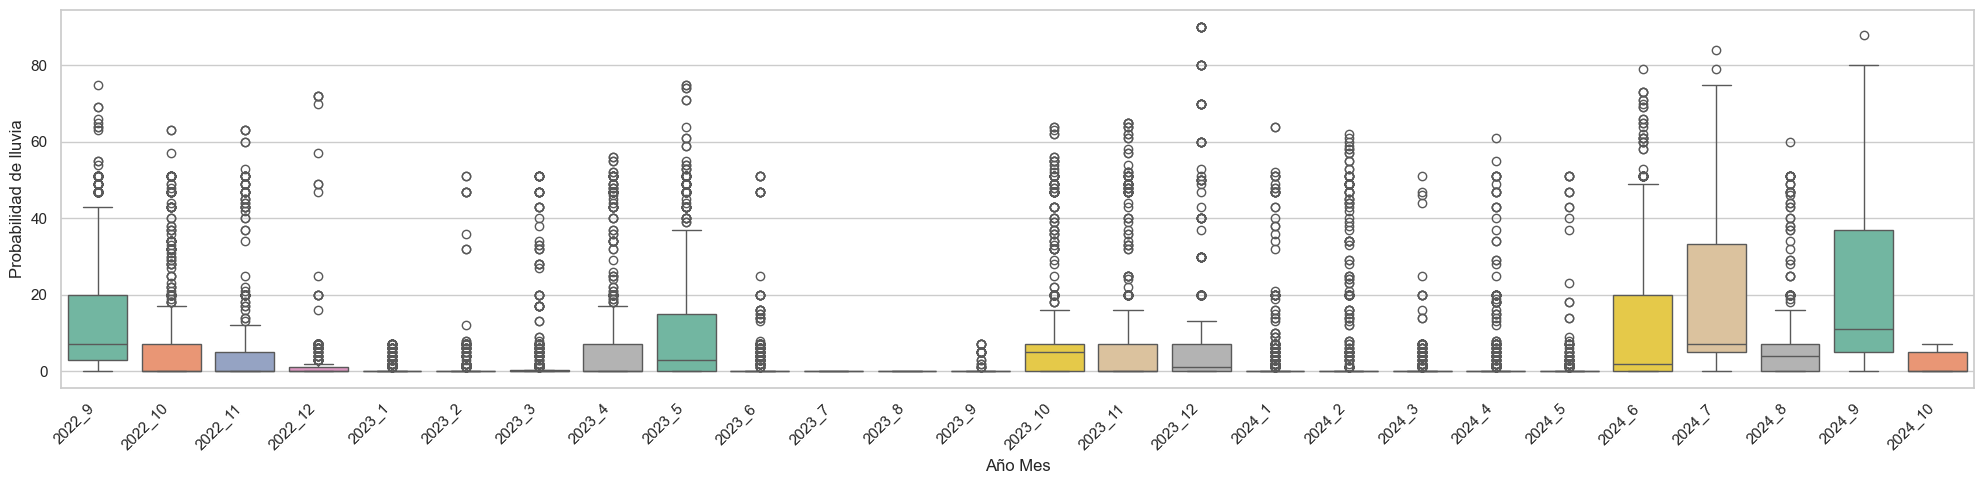

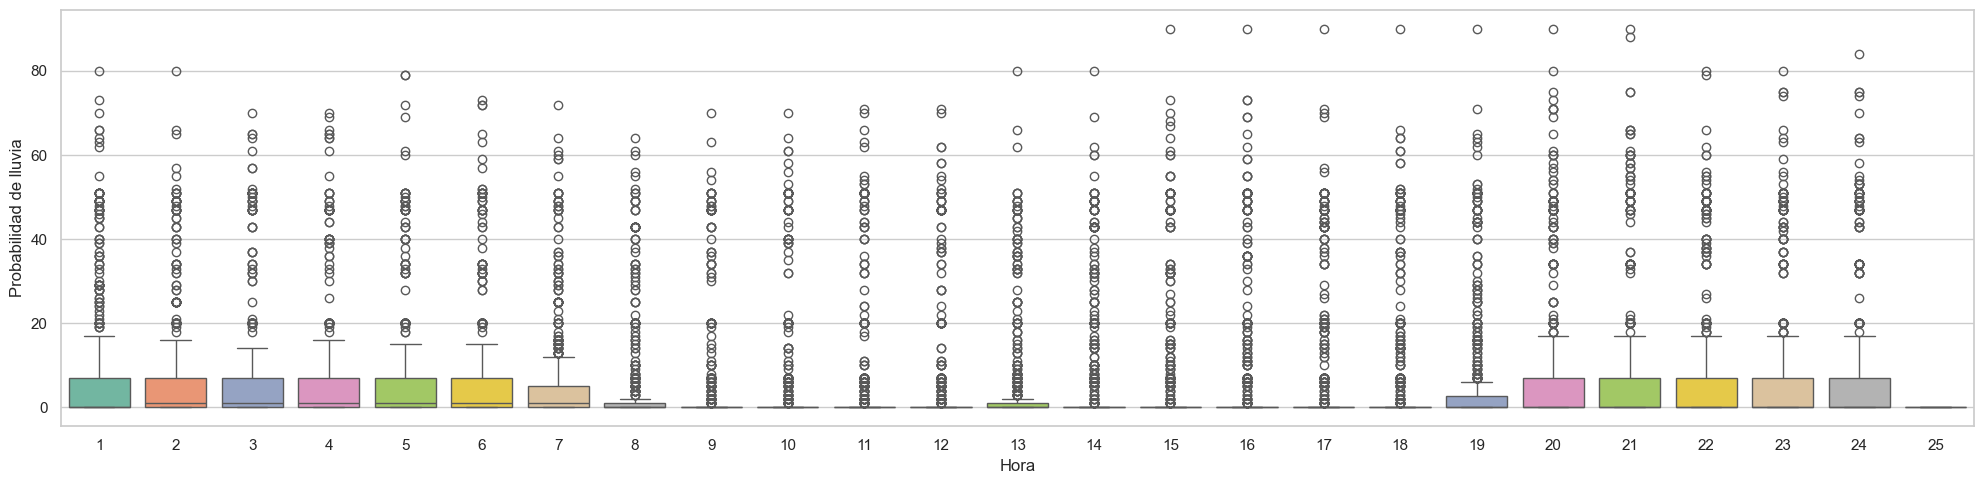

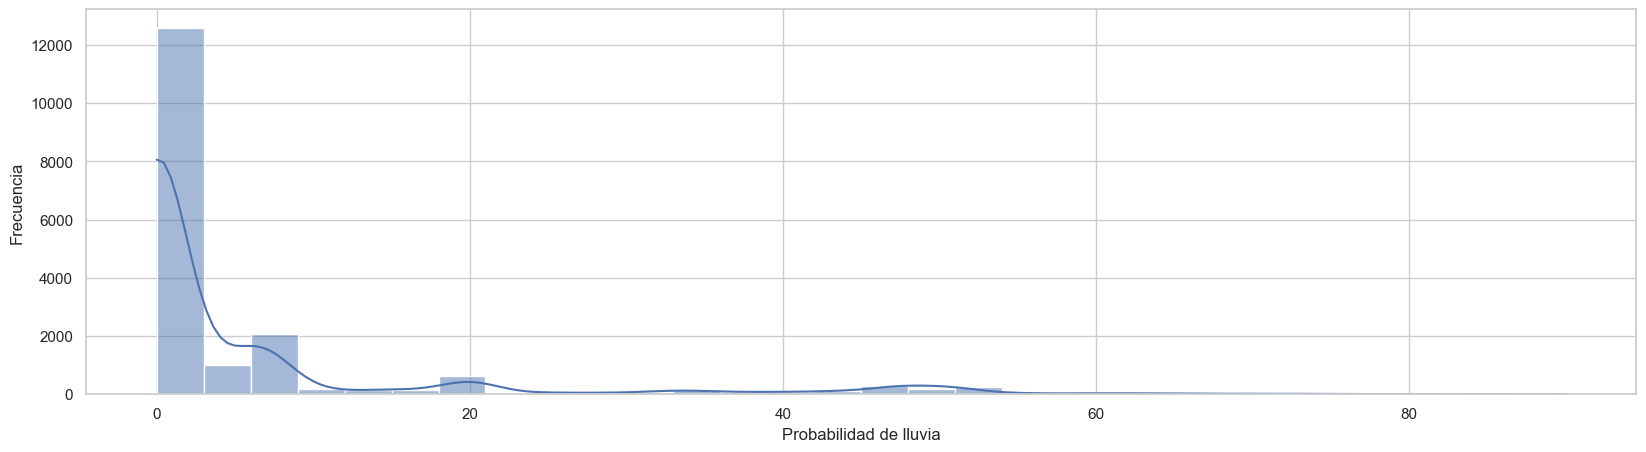

In [144]:
EDA(13246, 13946, 'fltProbabilidadLluvia', 'Probabilidad de lluvia', True)

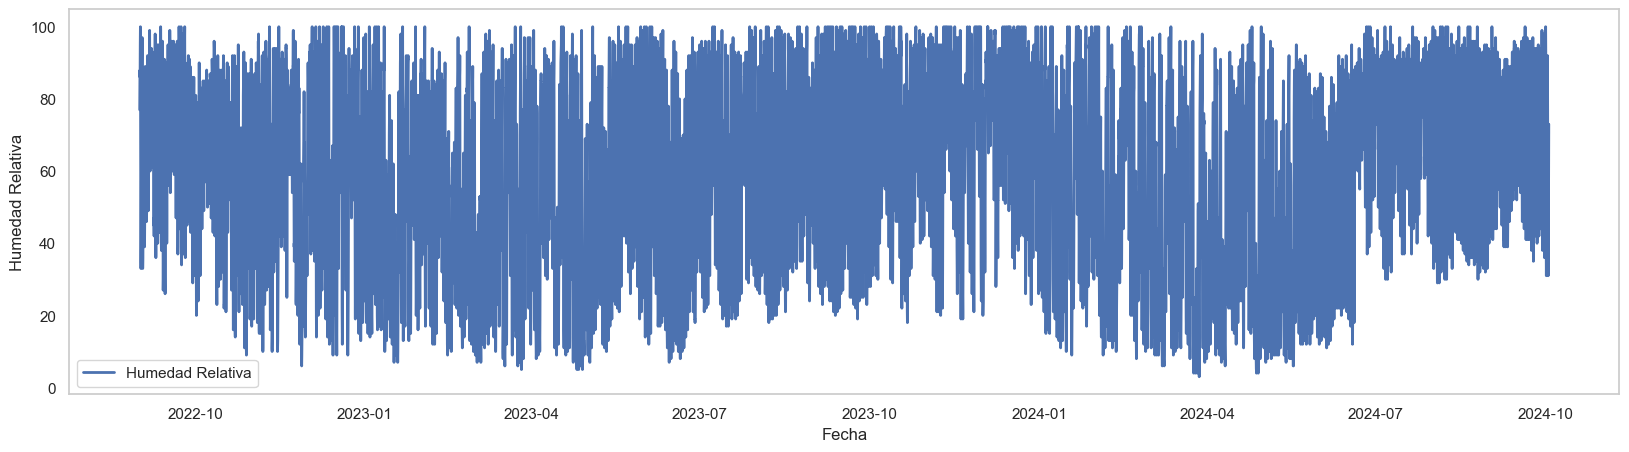

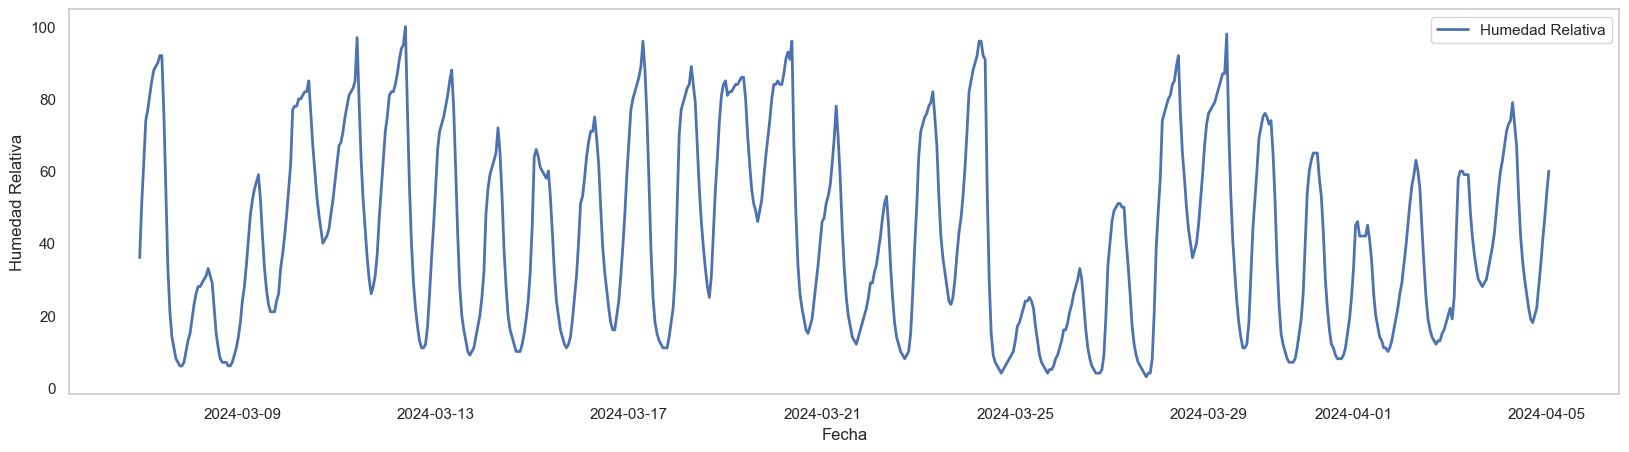

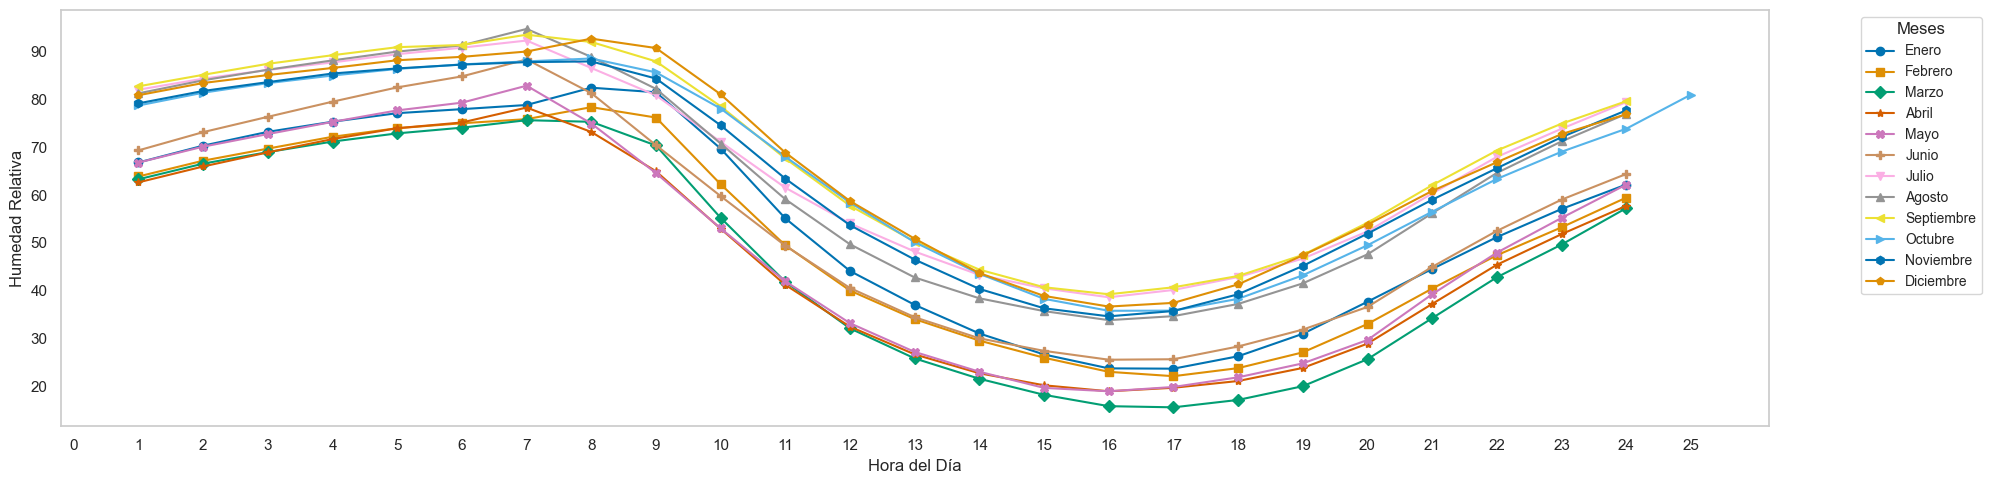

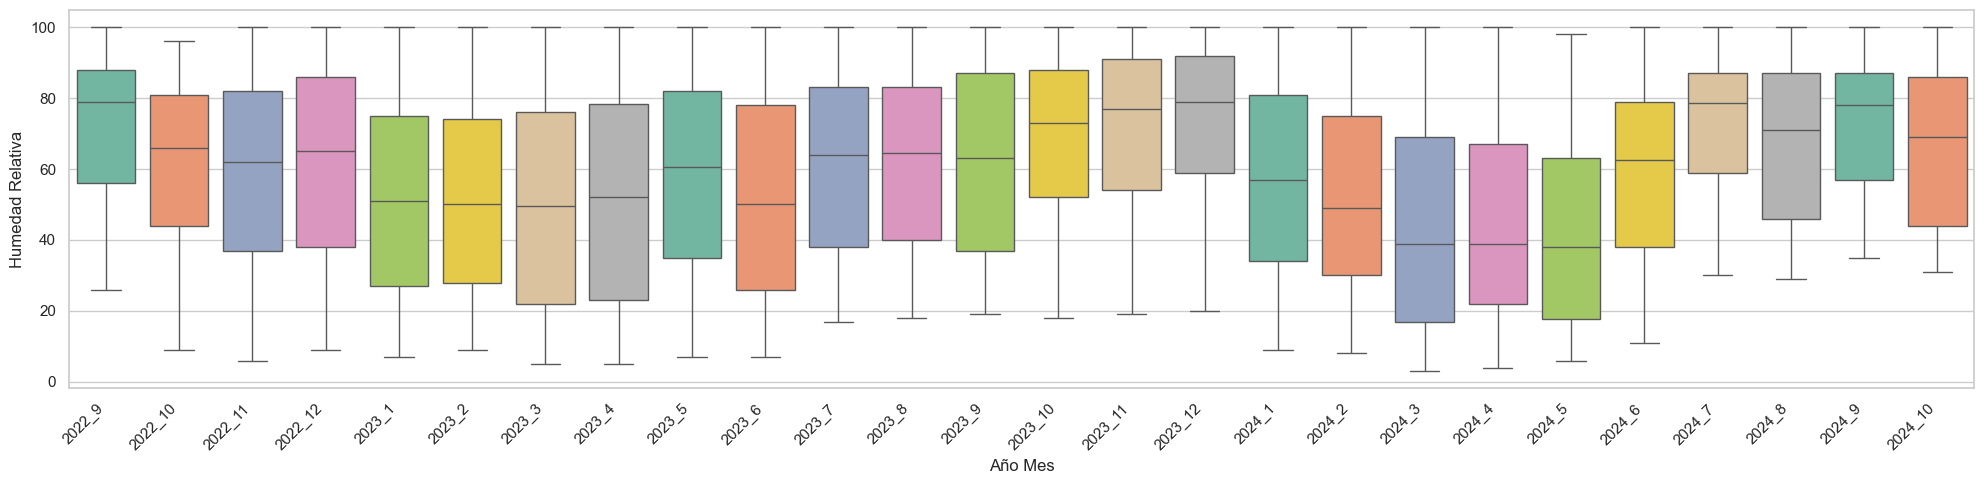

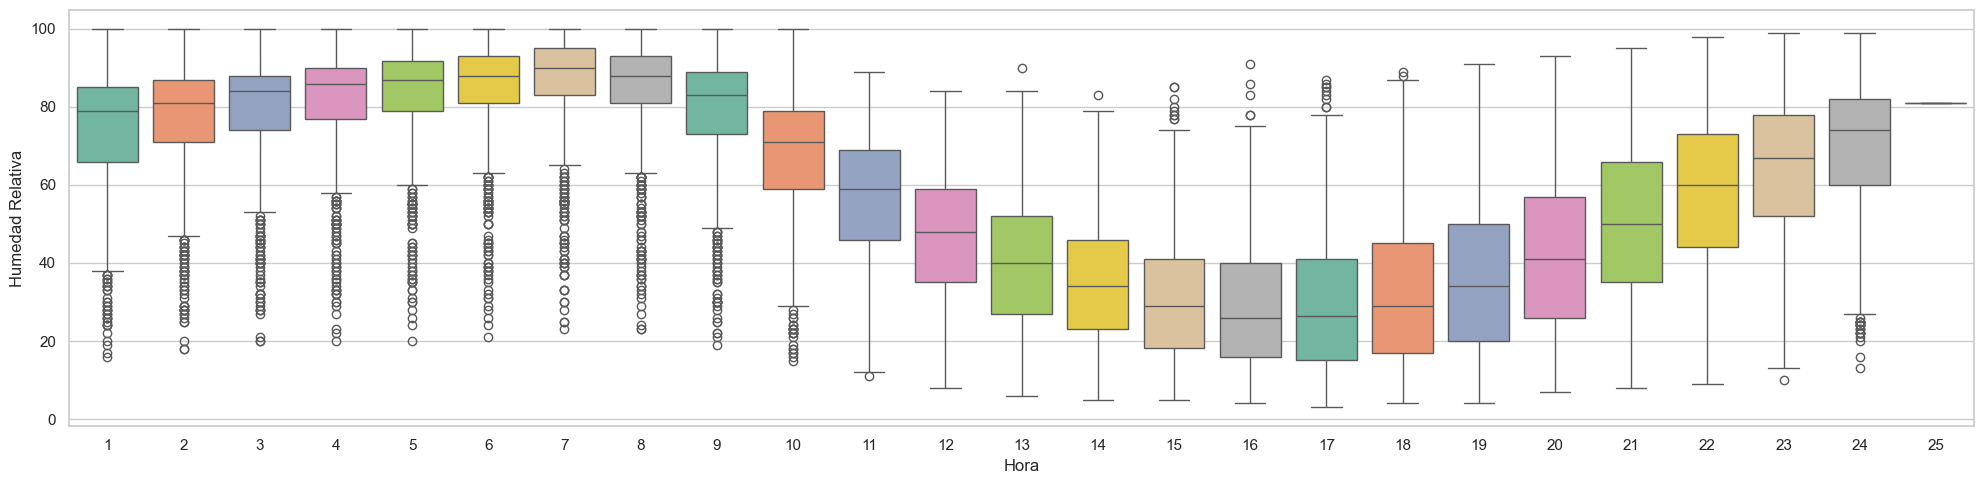

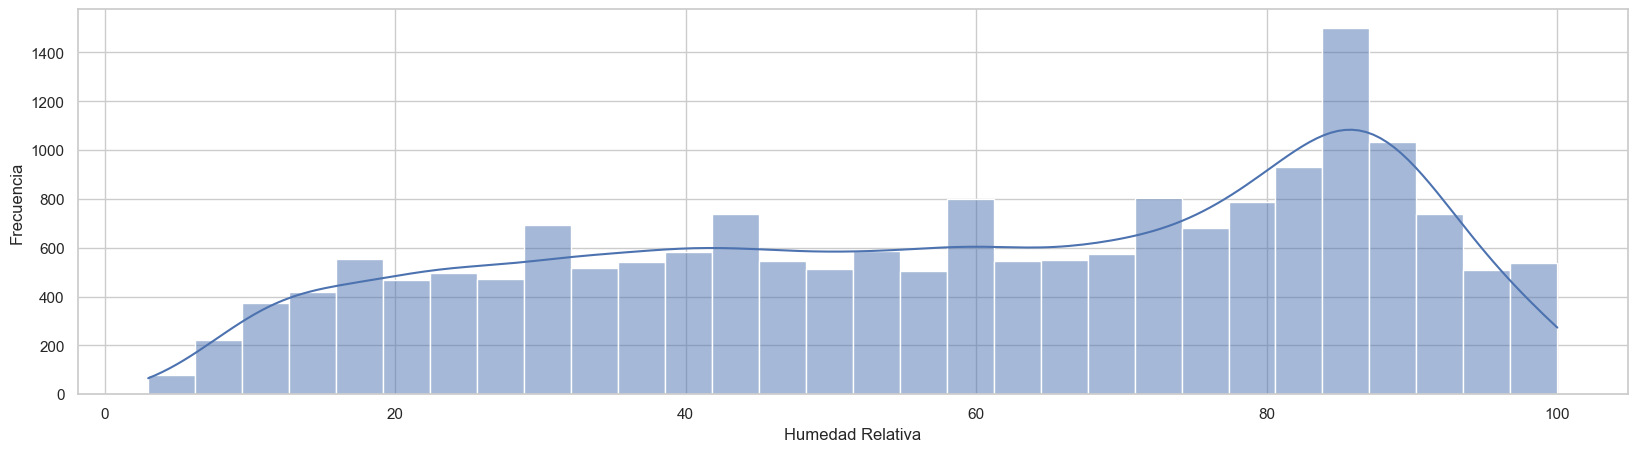

In [145]:
EDA(13246, 13946, 'fltHumedadRelativa', 'Humedad Relativa', True)

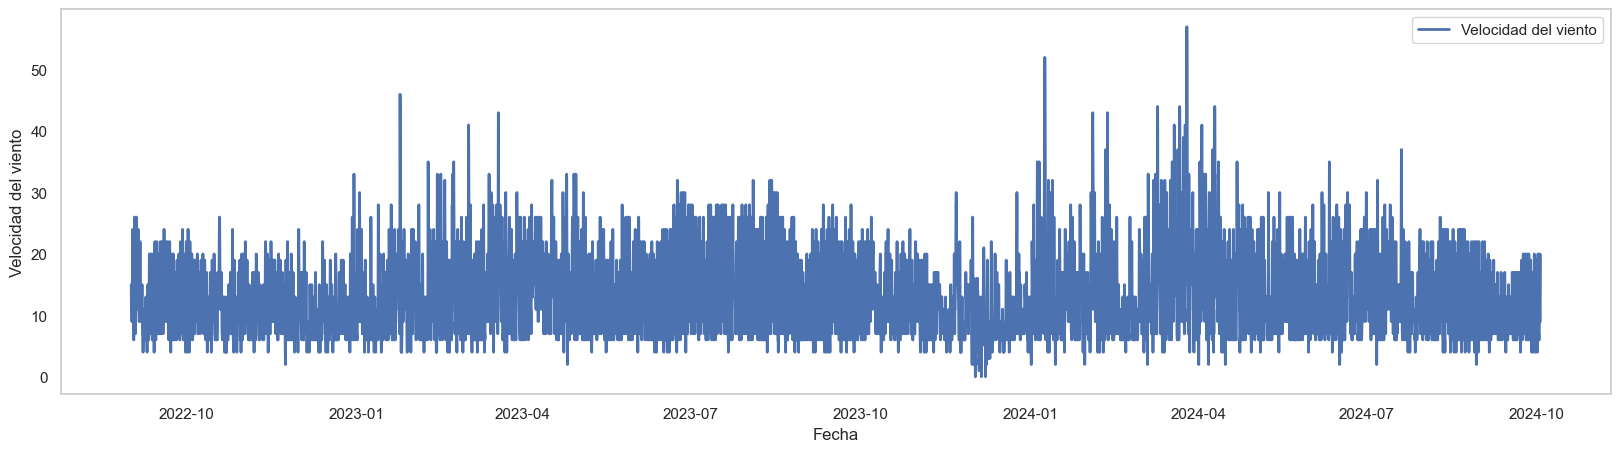

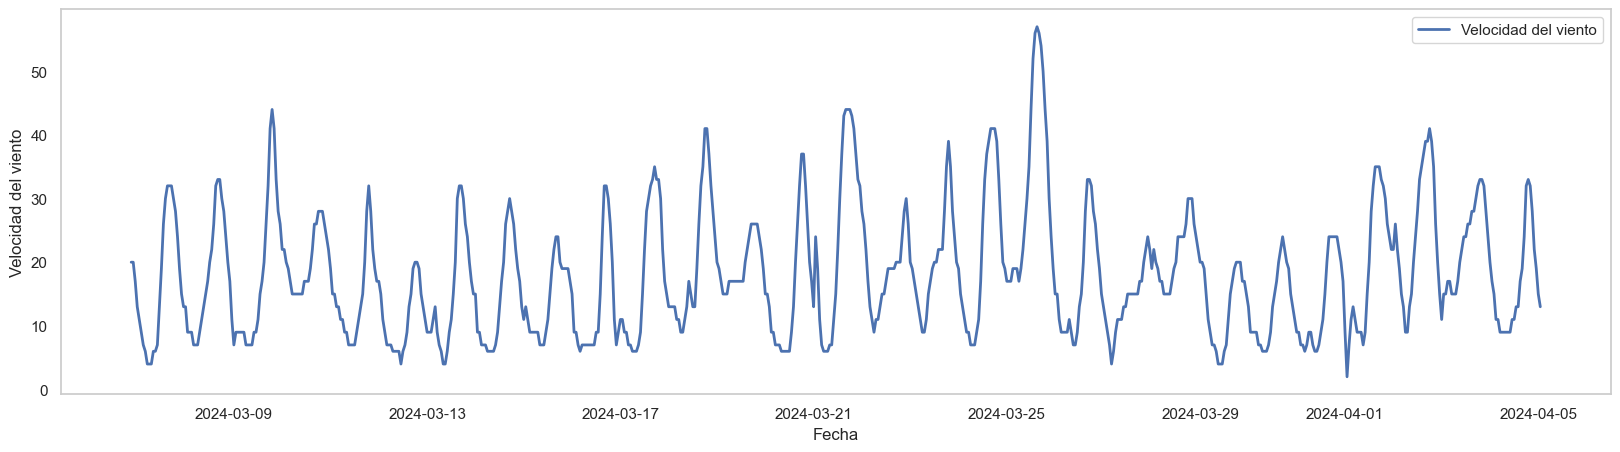

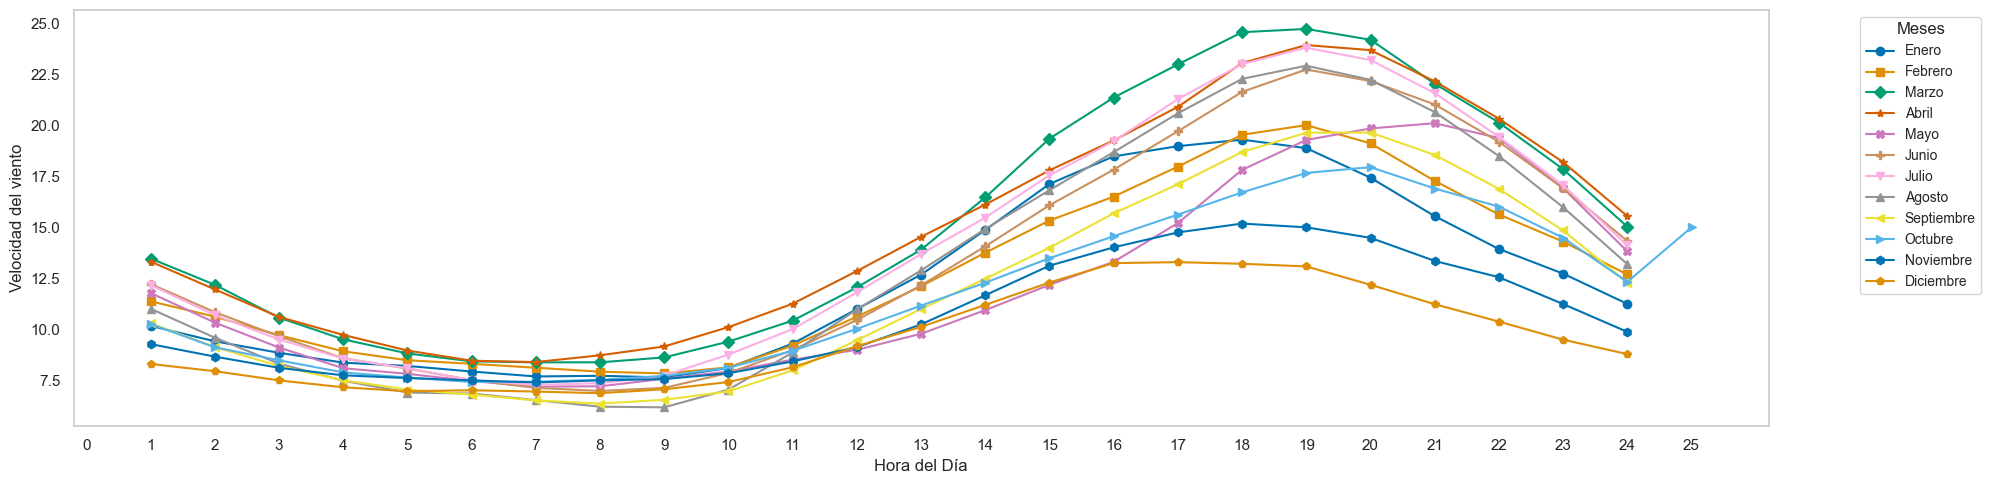

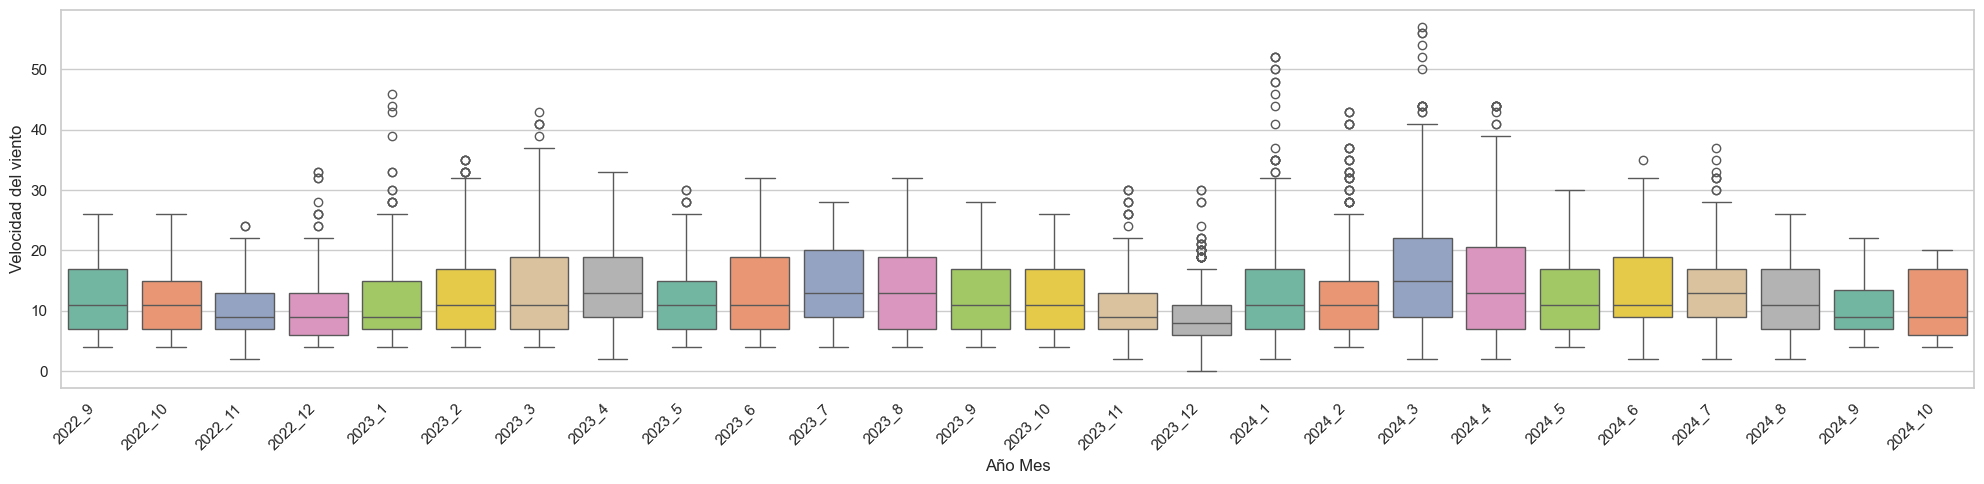

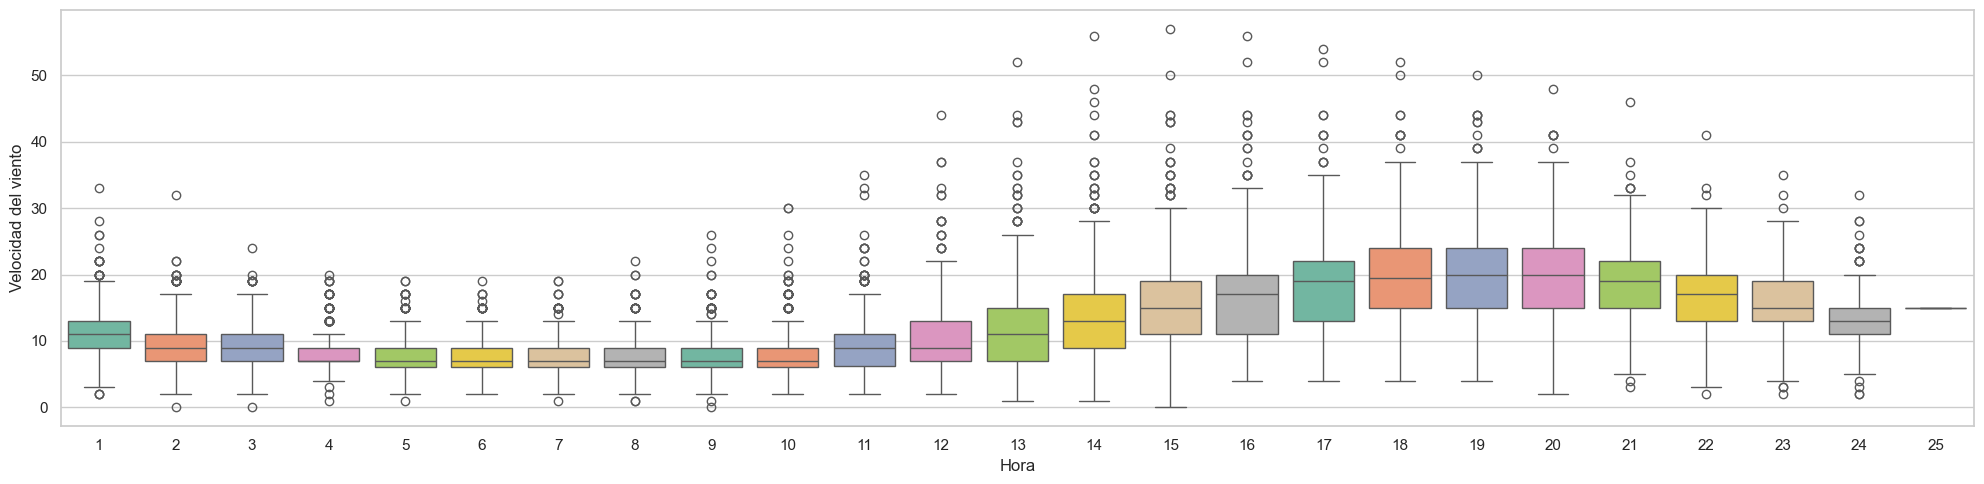

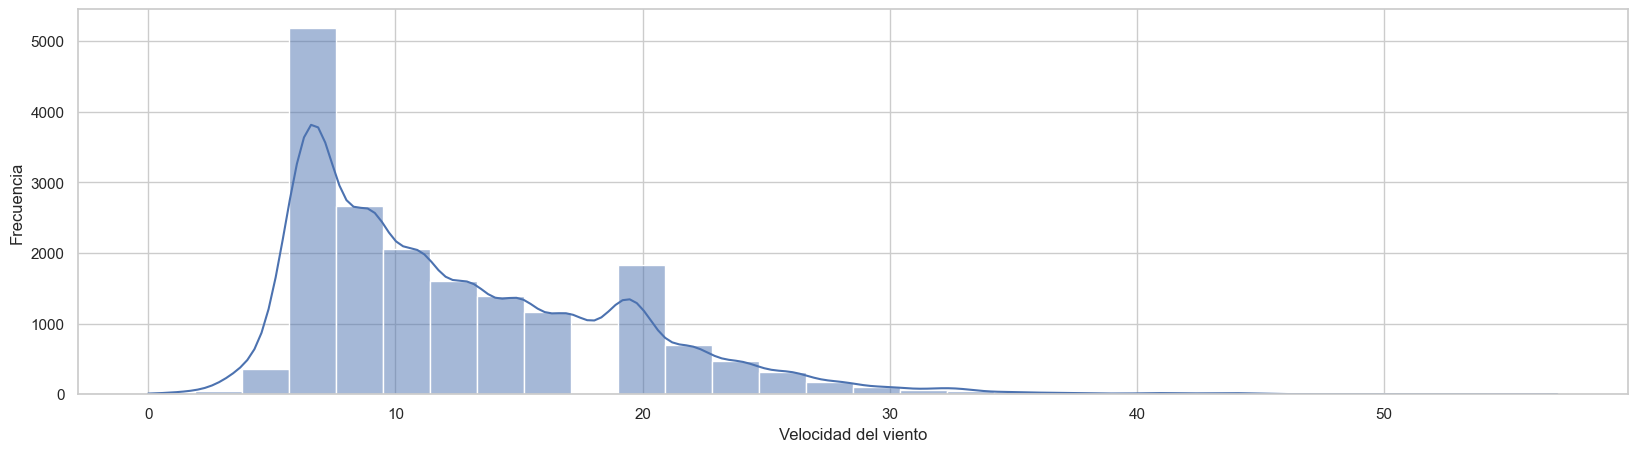

In [146]:
EDA(13246, 13946, 'fltVelocidadViento', 'Velocidad del viento', True)

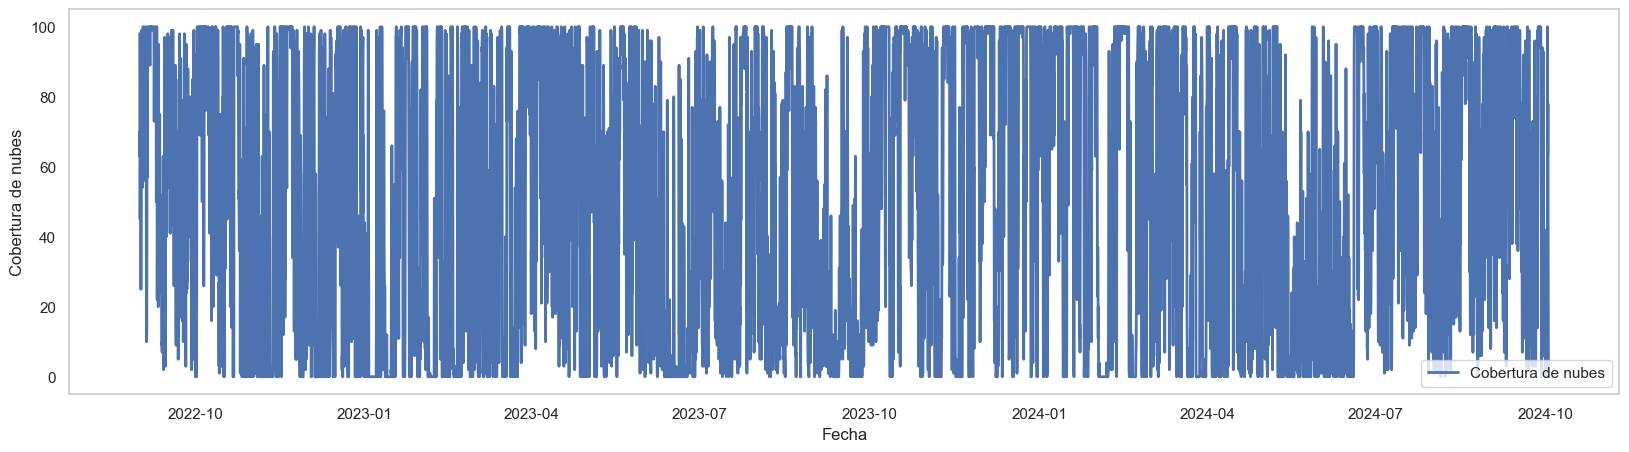

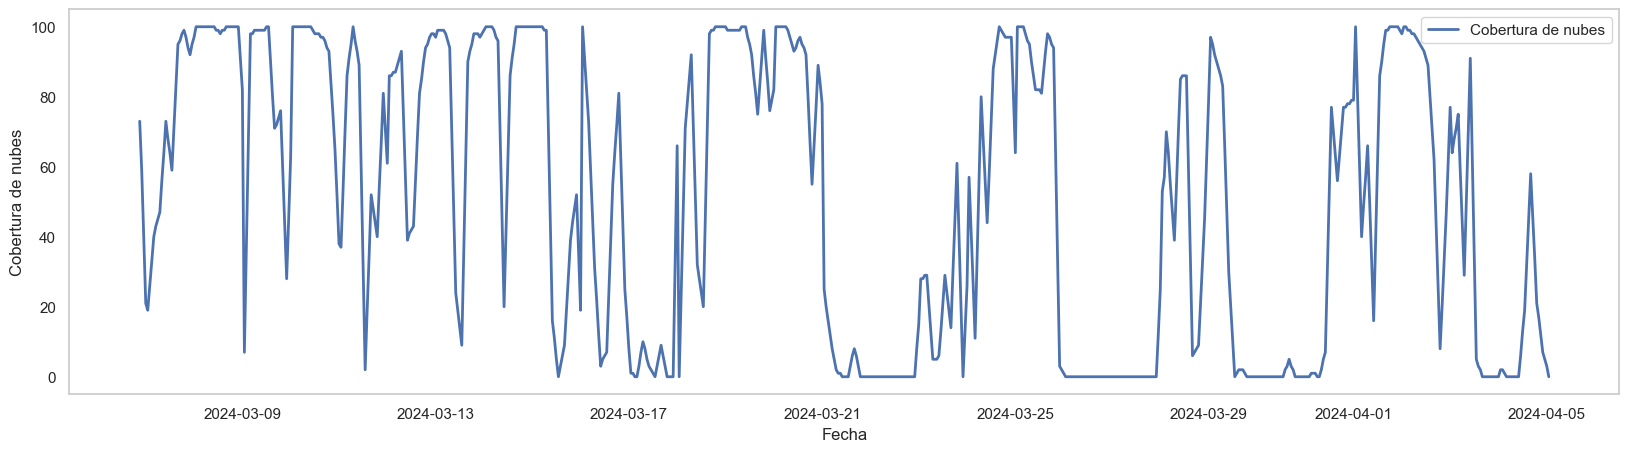

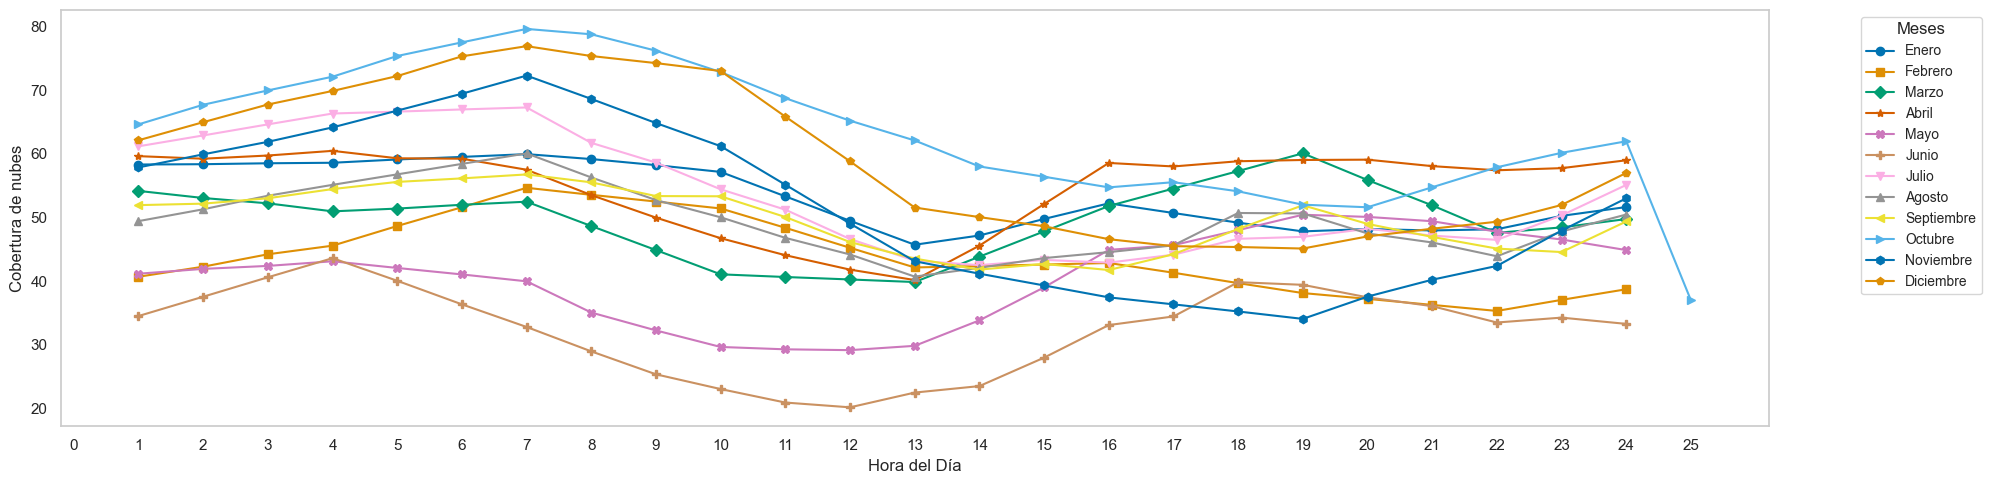

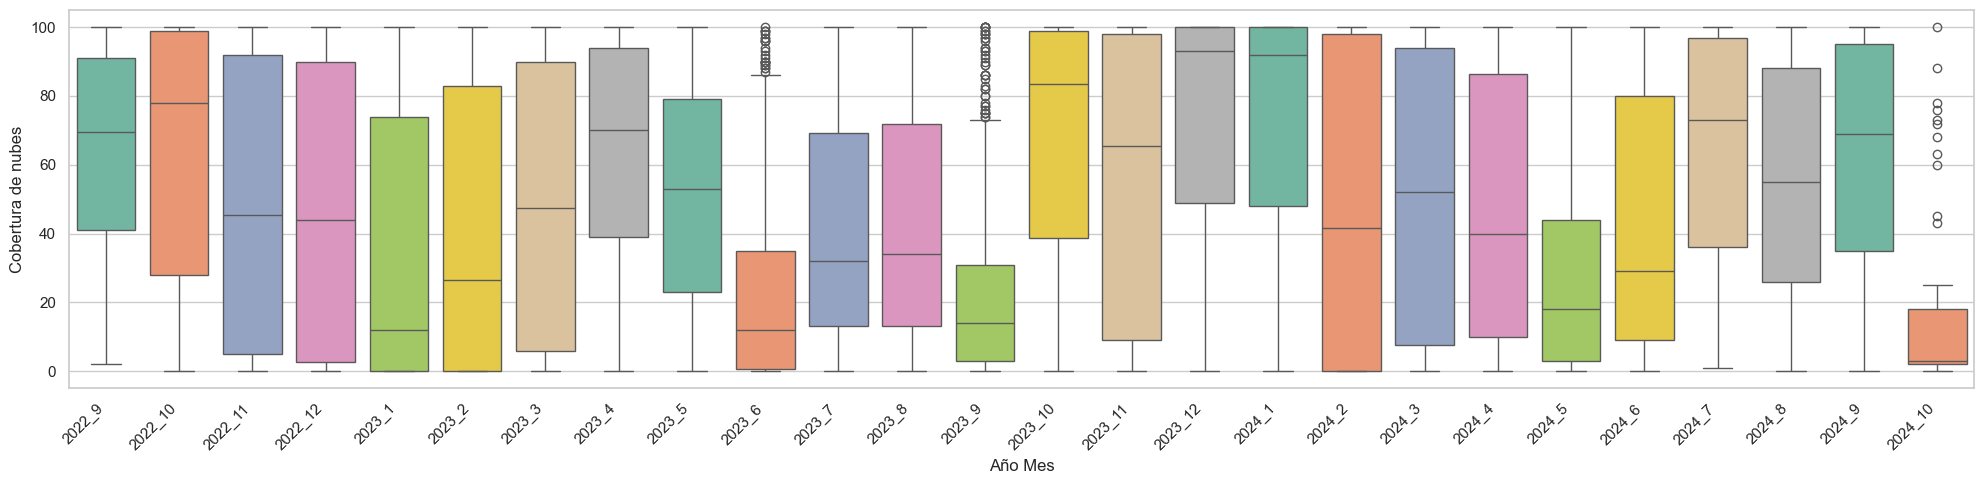

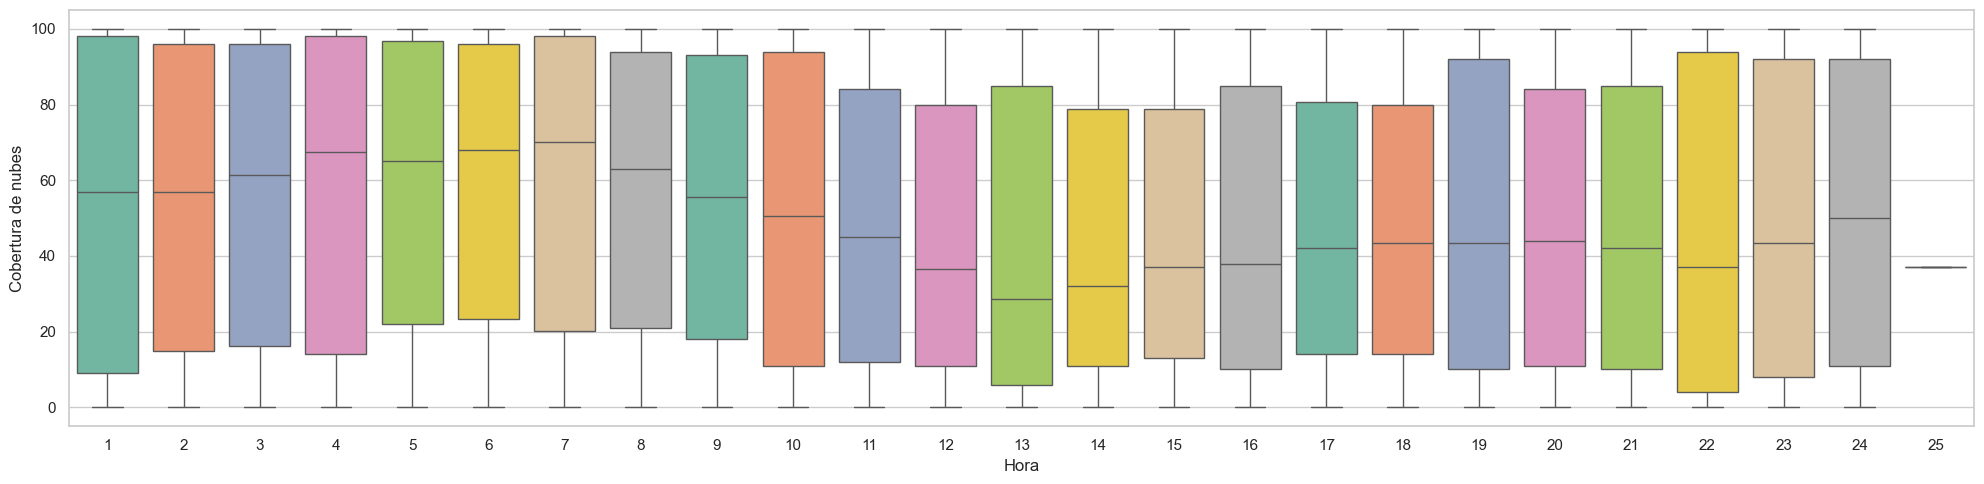

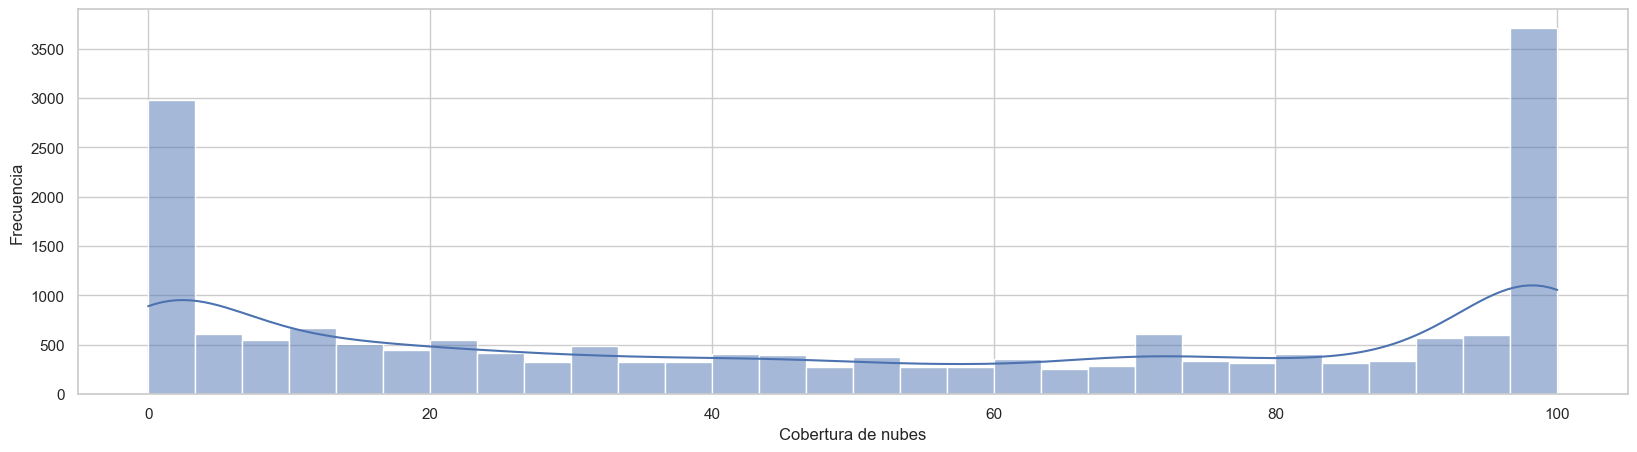

In [147]:
EDA(13246, 13946, 'fltCoberturaNubes', 'Cobertura de nubes', True)

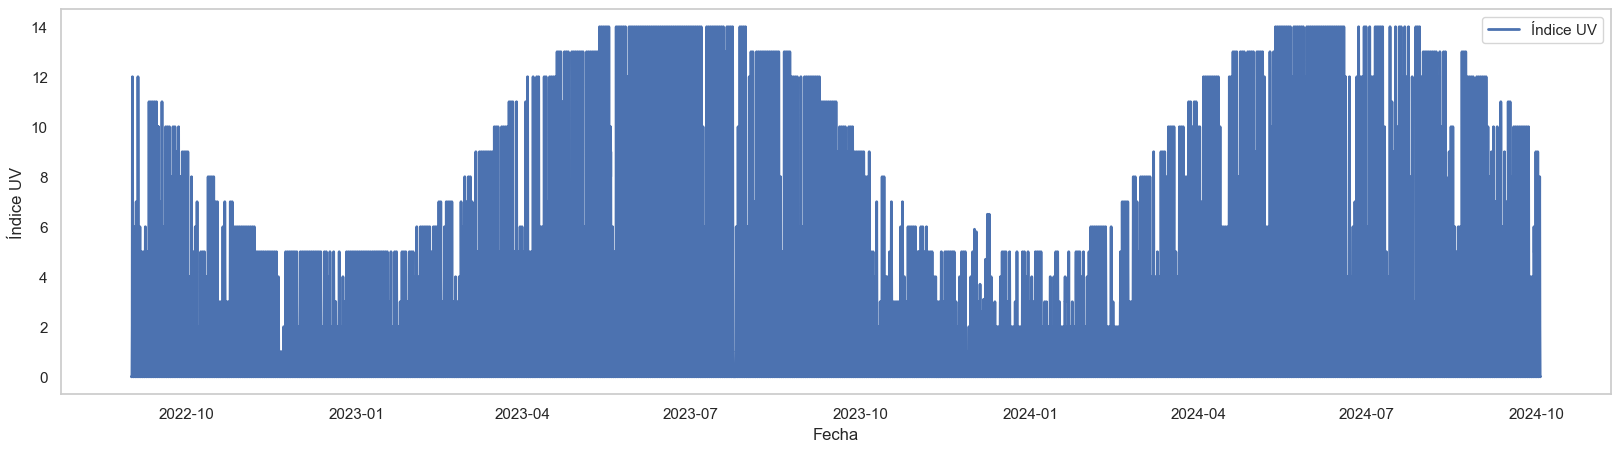

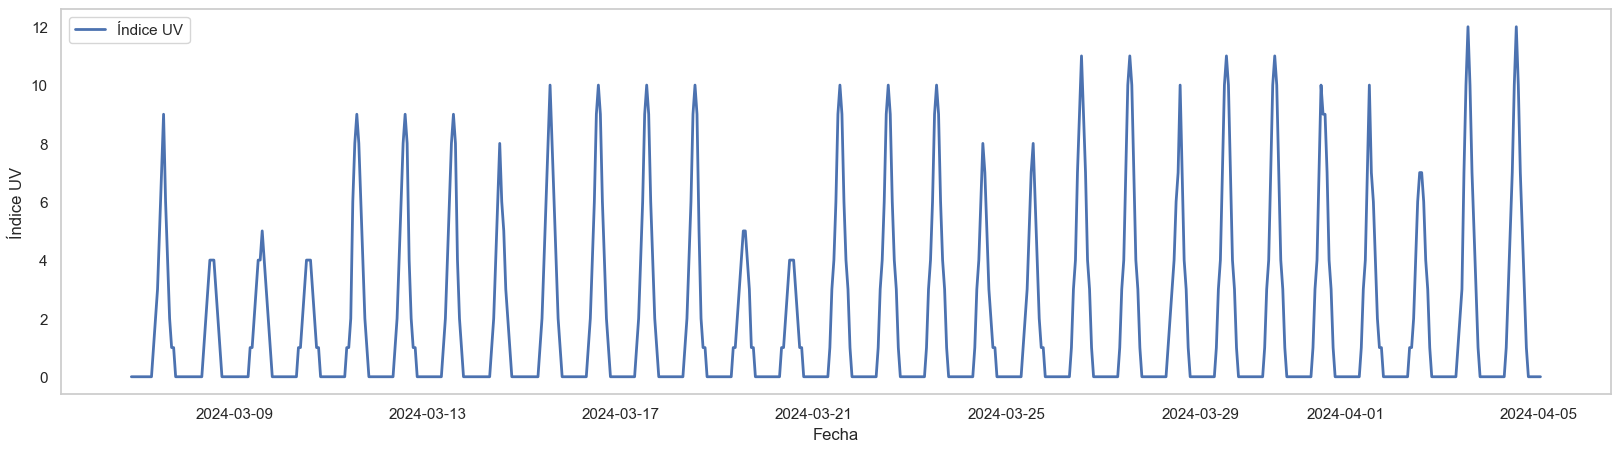

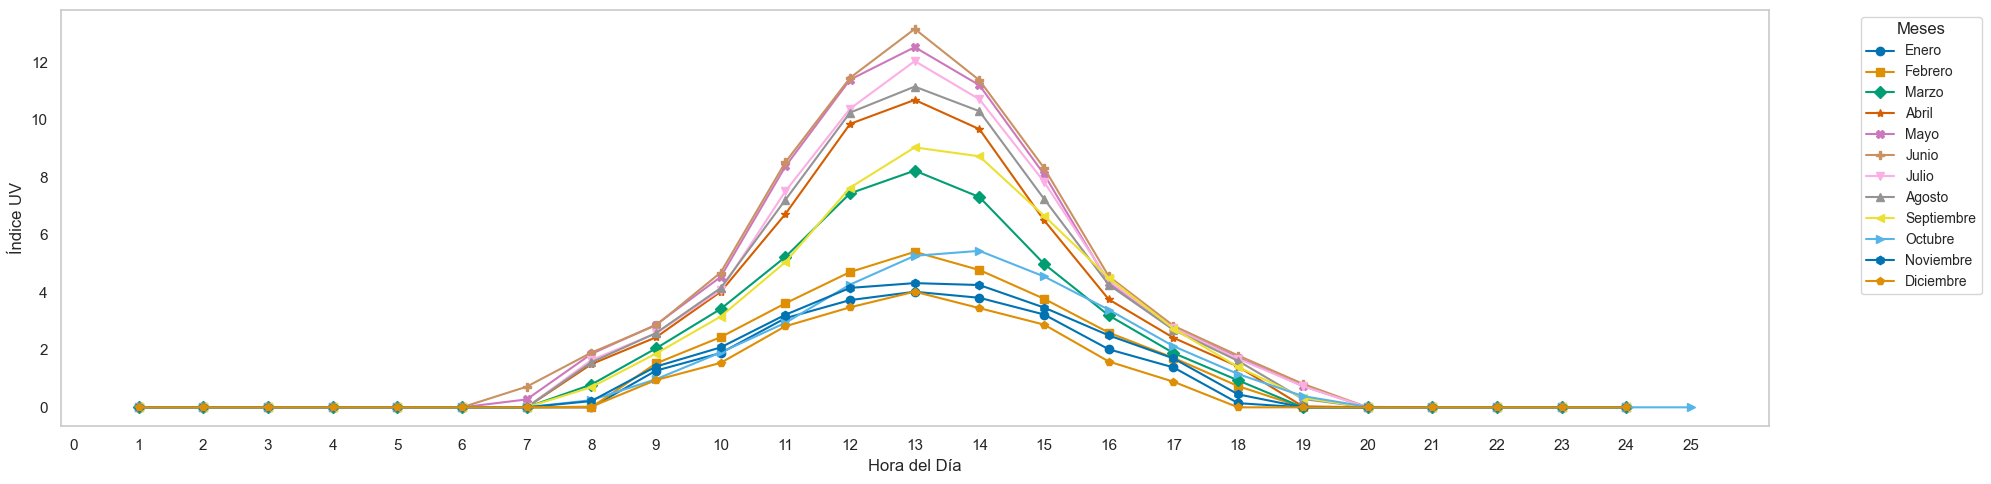

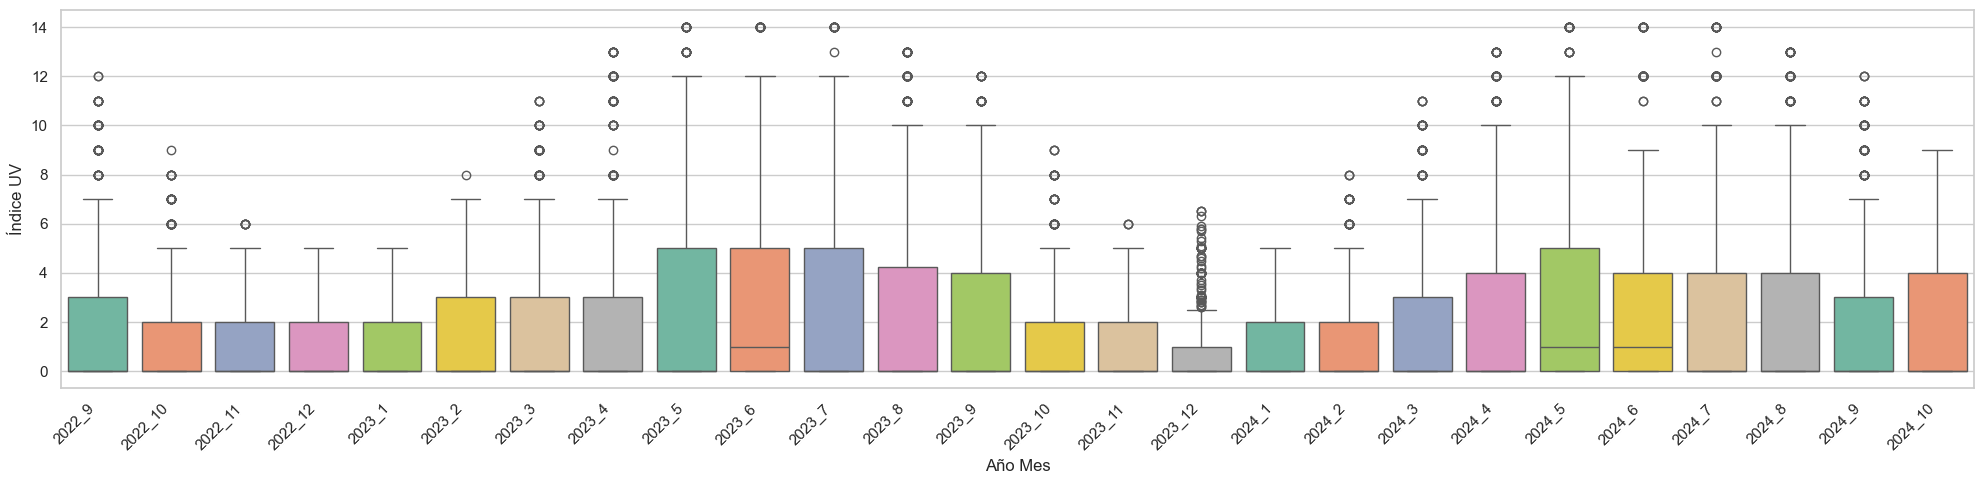

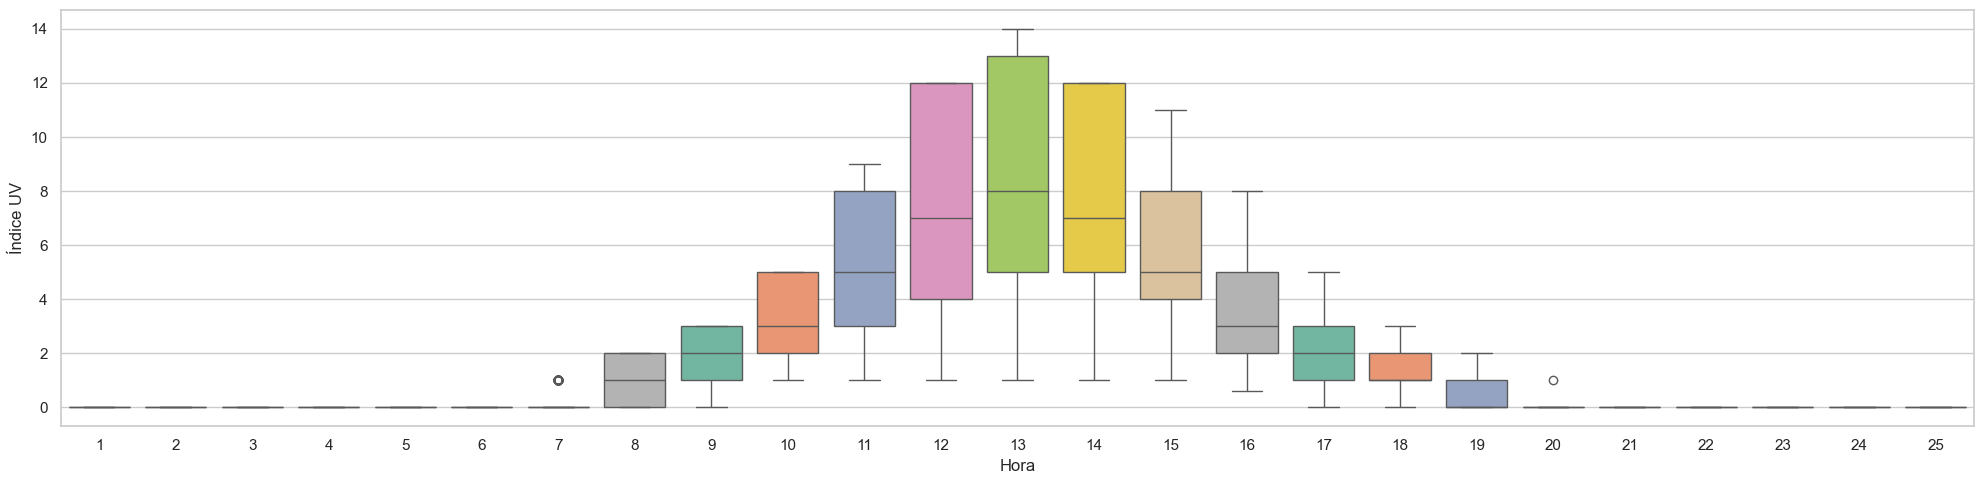

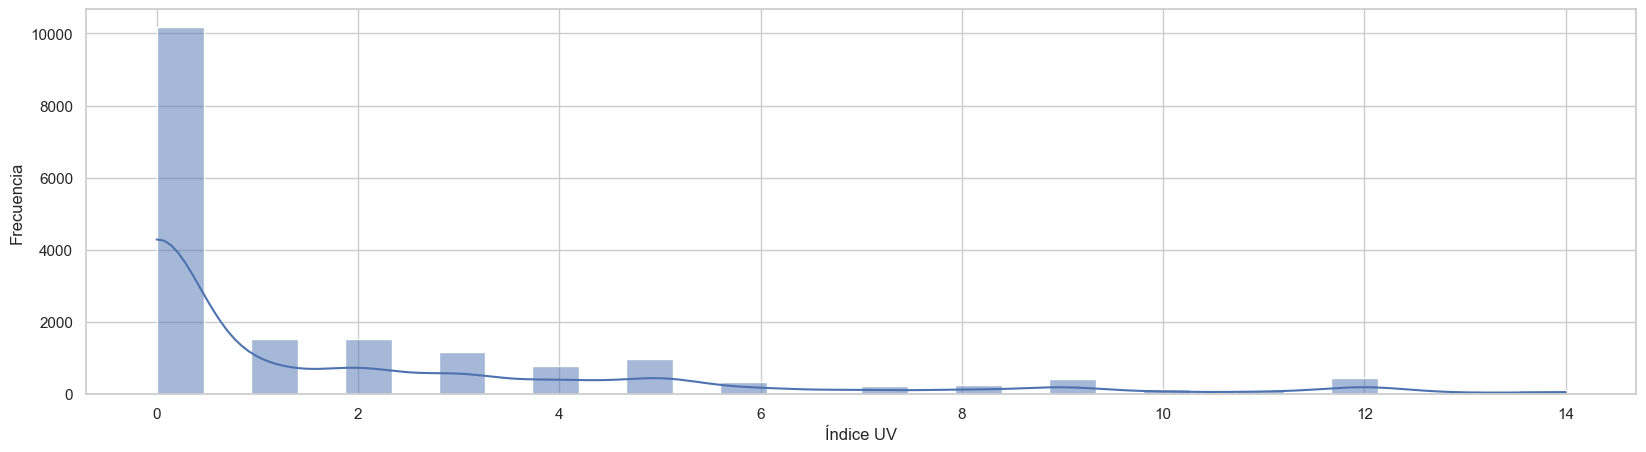

In [148]:
EDA(13246, 13946, 'fltIndiceUV', 'Índice UV', True)

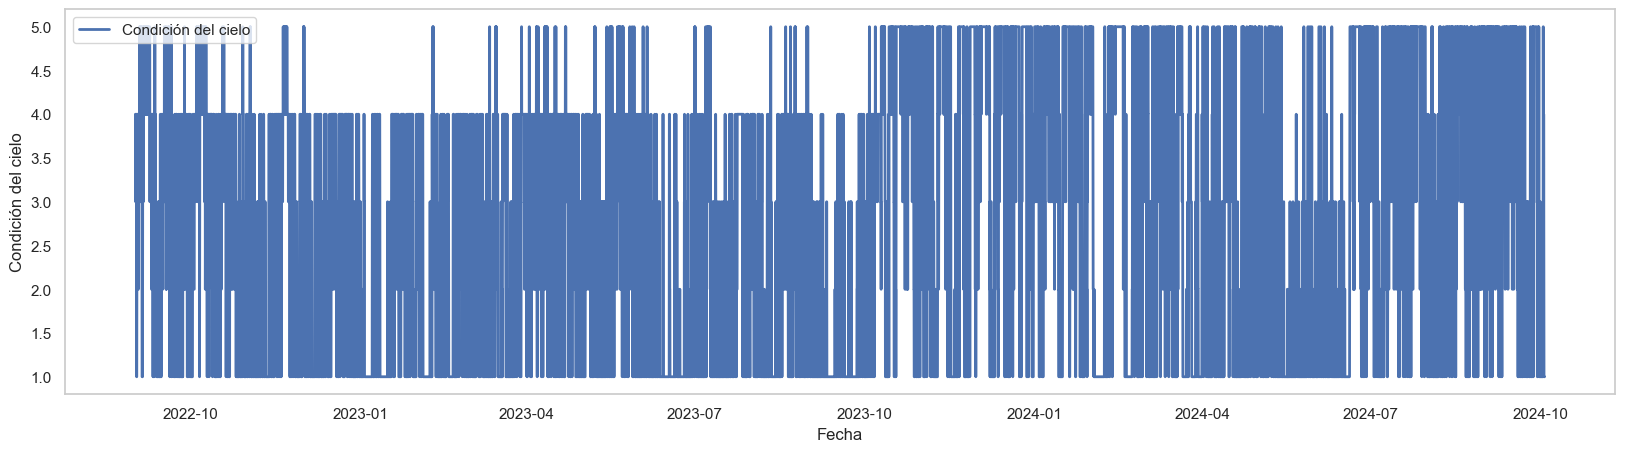

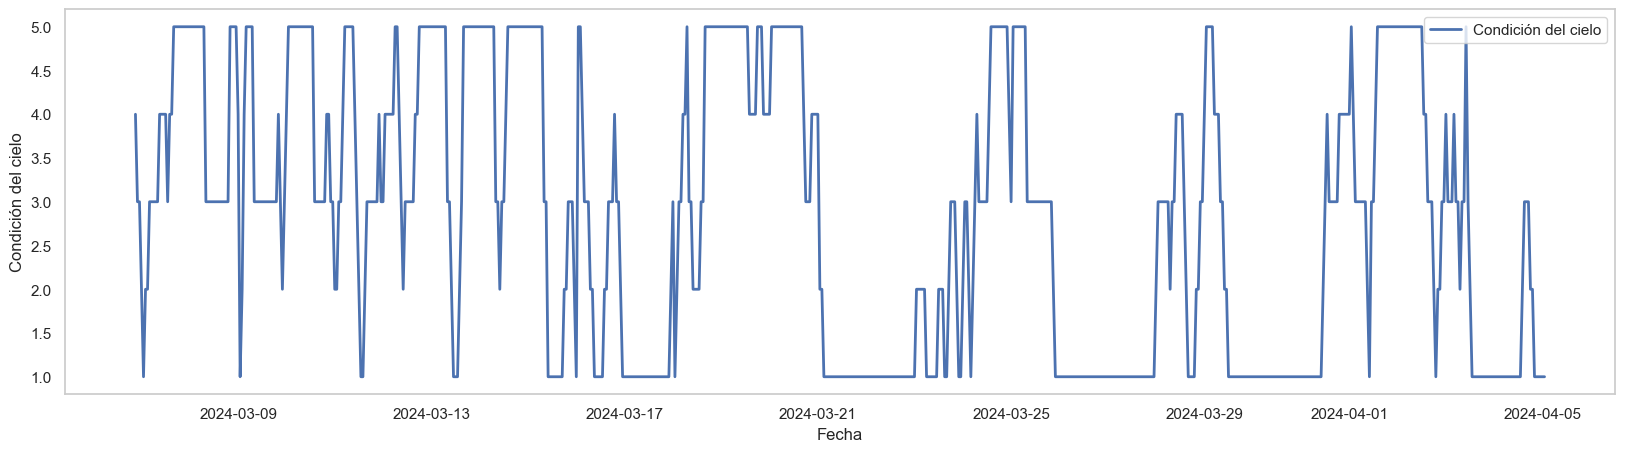

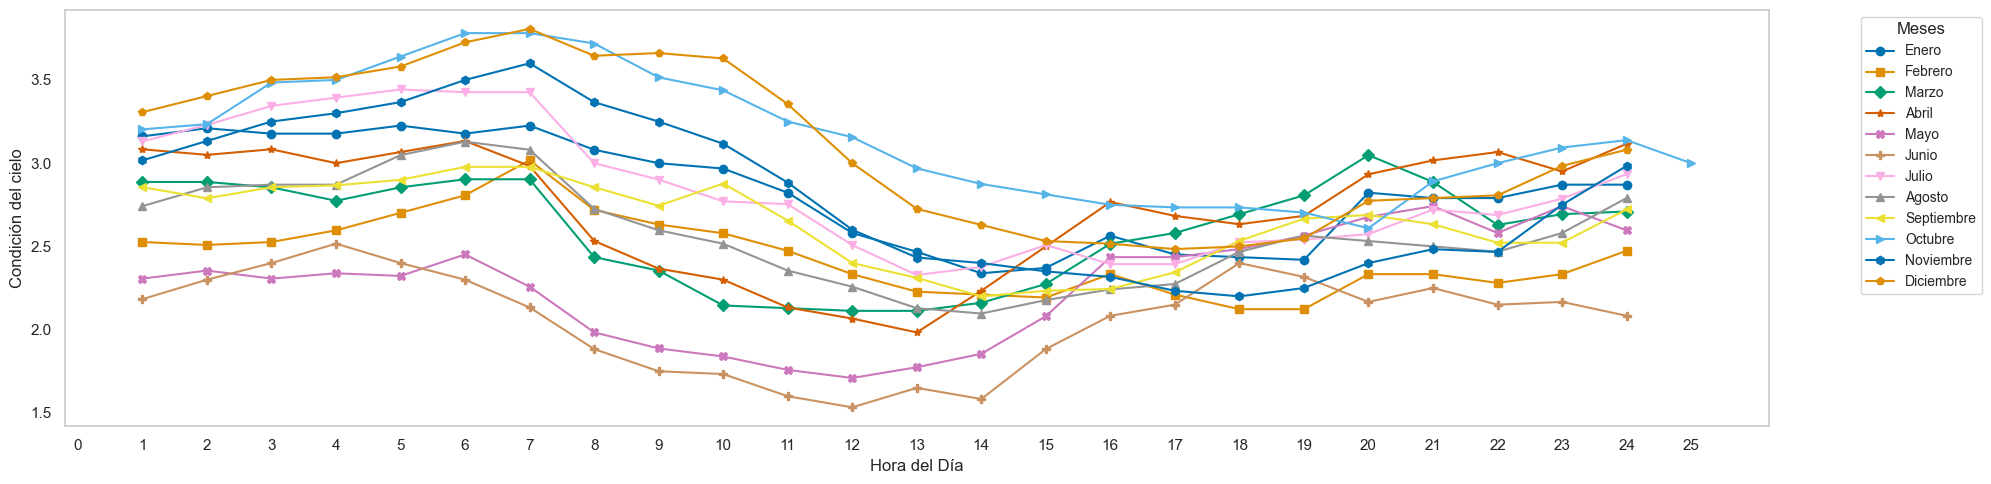

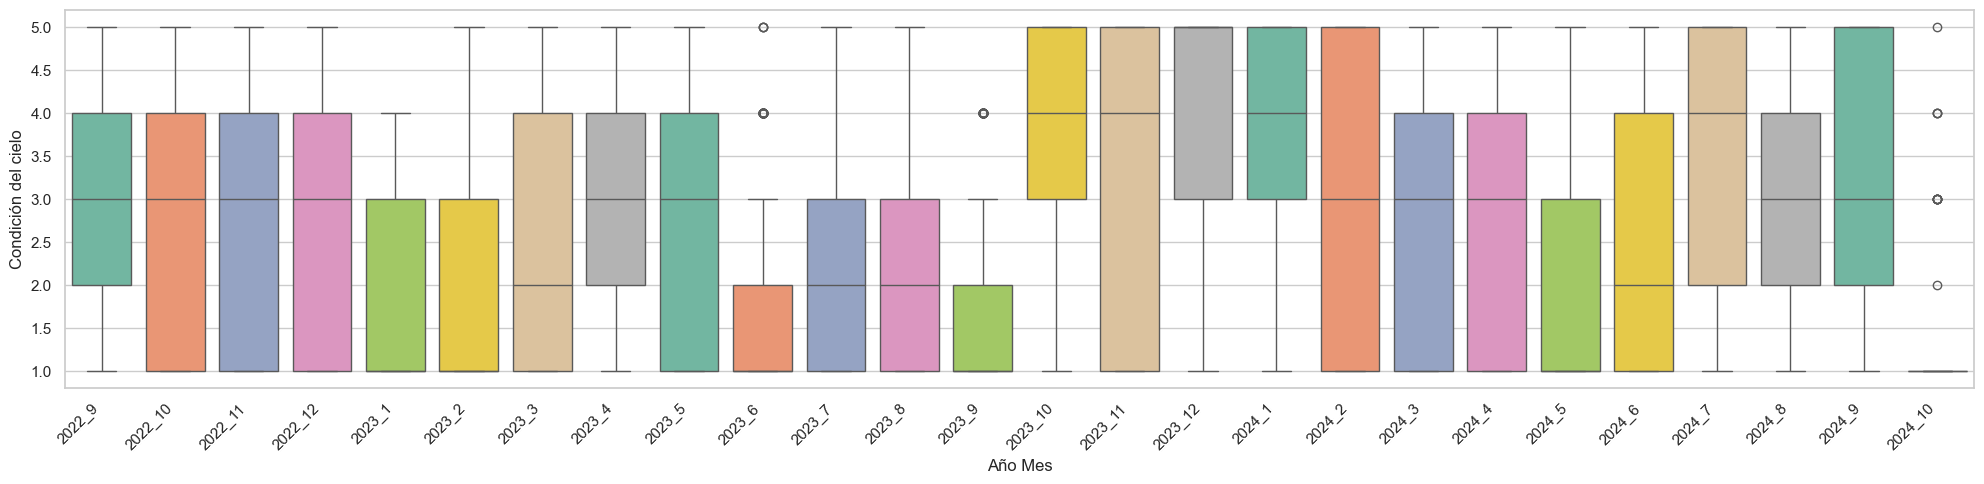

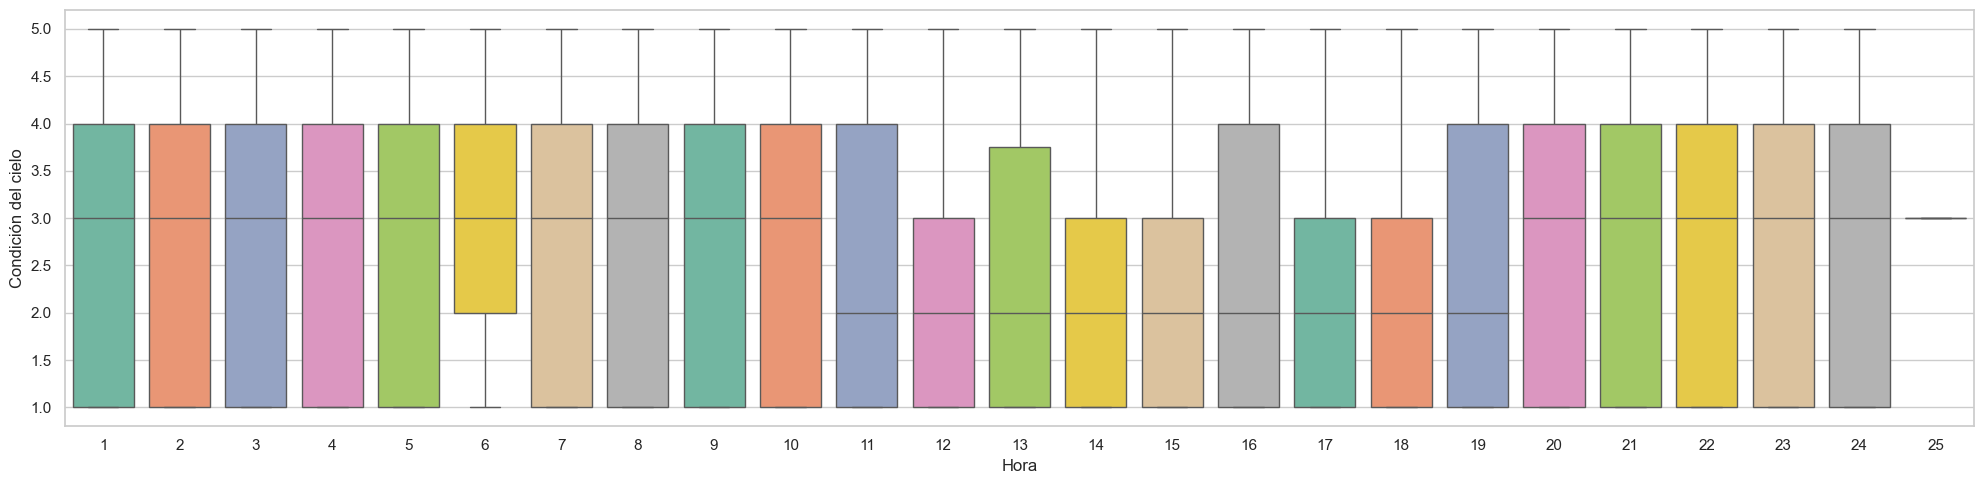

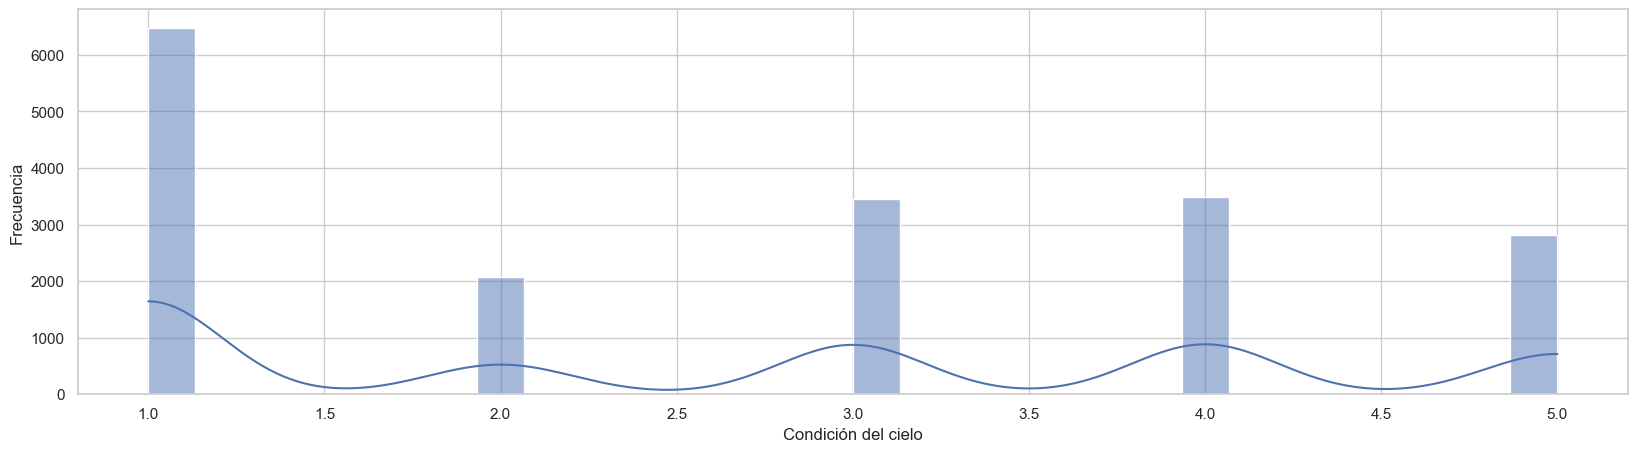

In [149]:
EDA(13246, 13946, 'iCodCondCielo', 'Condición del cielo', True)

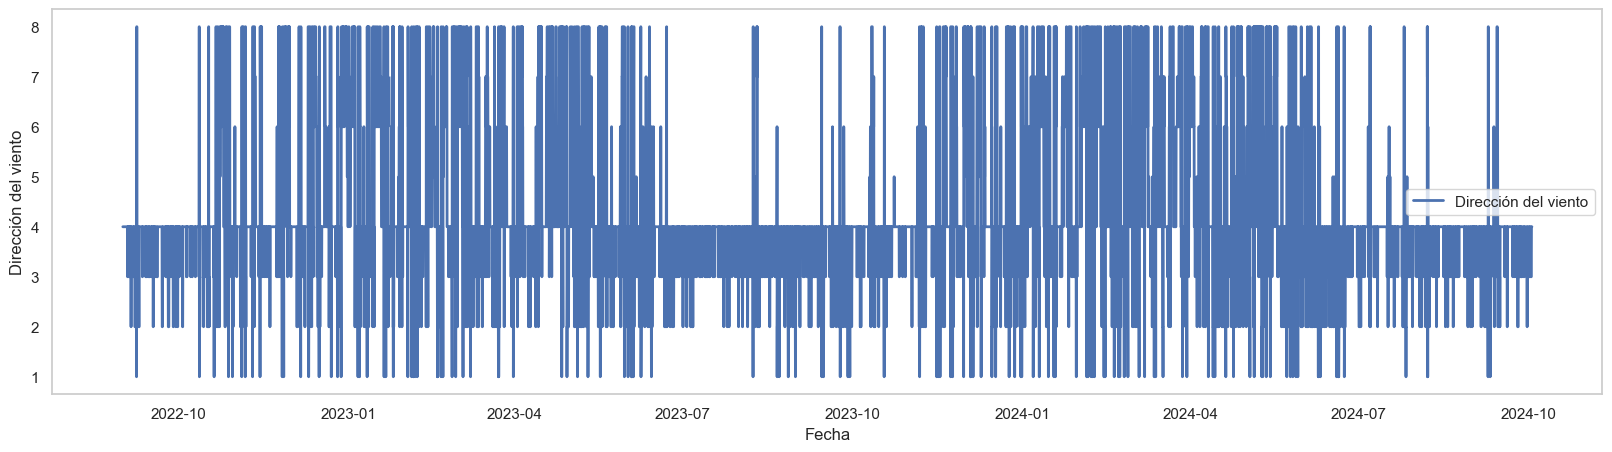

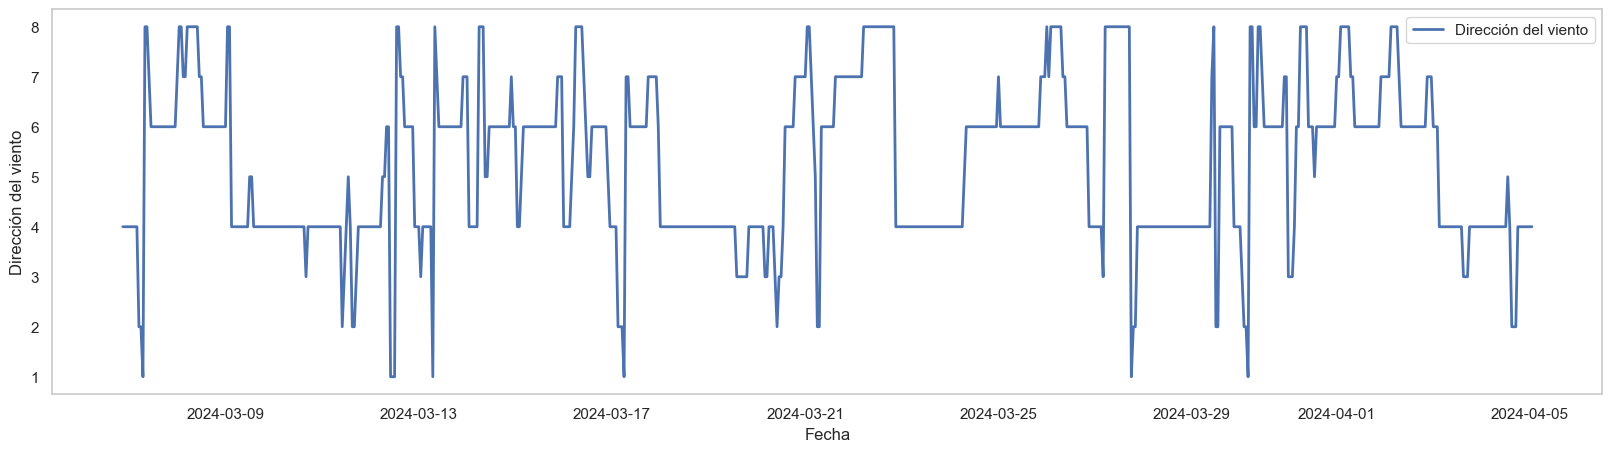

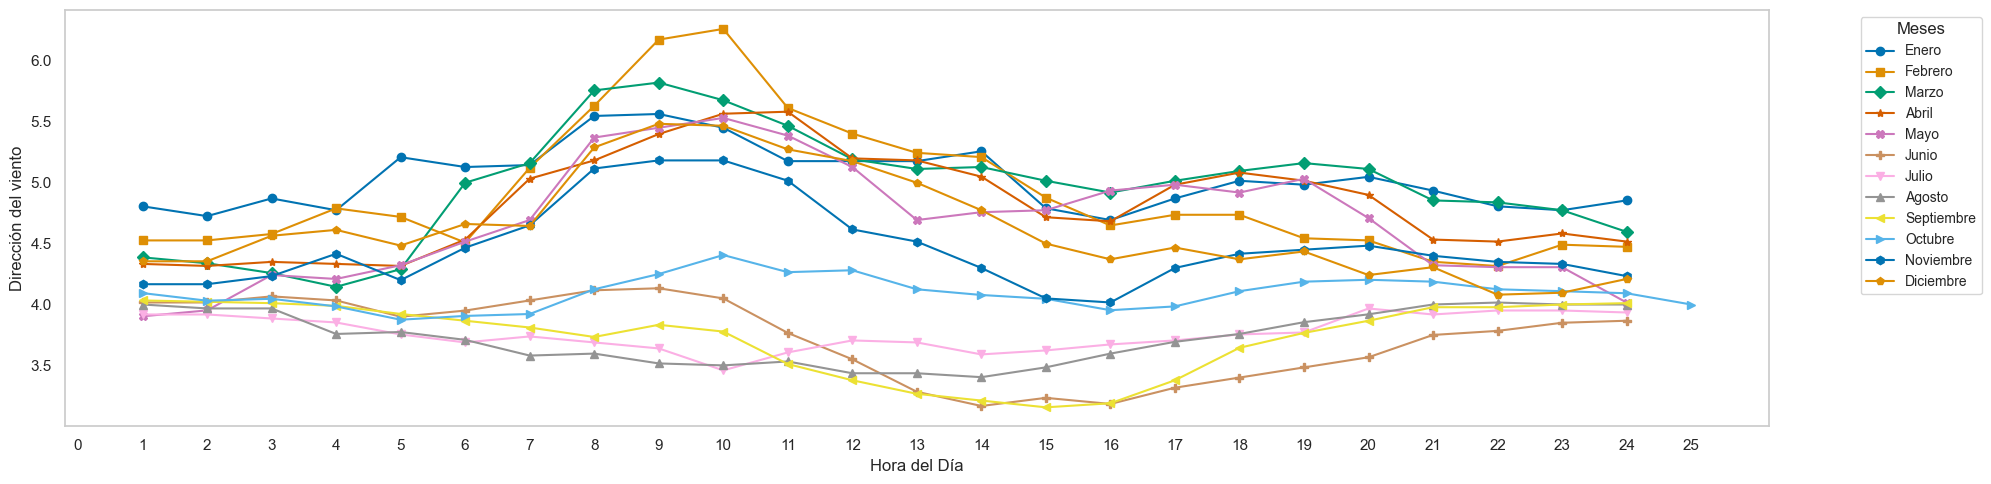

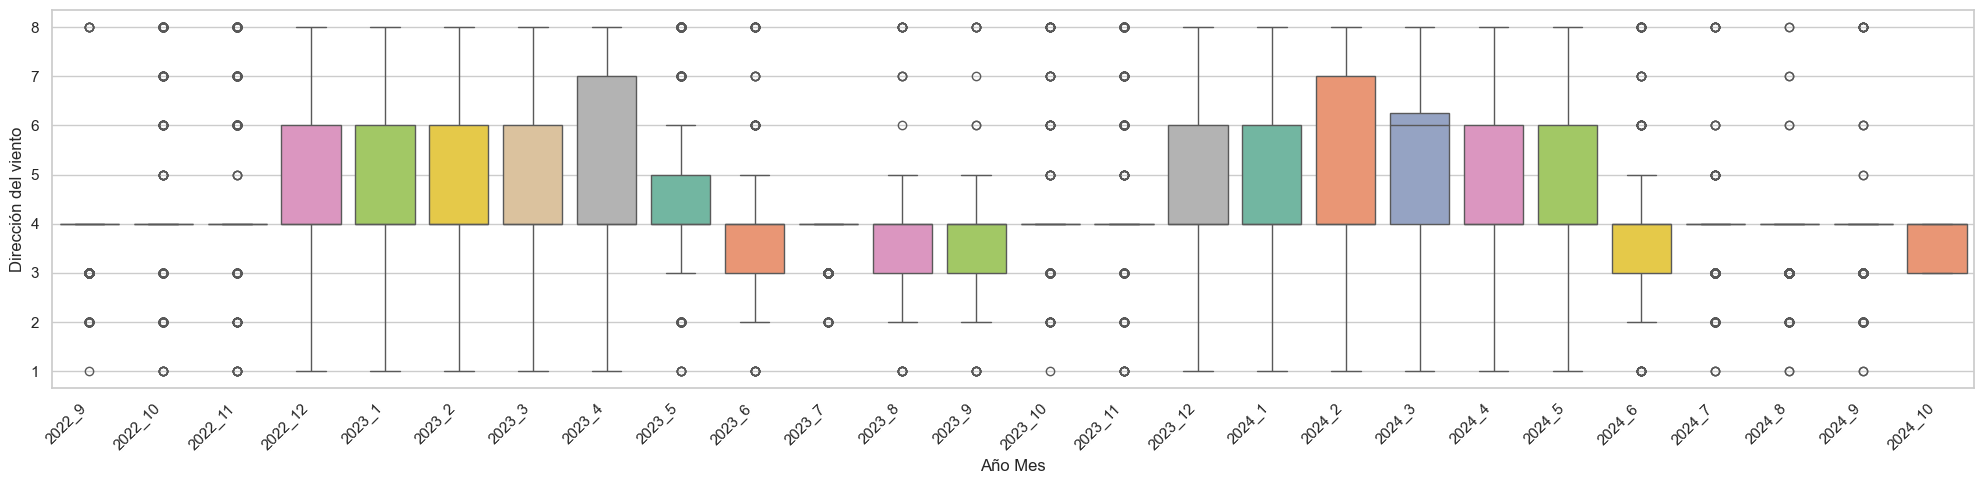

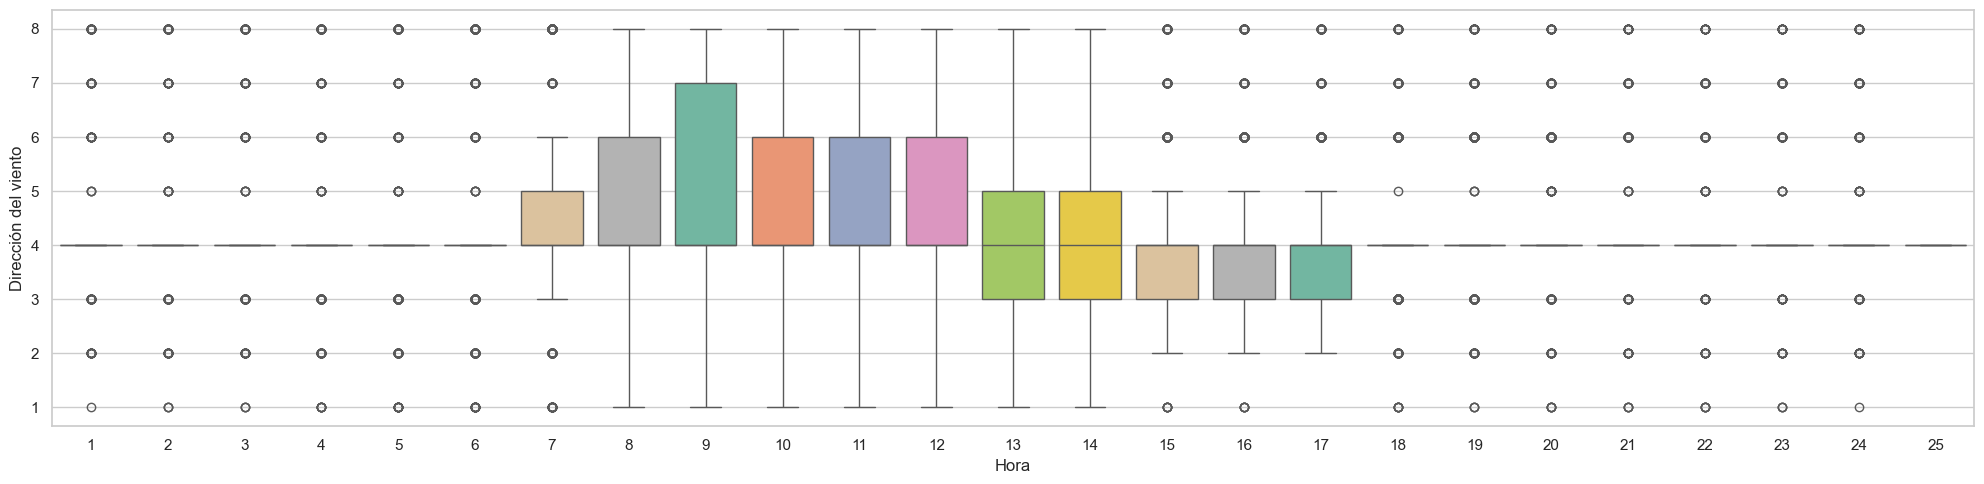

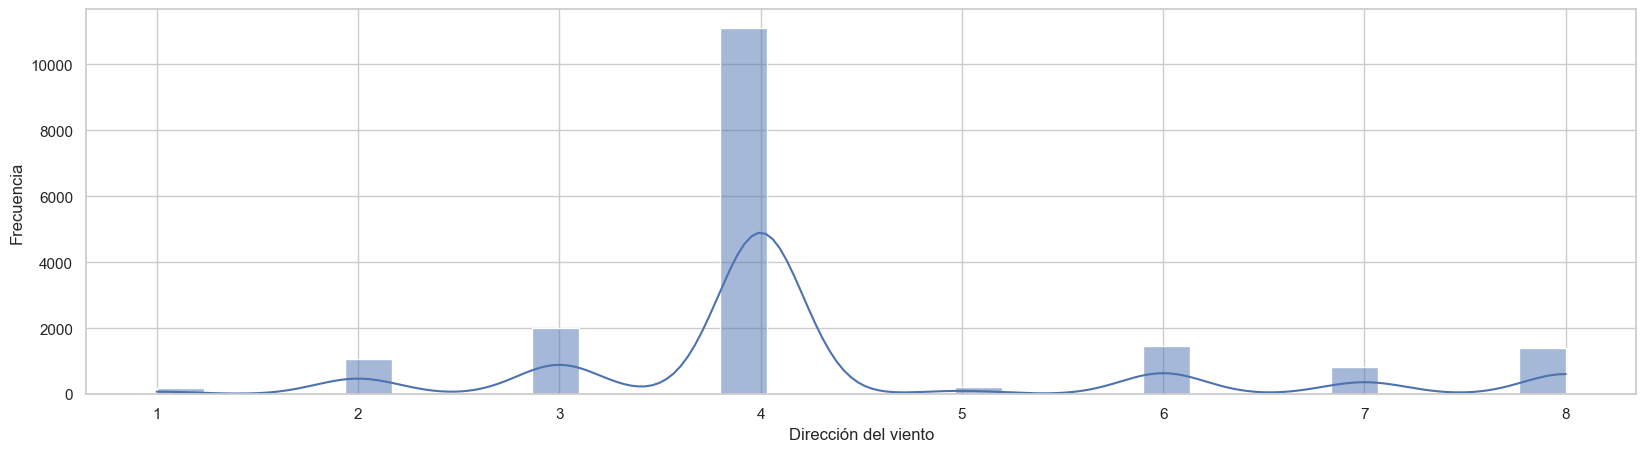

In [150]:
EDA(13246, 13946, 'iCodDirViento', 'Dirección del viento', True)

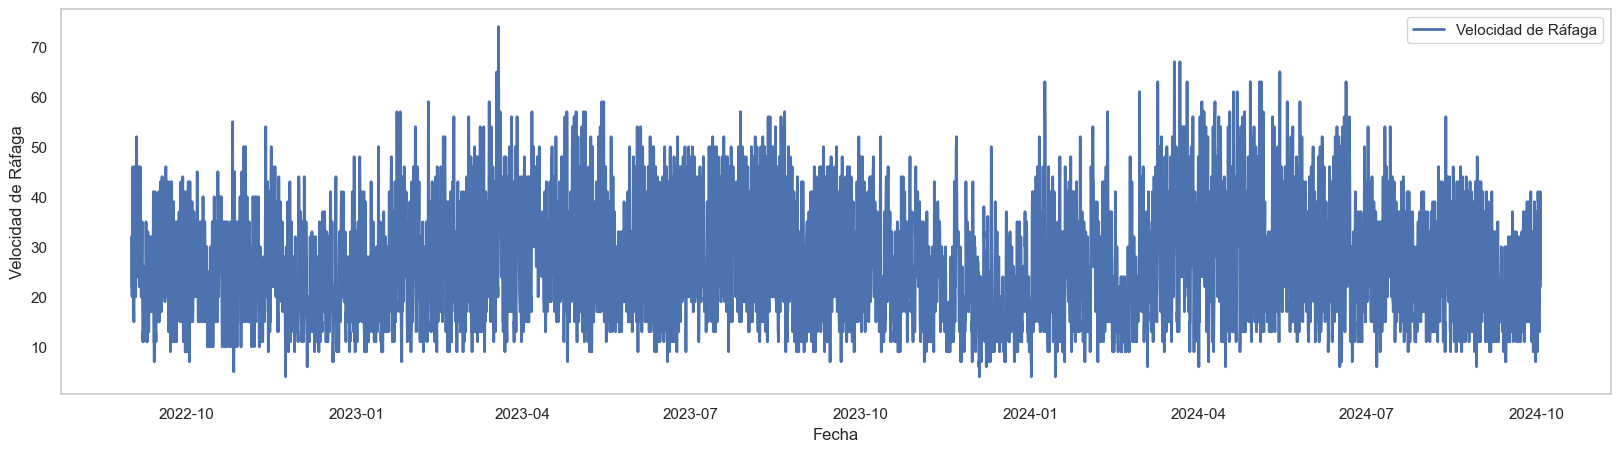

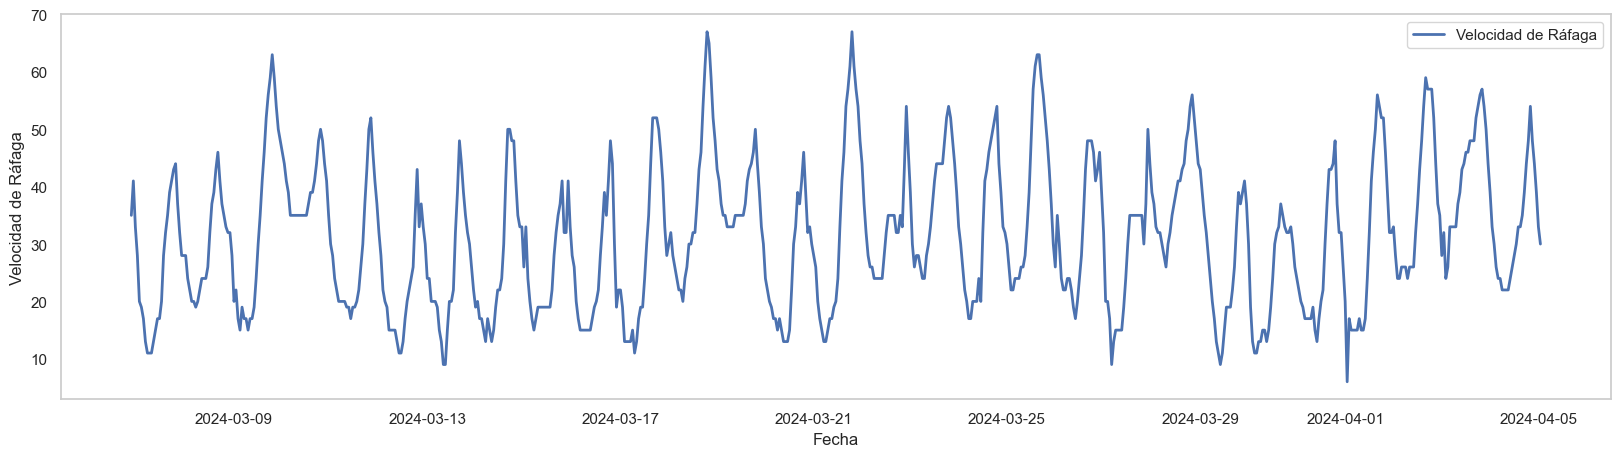

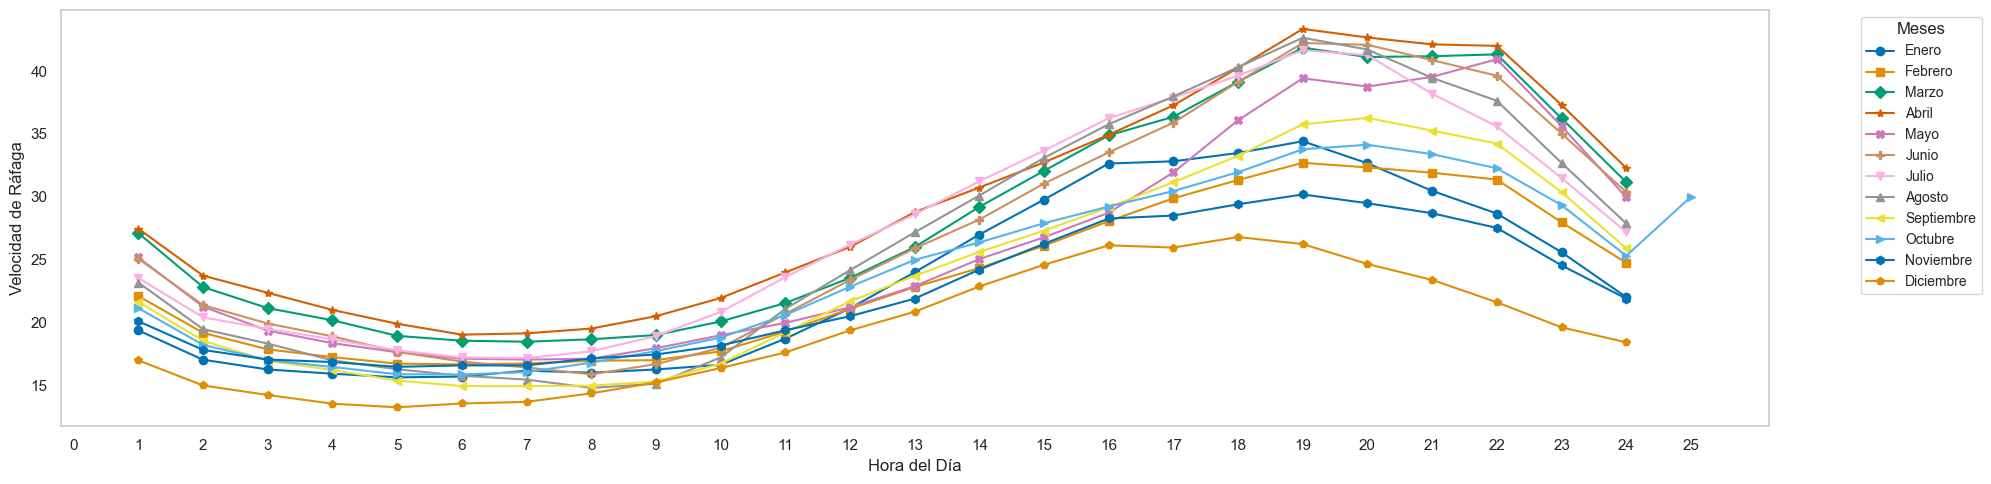

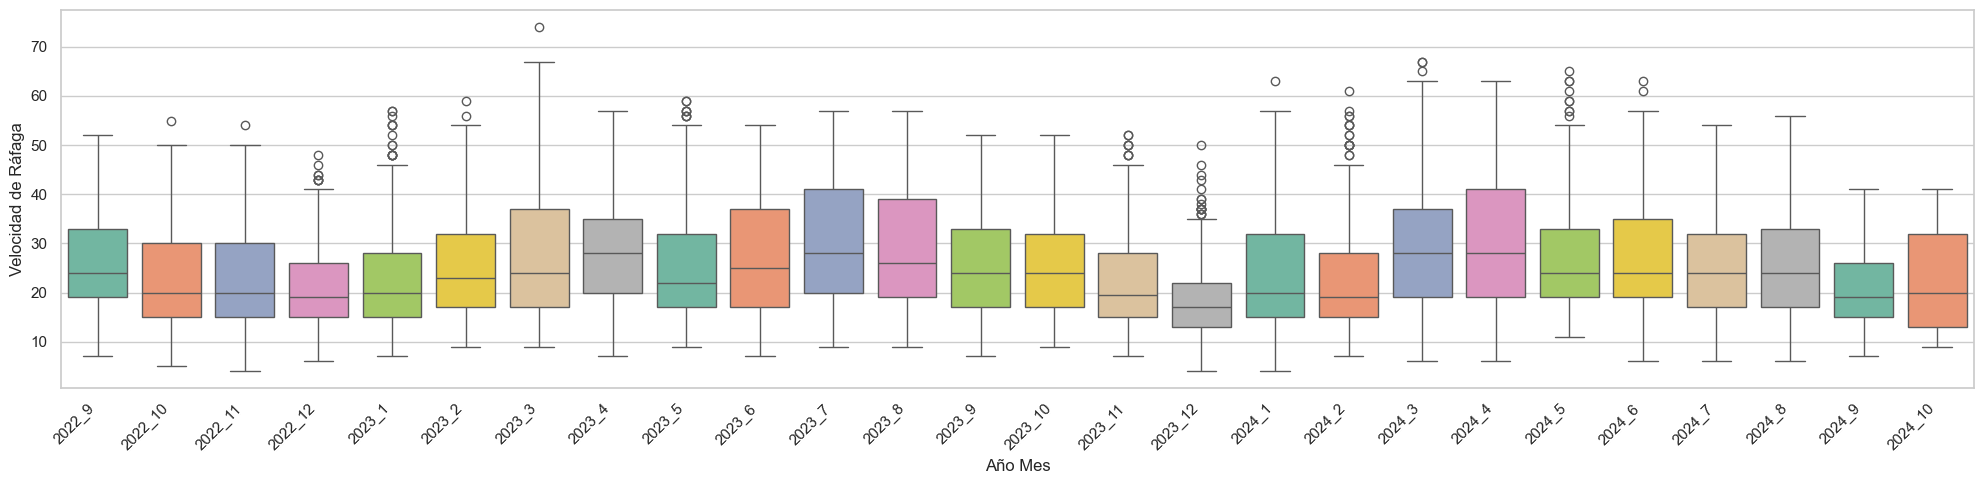

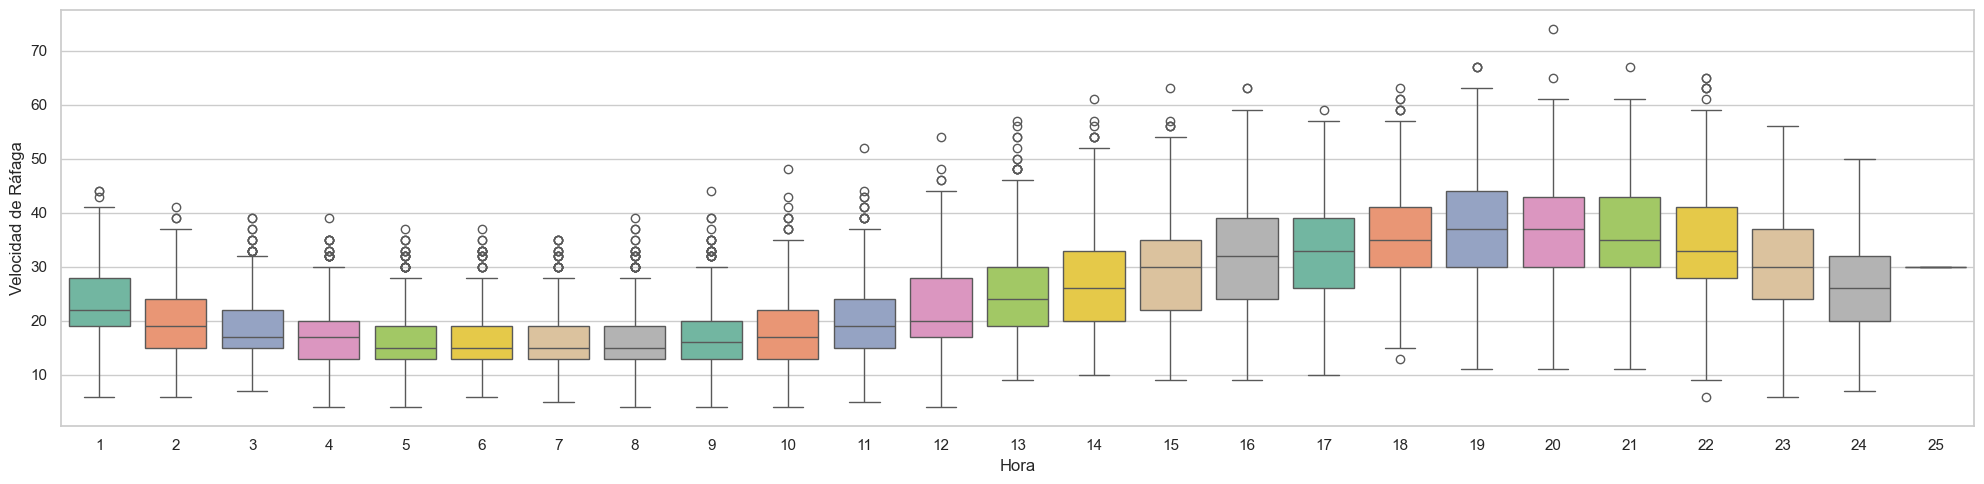

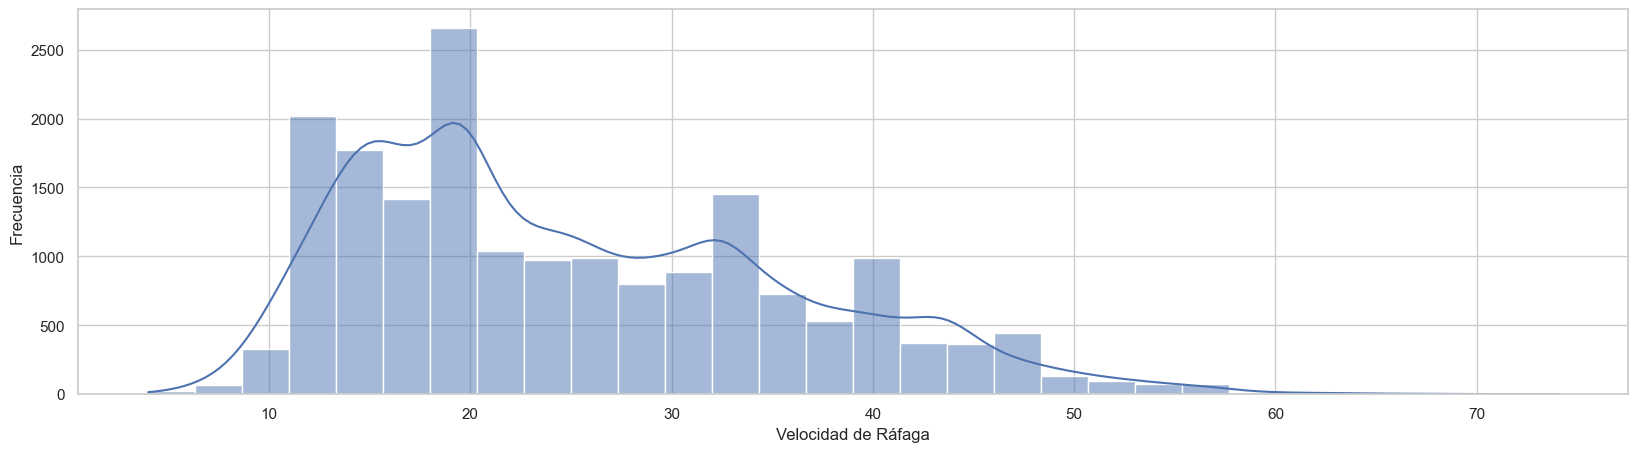

In [151]:
EDA(13246, 13946, 'fltVelocidadRafaga', 'Velocidad de Ráfaga', True)

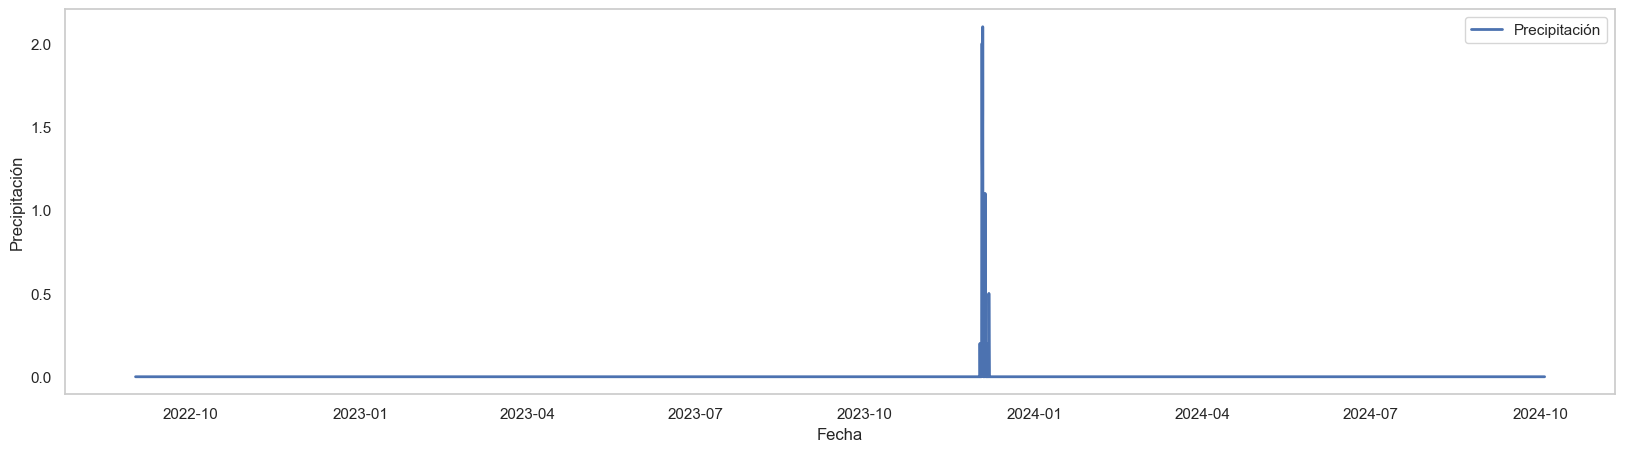

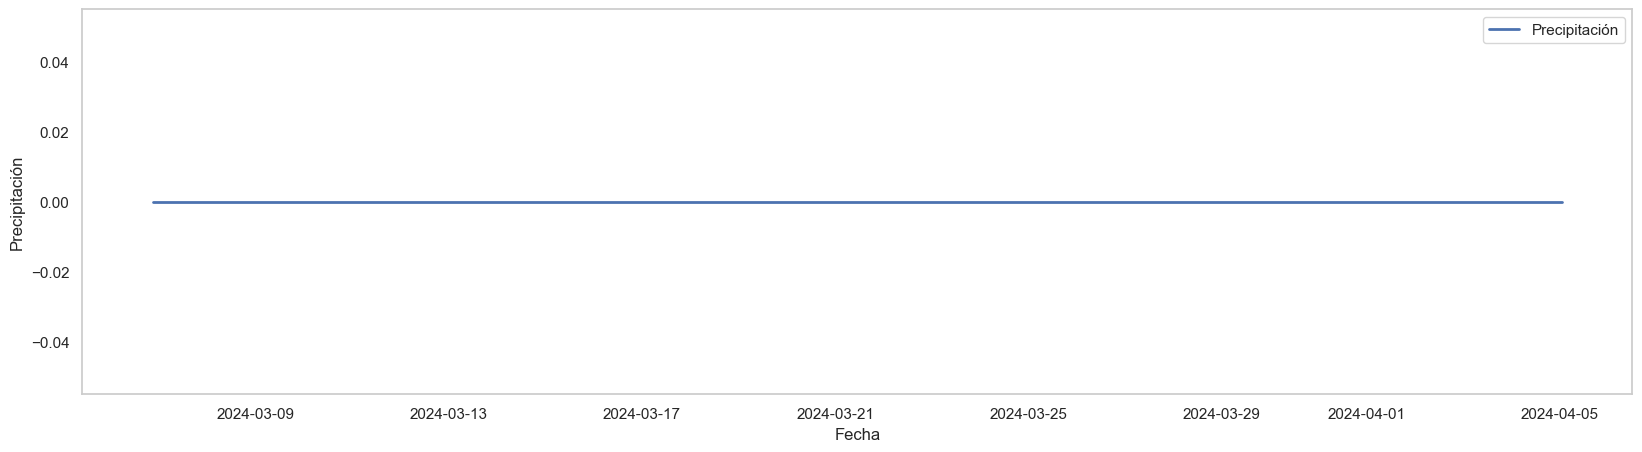

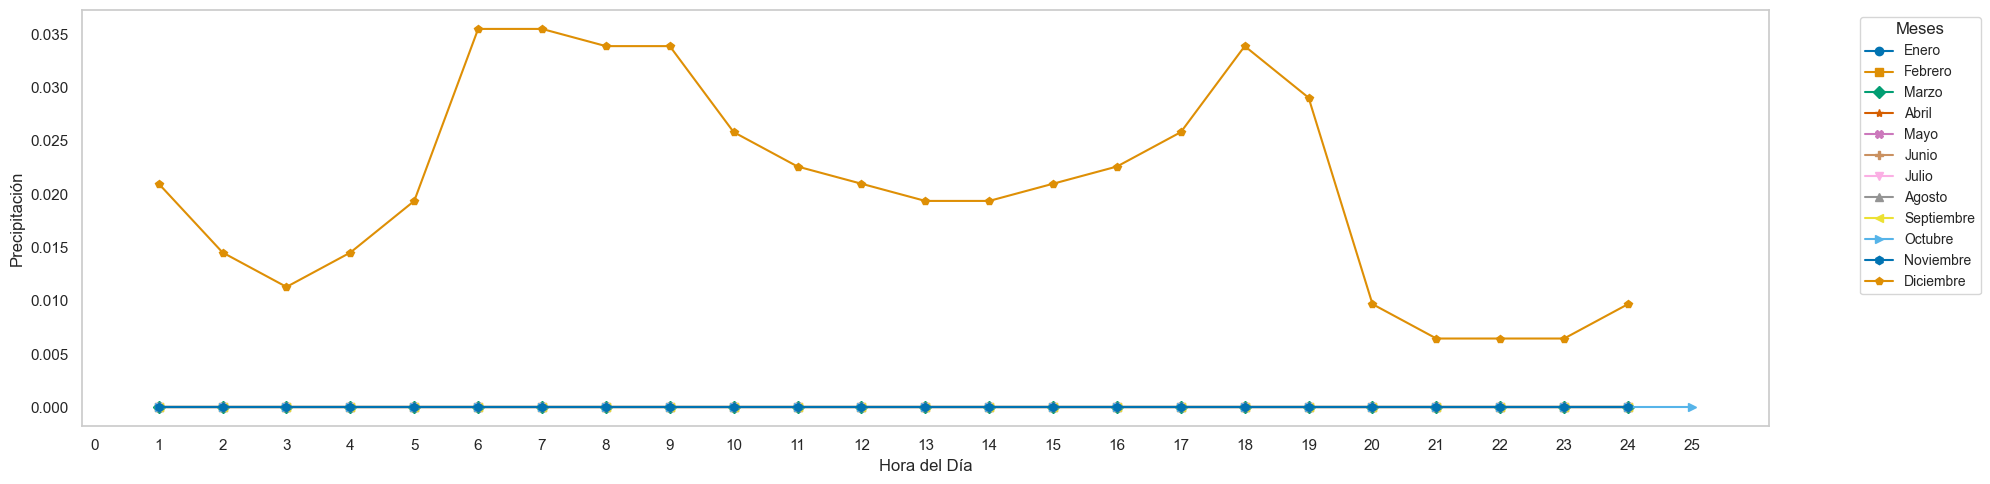

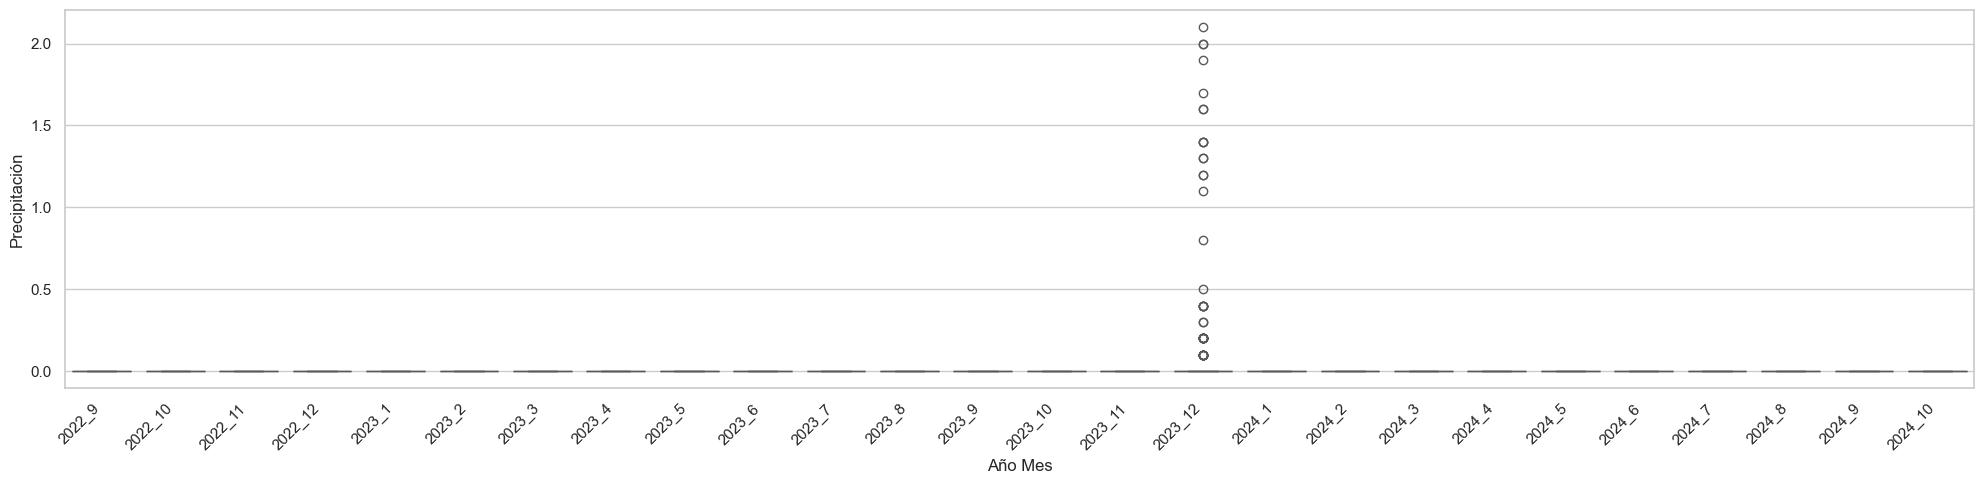

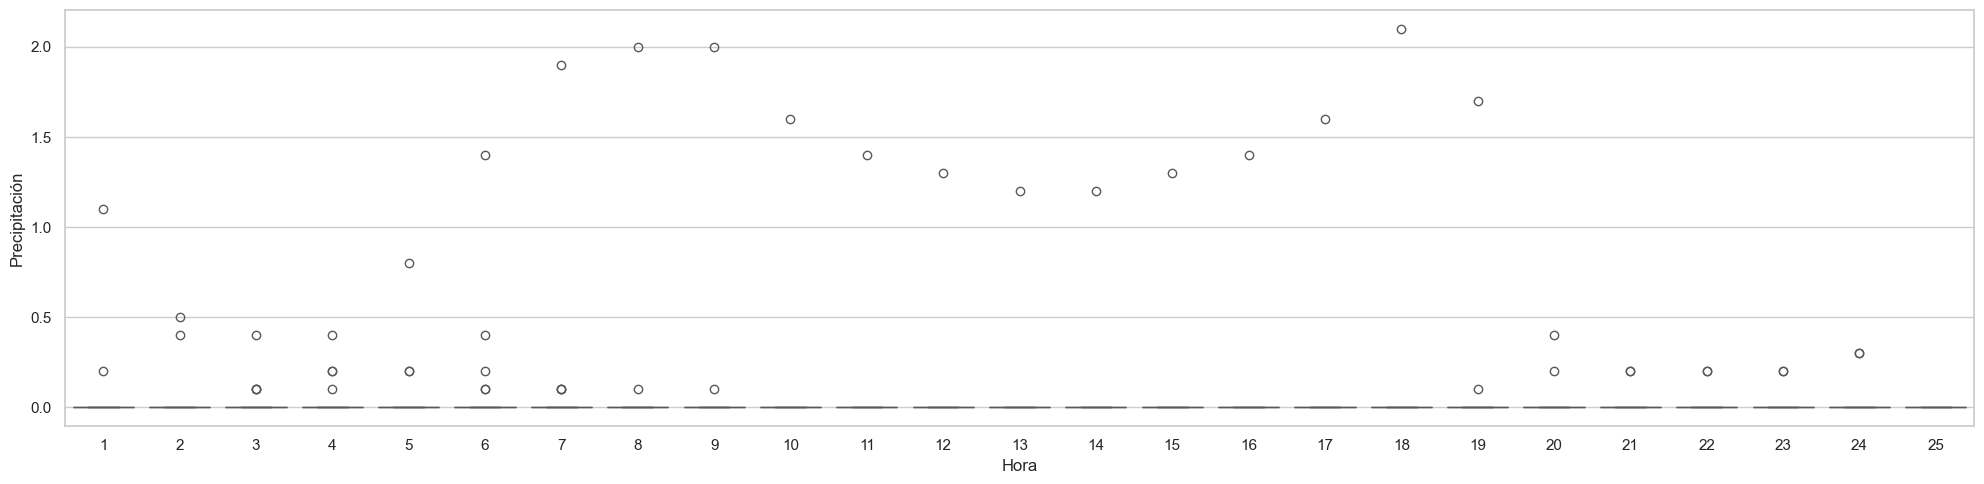

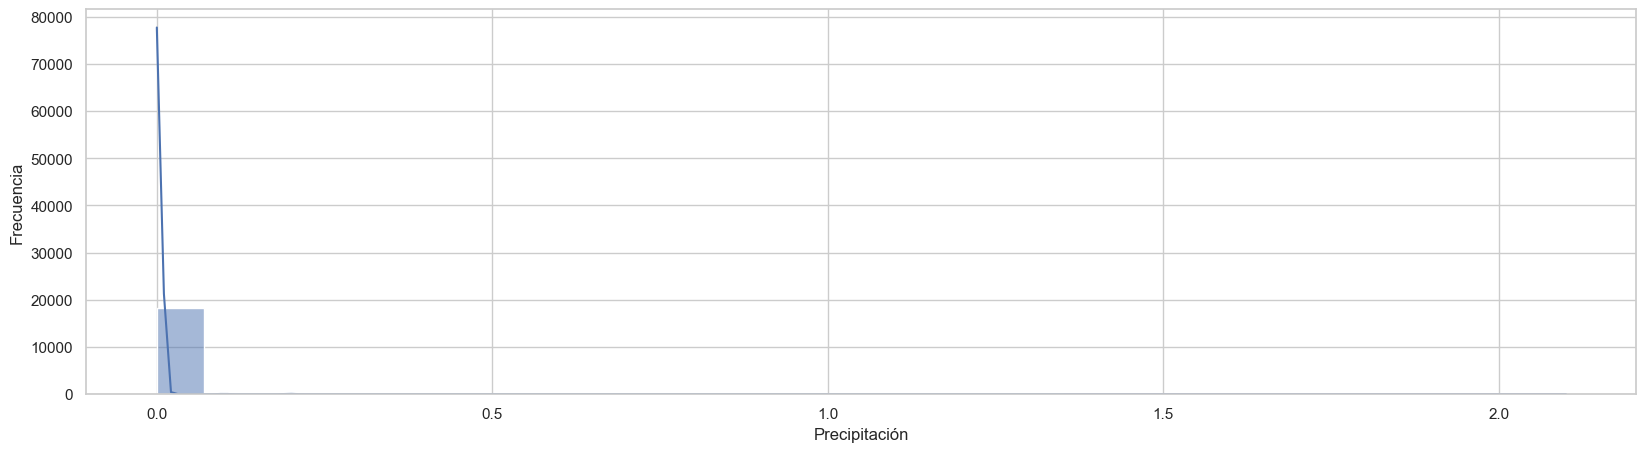

In [152]:
EDA(13246, 13946, 'fltPrecipitacion', 'Precipitación', True)

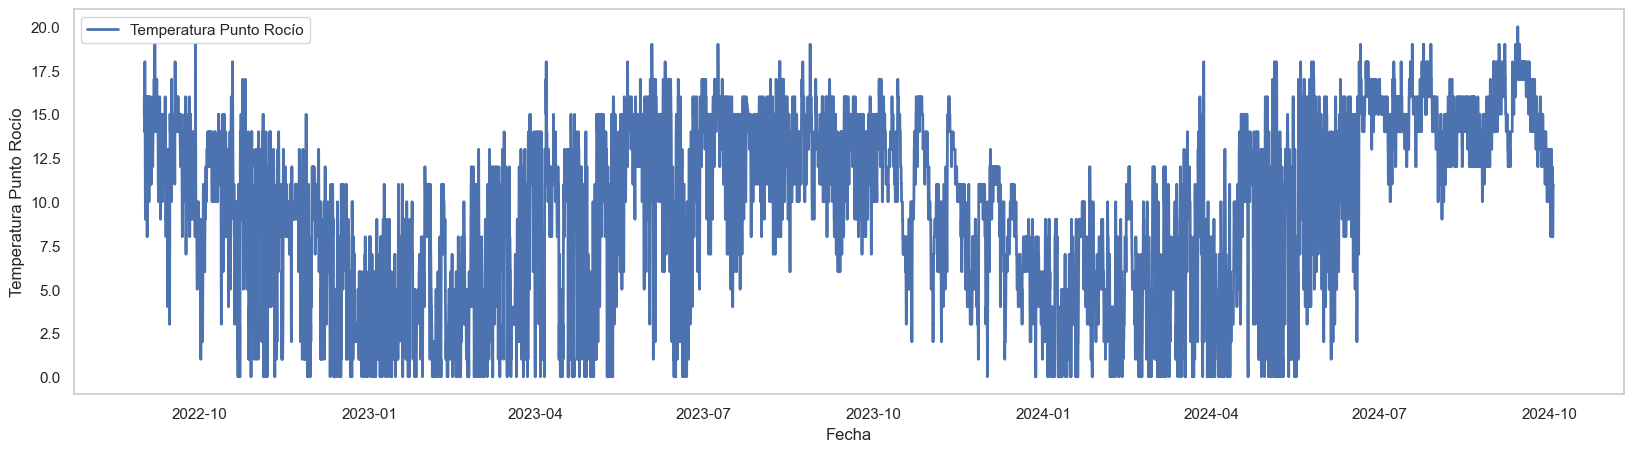

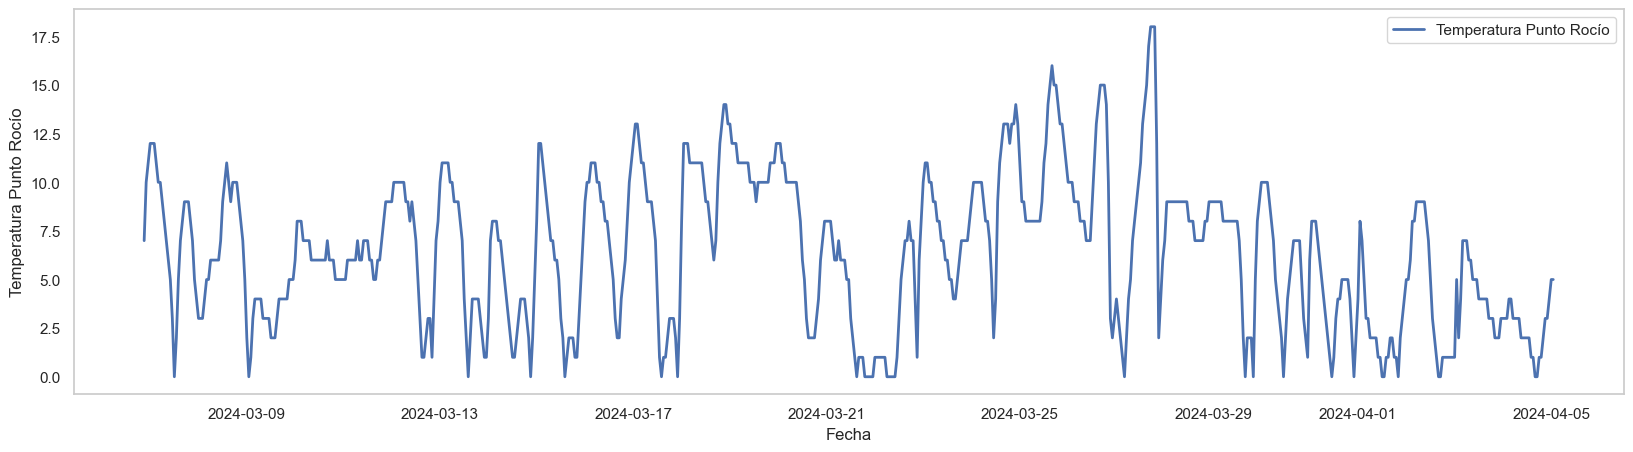

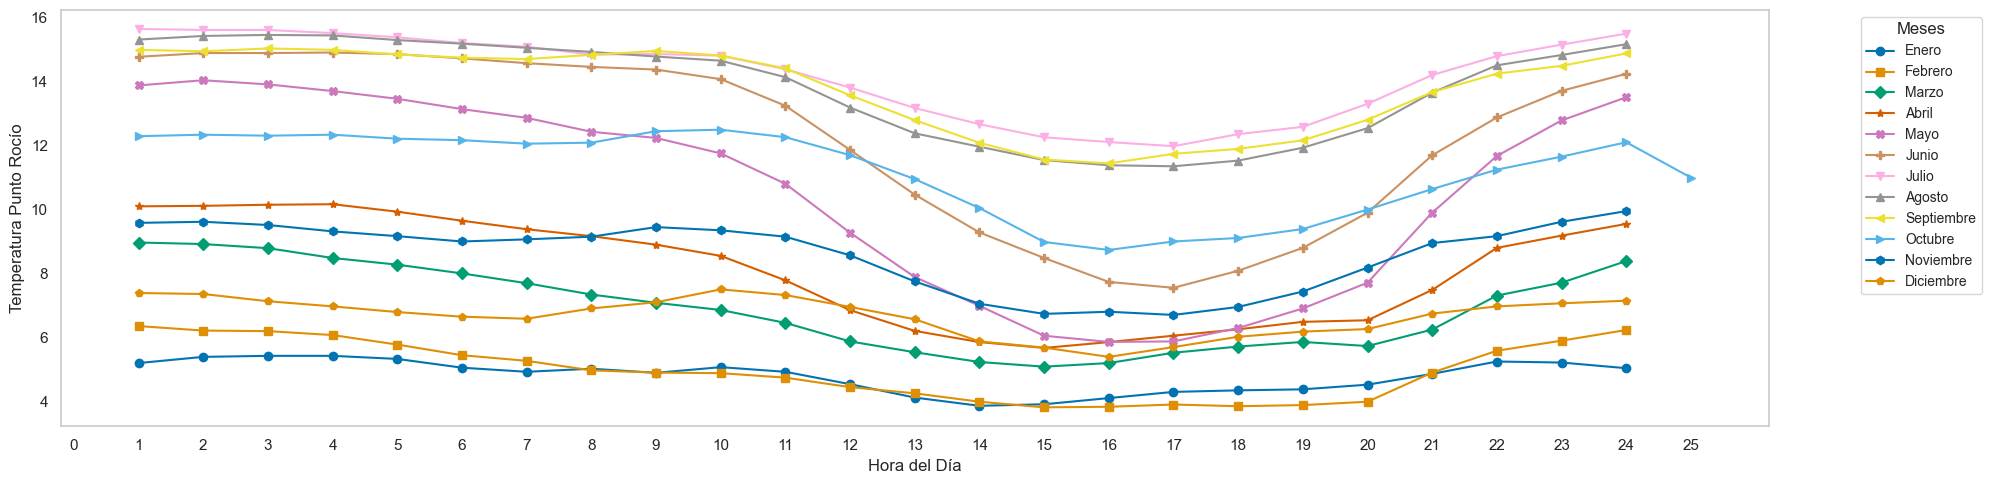

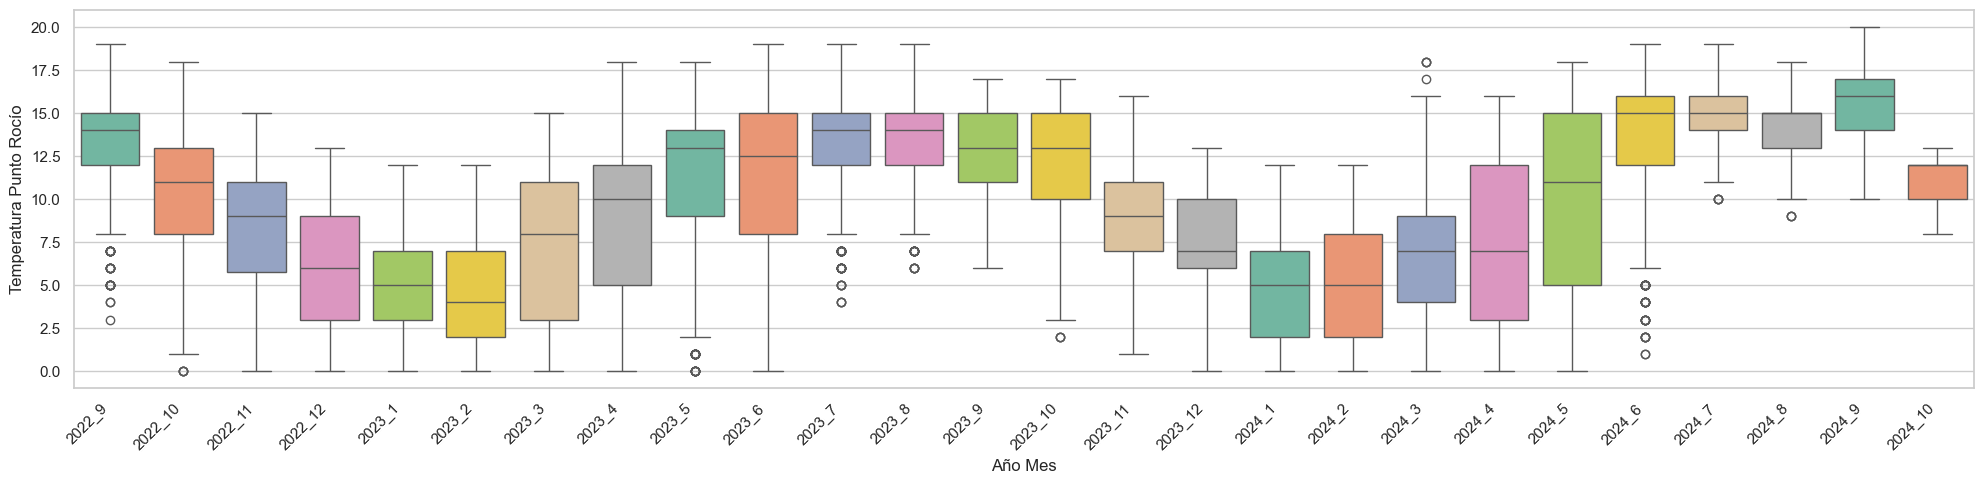

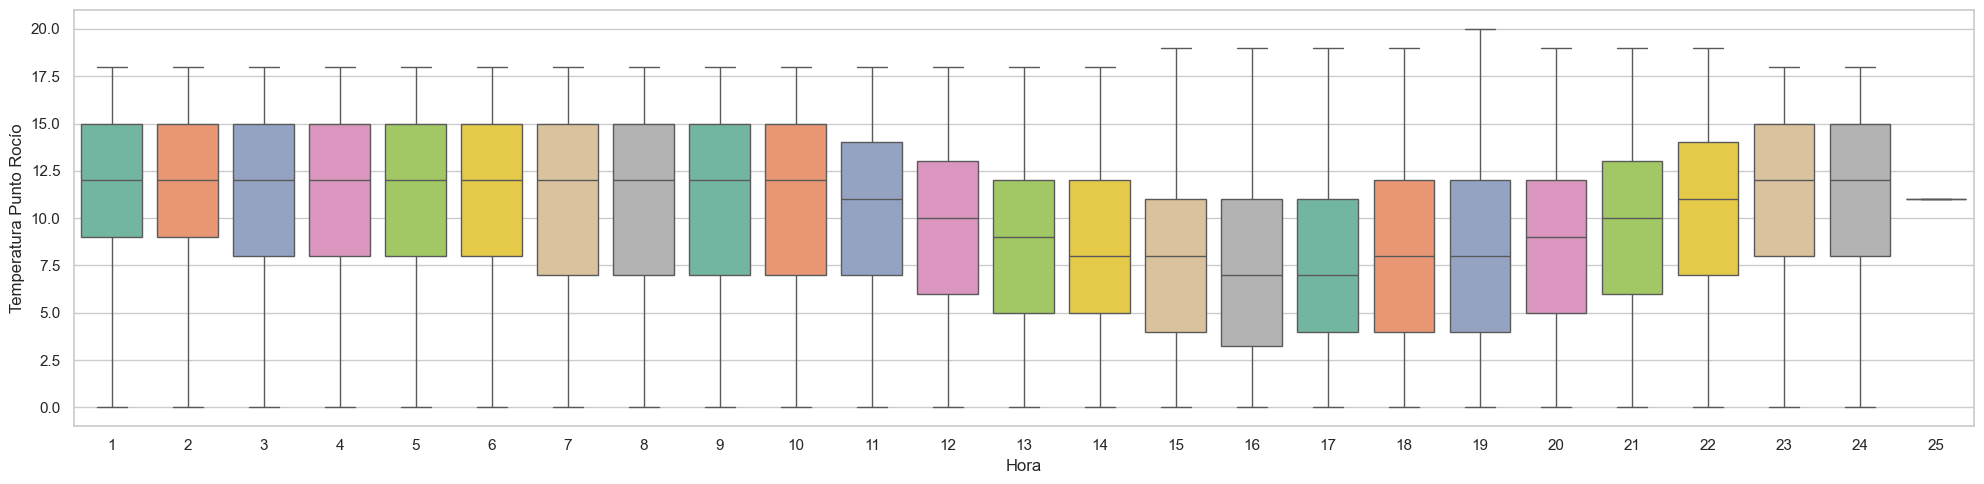

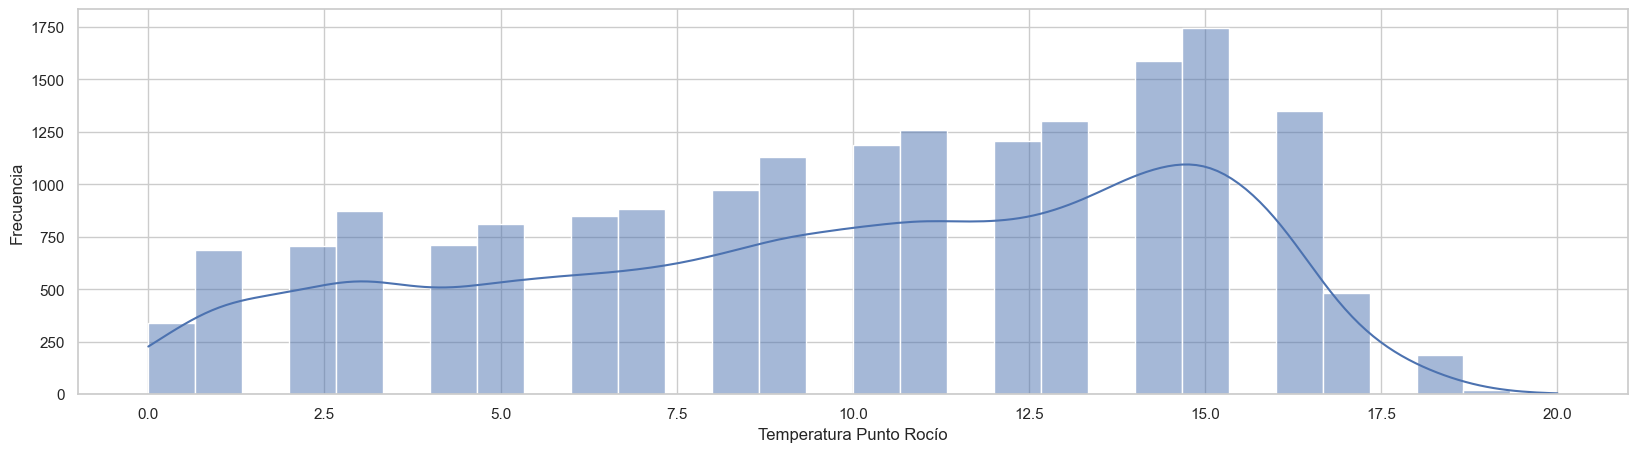

In [153]:
EDA(13246, 13946, 'fltDPT', 'Temperatura Punto Rocío', True)

In [154]:
datos = datos.drop(columns="Year_Month")

KeyError: "['Year_Month'] not found in axis"

Precipitación está en su totalidad en ceros, por lo que no nos sirve la variable, la eliminamos de los 3 archivos.

In [123]:
datos = datos.drop(columns="fltPrecipitacion")

In [127]:
datos.to_excel("01.Generación sin nulos.xlsx", index=False, header=True)

In [128]:
datos = pd.read_excel('00.Generación sin nulos CT-NET.xlsx')
datos = datos.drop(columns="fltPrecipitacion")
datos.to_excel("01.Generación sin nulos CT-NET.xlsx", index=False, header=True)

In [129]:
datos = pd.read_excel('00.Generación sin nulos Photovoltaic.xlsx')
datos = datos.drop(columns="fltPrecipitacion")
datos.to_excel("01.Generación sin nulos Photovoltaic.xlsx", index=False, header=True)